# Análise dos MicroDados Saeb

---

In [138]:
# Código 01

%pip install openpyxl category_encoders matplotlib memory-profiler openpyxl pandas yellowbrick seaborn pydea joblib Benchmarking numpy pulp pyarrow pydea tqdm

🕒 Execução iniciada em: 19-02-2025 01:54:56

----------------------------------------
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.

----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:54:58
⏳ Duração da execução: 0:00:01.824337 (0.03 minutos)



In [2]:
# Código 02 - Importações organizadas

# 📌 Módulos do Sistema Operacional e Manipulação de Tempo
import os
import time
from datetime import datetime

# 📌 Configuração do IPython
from IPython.core.interactiveshell import InteractiveShell

# 📌 Suprimir Warnings
import warnings

# 📌 Manipulação de Dados com Pandas
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

# 📌 Bibliotecas Matemáticas
import math
import numpy as np
from math import sqrt

# 📌 Otimização Matemática (DEA - Análise por Envoltória de Dados)
import pulp
import pyDEA  # Biblioteca para DEA

# 📌 Machine Learning - Clustering e Pré-processamento
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler

# 📌 Avaliação de Clusters
from sklearn.metrics import (
    calinski_harabasz_score, 
    silhouette_score, 
    davies_bouldin_score
)

# 📌 Codificação de Categorias
from category_encoders import OneHotEncoder, OrdinalEncoder

# 📌 Processamento Paralelo
from joblib import Parallel, delayed

# 📌 Tratamento de Texto e Manipulação de Strings
import unicodedata
import base64
from io import StringIO

# 📌 Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns  # Para mapa de calor
from mpl_toolkits.mplot3d import Axes3D  # Para gráficos 3D

# 📌 Ferramentas de Visualização para Clustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# 📌 Barra de Progresso
from tqdm import tqdm

# 📌 Upload de Arquivos no Google Colab (Se necessário, descomente)
# from google.colab import files

print("✅ Todas as bibliotecas foram importadas com sucesso!")

✅ Todas as bibliotecas foram importadas com sucesso!


# Parte 1 - Trabalhando com a base de Dados do professor (TS_PROFESSOR)

## Abrindo o dataframe TS_PROFESSOR
---

In [3]:
# Variável global para armazenar o tempo de início da execução da célula
inicio_execucao = None

def before_run_cell(*args, **kwargs):
    """Executa antes de cada célula para armazenar o tempo de início."""
    global inicio_execucao
    inicio_execucao = datetime.now()
    print(f"🕒 Execução iniciada em: {inicio_execucao.strftime('%d-%m-%Y %H:%M:%S')}")
    print("\n" + "-"*40)

def after_run_cell(*args, **kwargs):
    """Executa após cada célula para calcular e exibir o tempo de execução."""
    global inicio_execucao
    if inicio_execucao is not None:
        fim_execucao = datetime.now()
        duracao = fim_execucao - inicio_execucao
        segundos = duracao.total_seconds()
        minutos = segundos / 60  # Convertendo para minutos

        print("\n" + "-"*40)
        print(f"✅ Execução finalizada em: {fim_execucao.strftime('%d-%m-%Y %H:%M:%S')}")
        print(f"⏳ Duração da execução: {duracao} ({minutos:.2f} minutos)\n")
        inicio_execucao = None  # Reseta a variável para a próxima célula

# Obtém a instância do shell do Jupyter
shell = get_ipython()

# Verifica se os callbacks já estão registrados para evitar duplicação
if not hasattr(shell, '_timing_callbacks_registered'):
    # Remove callbacks antigos, caso existam
    if hasattr(shell, 'events'):
        for event in ['pre_run_cell', 'post_run_cell']:
            try:
                shell.events.unregister(event, before_run_cell)
                shell.events.unregister(event, after_run_cell)
            except:
                pass

    # Registra os novos eventos
    shell.events.register('pre_run_cell', before_run_cell)
    shell.events.register('post_run_cell', after_run_cell)

    # Marca que os callbacks foram registrados
    shell._timing_callbacks_registered = True
else:
    print("Callbacks já registrados. Ignorando nova inicialização.")

In [4]:
# Código 01 - Manipulando o dataframe TS_PROFESSOR

# Caminho relativo (arquivo na mesma pasta que o Jupyter Notebook)
caminho_arquivo = os.path.join(os.getcwd(), "TS_PROFESSOR.parquet")

# Tentar abrir o arquivo Parquet
try:
    dadosSaeb = pd.read_parquet(caminho_arquivo)
    print("Arquivo Parquet carregado com sucesso.\n")
except FileNotFoundError:
    print("Erro: Arquivo não encontrado. Verifique o caminho.")
except pd.errors.EmptyDataError:
    print("Erro: O arquivo está vazio.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

🕒 Execução iniciada em: 19-02-2025 01:33:09

----------------------------------------
Arquivo Parquet carregado com sucesso.


----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:33:11
⏳ Duração da execução: 0:00:01.492812 (0.02 minutos)



In [5]:
# Código 02 - Manipulando o dataframe TS_PROFESSOR

# Exibe as 5 primeiras linhas para confirmar que o arquivo foi carregado corretamente.
print("Exibe as 5 primeiras linhas para confirmar que o arquivo foi carregado corretamente.\n")

dadosSaeb.head()

🕒 Execução iniciada em: 19-02-2025 01:33:13

----------------------------------------
Exibe as 5 primeiras linhas para confirmar que o arquivo foi carregado corretamente.



,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,IN_PUBLICA,ID_LOCALIZACAO,ID_TURMA,ID_PROFESSOR,...,TX_RESP_Q112,TX_RESP_Q113,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121
0,2021,1,11,6316600,0,61324549,1,1,1324152,2503102,...,D,C,C,C,C,B,A,C,C,A
1,2021,1,11,6316600,0,61324549,1,1,1324152,2512579,...,.,.,.,.,.,.,.,.,.,.
2,2021,1,11,6316600,0,61324549,1,1,1324376,2516480,...,C,C,D,C,A,B,B,D,D,C
3,2021,1,11,6316600,0,61324549,1,1,1324152,2506320,...,B,C,C,B,C,D,C,D,B,C
4,2021,1,11,6316600,0,61335087,1,1,1379766,2507972,...,C,C,D,C,A,A,A,D,C,B



----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:33:13
⏳ Duração da execução: 0:00:00.367756 (0.01 minutos)



---

## 1.1 Contabilizando os Dados do Dataframe

In [6]:
# Código 03 - Manipulando o dataframe TS_PROFESSOR

# Filtrando os Dados para os anos escolares relevantes
anos_escolares = [2, 5, 9, 12, 13]  # 5º ano EF, 9º ano EF, etc.
coluna_serie = 'ID_SERIE'  # Ajustar conforme o nome correto da coluna

# Filtrar as linhas apenas para os anos escolares de interesse
dados_filtrados = dadosSaeb[dadosSaeb[coluna_serie].isin(anos_escolares)]

# Agrupando pelos anos escolares e contando as escolas únicas
resultado = dados_filtrados.groupby(coluna_serie).agg(
    Alunos=('ID_SAEB', 'count'),  # Total de alunos (linhas no CSV)
    Turmas=('ID_TURMA', 'nunique'),  # Turmas únicas
    Escolas=('ID_ESCOLA', 'nunique')  # Escolas únicas
).reset_index()

# Ajustando os nomes dos anos escolares
resultado['Ano Escolar'] = resultado[coluna_serie].replace({
    2: '2º Ano EF', 
    5: '5º Ano EF', 
    9: '9º Ano EF', 
    12: '3ª/4ª séries do Ensino Médio Tradicional', 
    13: '3ª/4ª séries do Ensino Médio Integrado'
})

# Adicionando uma linha de totalização
total = resultado[['Alunos', 'Turmas', 'Escolas']].sum()
total['Ano Escolar'] = 'Total'
resultado = pd.concat([resultado, pd.DataFrame([total])], ignore_index=True)

# Organizando as colunas para exibição
resultado = resultado[['Ano Escolar', 'Alunos', 'Turmas', 'Escolas']]

# Formatando os valores numéricos com separadores de milhar
resultado['Alunos'] = resultado['Alunos'].apply(lambda x: f"{x:,}".replace(",", "."))
resultado['Turmas'] = resultado['Turmas'].apply(lambda x: f"{x:,}".replace(",", "."))
resultado['Escolas'] = resultado['Escolas'].apply(lambda x: f"{x:,}".replace(",", "."))

# Exibindo o resultado
resultado

🕒 Execução iniciada em: 19-02-2025 01:33:15

----------------------------------------


,Ano Escolar,Alunos,Turmas,Escolas
0,5º Ano EF,97.286,97.286,46.889
1,9º Ano EF,258.378,86.126,39.365
2,3ª/4ª séries do Ensino Médio Tradicional,190.011,63.337,19.940
3,3ª/4ª séries do Ensino Médio Integrado,19.965,6.655,1.864
4,Total,565.640,253.404,108.058



----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:33:15
⏳ Duração da execução: 0:00:00.496479 (0.01 minutos)



In [7]:
# Código 04 - Manipulando o dataframe TS_PROFESSOR

"""
O método describe() gera estatísticas descritivas do DataFrame.

Ele fornece um resumo estatístico para colunas numéricas, incluindo:
- count: número de valores não nulos
- mean: média dos valores
- std: desvio padrão (dispersão dos Dados)
- min: valor mínimo
- 25%: primeiro quartil (25% dos Dados abaixo deste valor)
- 50%: mediana ou segundo quartil (50% dos Dados abaixo deste valor)
- 75%: terceiro quartil (75% dos Dados abaixo deste valor)
- max: valor máximo

Para colunas categóricas, retorna:
- count: número de valores não nulos
- unique: número de valores únicos
- top: valor mais frequente
- freq: frequência do valor mais frequente
"""

# Gerando as estatísticas descritivas do DataFrame 'dadosSaeb'
descricao = dadosSaeb.describe(include='all')

# Renomeando as estatísticas para o português
descricao.rename(index={
    'count': 'Contagem',
    'mean': 'Média',
    'std': 'Desvio Padrão',
    'min': 'Valor Mínimo',
    '25%': '1º Quartil (25%)',
    '50%': 'Mediana (50%)',
    '75%': '3º Quartil (75%)',
    'max': 'Valor Máximo',
    'unique': 'Valores Únicos',
    'top': 'Valor Mais Frequente',
    'freq': 'Frequência do Valor Mais Frequente'
}, inplace=True)

# Adicionando a contagem de valores não nulos ('Não Nulos') no DataFrame
descricao.loc['Não Nulos'] = dadosSaeb.notnull().sum()

# Exibindo o resumo das estatísticas em português
print("\nResumo estatístico dos Dados:")

descricao

🕒 Execução iniciada em: 19-02-2025 01:33:16

----------------------------------------

Resumo estatístico dos Dados:


,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,IN_PUBLICA,ID_LOCALIZACAO,ID_TURMA,ID_PROFESSOR,...,TX_RESP_Q112,TX_RESP_Q113,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121
Contagem,565640.0,565640.000000,565640.000000,5.656400e+05,565640.000000,5.656400e+05,565640.000000,565640.000000,5.656400e+05,5.656400e+05,...,565640,565640,565640,565640,565640,565640,565640,565640,565640,565640
Valores Únicos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,6,6,6,6,6,6,6,6,6
Valor Mais Frequente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,.,.,.,.,.,.,.,.,.,.
Frequência do Valor Mais Frequente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,322927,322833,323097,323108,323201,323214,323188,323173,323221,323732
Média,2021.0,2.784525,31.570320,6.319308e+06,0.182683,6.136123e+07,0.972429,1.121098,1.347987e+06,2.395905e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Desvio Padrão,0.0,1.085927,9.978193,1.602847e+03,0.386407,2.153409e+04,0.163739,0.326242,7.352309e+04,1.627621e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor Mínimo,2021.0,1.000000,11.000000,6.316600e+06,0.000000,6.132367e+07,0.000000,1.000000,1.220563e+06,2.109192e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1º Quartil (25%),2021.0,2.000000,25.000000,6.317938e+06,0.000000,6.134262e+07,1.000000,1.000000,1.284325e+06,2.256631e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mediana (50%),2021.0,3.000000,31.000000,6.319610e+06,0.000000,6.136140e+07,1.000000,1.000000,1.347940e+06,2.395490e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3º Quartil (75%),2021.0,3.000000,35.000000,6.320429e+06,0.000000,6.137994e+07,1.000000,1.000000,1.411628e+06,2.536833e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:33:23
⏳ Duração da execução: 0:00:06.532949 (0.11 minutos)



In [8]:
# Código 05 - Manipulando o dataframe TS_PROFESSOR

# O método dadosSaeb.columns.values retorna um array contendo os nomes de todas as colunas do DataFrame dadosSaeb.

# Exibindo os nomes de todas as colunas
colunas = dadosSaeb.columns.values

print(f"Quantidade de colunas: {len(colunas)} \n")
print("Nomes das colunas: ")

for ordem, nome in enumerate(colunas, start=0):
        print(f"{ordem} - {nome}")

🕒 Execução iniciada em: 19-02-2025 01:58:17

----------------------------------------
Quantidade de colunas: 135 

Nomes das colunas: 
0 - ID_SAEB
1 - ID_REGIAO
2 - ID_UF
3 - ID_MUNICIPIO
4 - ID_AREA
5 - ID_ESCOLA
6 - IN_PUBLICA
7 - ID_LOCALIZACAO
8 - ID_TURMA
9 - ID_PROFESSOR
10 - ID_SERIE
11 - SQ_QUESTIONARIO
12 - IN_PREENCHIMENTO_QUESTIONARIO
13 - IN_PREENCHIMENTO_OUTRA_TURMA
14 - TX_RESP_Q001
15 - TX_RESP_Q002
16 - TX_RESP_Q003
17 - TX_RESP_Q004
18 - TX_RESP_Q005
19 - TX_RESP_Q006
20 - TX_RESP_Q007
21 - TX_RESP_Q008
22 - TX_RESP_Q009
23 - TX_RESP_Q010
24 - TX_RESP_Q011
25 - TX_RESP_Q012
26 - TX_RESP_Q013
27 - TX_RESP_Q014
28 - TX_RESP_Q015
29 - TX_RESP_Q016
30 - TX_RESP_Q017
31 - TX_RESP_Q018
32 - TX_RESP_Q019
33 - TX_RESP_Q020
34 - TX_RESP_Q021
35 - TX_RESP_Q022
36 - TX_RESP_Q023
37 - TX_RESP_Q024
38 - TX_RESP_Q025
39 - TX_RESP_Q026
40 - TX_RESP_Q027
41 - TX_RESP_Q028
42 - TX_RESP_Q029
43 - TX_RESP_Q030
44 - TX_RESP_Q031
45 - TX_RESP_Q032
46 - TX_RESP_Q033
47 - TX_RESP_Q034
48 - T

In [9]:
# Código 06 - Manipulando o dataframe TS_PROFESSOR

# Exibindo o número de linhas e colunas do DataFrame
linhas, colunas = dadosSaeb.shape

print(f"O DataFrame possui {linhas:_.0f} linhas e {colunas} colunas \n".replace('_', '.'))

🕒 Execução iniciada em: 19-02-2025 01:58:18

----------------------------------------
O DataFrame possui 565.640 linhas e 135 colunas 


----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:58:18
⏳ Duração da execução: 0:00:00.002071 (0.00 minutos)



In [10]:
# Código 07 - Manipulando o dataframe TS_PROFESSOR

# Exibindo o número de valores únicos na coluna 'ID_ESCOLA'

num_valores_unicos = dadosSaeb['ID_ESCOLA'].nunique()

print(f"A coluna 'ID_ESCOLA' possui {num_valores_unicos:_.0f} valores únicos \n".replace('_', '.'))

🕒 Execução iniciada em: 19-02-2025 01:58:20

----------------------------------------
A coluna 'ID.ESCOLA' possui 74.449 valores únicos 


----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:58:20
⏳ Duração da execução: 0:00:00.012045 (0.00 minutos)



---

## 1.2 Tabela comparativa dos entre as questões de 2019 e 2021

| **2019** | **2021** |
| --- | --- |
| ID_SAEB | ID_SAEB |
| ID_REGIAO | ID_REGIAO |
| ID_UF | ID_UF |
| ID_MUNICIPIO | ID_MUNICIPIO |
| ID_AREA | ID_AREA |
| ID_ESCOLA | ID_ESCOLA |
| IN_PUBLICA | IN_PUBLICA |
| ID_LOCALIZACAO | ID_LOCALIZACAO |
| ID_TURMA | ID_TURMA |
| ID_SERIE | ID_SERIE |
| IN_PREENCHIMENTO_QUESTIONARIO | IN_PREENCHIMENTO_QUESTIONARIO |
| CO_PROFESSOR | ID_PROFESSOR |
| TX_RESP_Q002 | TX_RESP_Q005 |
| TX_RESP_Q003 | TX_RESP_Q006 |
| TX_RESP_Q004 | TX_RESP_Q007 |
| TX_RESP_Q005 | TX_RESP_Q008 |
| TX_RESP_Q006 | TX_RESP_Q012 |
| TX_RESP_Q007 | TX_RESP_Q013 |
| TX_RESP_Q008 | TX_RESP_Q014 |
| TX_RESP_Q009 | TX_RESP_Q015 |
| TX_RESP_Q010 | TX_RESP_Q109 |
| TX_RESP_Q011 | TX_RESP_Q110 |
| TX_RESP_Q012 | TX_RESP_Q111 |
| TX_RESP_Q013 | TX_RESP_Q113 |
| TX_RESP_Q022 | TX_RESP_Q024 |
| TX_RESP_Q023 | TX_RESP_Q025 |
| TX_RESP_Q024 | TX_RESP_Q026 |
| TX_RESP_Q025 | TX_RESP_Q027 |
| TX_RESP_Q026 | TX_RESP_Q028 |
| TX_RESP_Q027 | TX_RESP_Q029 |
| TX_RESP_Q028 | TX_RESP_Q030 |
| TX_RESP_Q029 | TX_RESP_Q031 |
| TX_RESP_Q030 | TX_RESP_Q032 |
| TX_RESP_Q031 | TX_RESP_Q033 |
| TX_RESP_Q032 | TX_RESP_Q034 |
| TX_RESP_Q033 | TX_RESP_Q035 |
| TX_RESP_Q034 | TX_RESP_Q036 |
| TX_RESP_Q035 | TX_RESP_Q037 |
| TX_RESP_Q036 | TX_RESP_Q038 |
| TX_RESP_Q037 | TX_RESP_Q039 |
| TX_RESP_Q038 | TX_RESP_Q040 |
| TX_RESP_Q039 | TX_RESP_Q009 |
| TX_RESP_Q042 | TX_RESP_Q041 |
| TX_RESP_Q043 | TX_RESP_Q042 |
| TX_RESP_Q044 | TX_RESP_Q043 |
| TX_RESP_Q045 | TX_RESP_Q044 |
| TX_RESP_Q046 | TX_RESP_Q045 |
| TX_RESP_Q047 | TX_RESP_Q046 |
| TX_RESP_Q048 | TX_RESP_Q047 |
| TX_RESP_Q049 | TX_RESP_Q048 |
| TX_RESP_Q050 | TX_RESP_Q049 |
| TX_RESP_Q051 | TX_RESP_Q050 |
| TX_RESP_Q052 | TX_RESP_Q051 |
| TX_RESP_Q053 | TX_RESP_Q052 |
| TX_RESP_Q054 | TX_RESP_Q053 |
| TX_RESP_Q055 | TX_RESP_Q054 |
| TX_RESP_Q057 | TX_RESP_Q056 |
| TX_RESP_Q059 | TX_RESP_Q059 |
| TX_RESP_Q060 | TX_RESP_Q060 |
| TX_RESP_Q074 | TX_RESP_Q074 |
| TX_RESP_Q078 | TX_RESP_Q078 |
| TX_RESP_Q079 | TX_RESP_Q079 |
| TX_RESP_Q080 | TX_RESP_Q080 |
| TX_RESP_Q081 | TX_RESP_Q081 |
| TX_RESP_Q082 | TX_RESP_Q082 |
| TX_RESP_Q083 | TX_RESP_Q083 |
| TX_RESP_Q084 | TX_RESP_Q084 |
| TX_RESP_Q085 | TX_RESP_Q085 |
| TX_RESP_Q086 | TX_RESP_Q086 |
| TX_RESP_Q087 | TX_RESP_Q087 |
| TX_RESP_Q088 | TX_RESP_Q088 |
| TX_RESP_Q089 | TX_RESP_Q089 |
| TX_RESP_Q090 | TX_RESP_Q090 |
| TX_RESP_Q091 | TX_RESP_Q091 |
| TX_RESP_Q092 | TX_RESP_Q092 |
| TX_RESP_Q093 | TX_RESP_Q093 |
| TX_RESP_Q094 | TX_RESP_Q094 |
| TX_RESP_Q095 | TX_RESP_Q095 |
| TX_RESP_Q096 | TX_RESP_Q096 |
| TX_RESP_Q097 | TX_RESP_Q097 |
| TX_RESP_Q098 | TX_RESP_Q098 |
| TX_RESP_Q099 | TX_RESP_Q099 |
| TX_RESP_Q100 | TX_RESP_Q100 |
| TX_RESP_Q101 | TX_RESP_Q101 |
| TX_RESP_Q102 | TX_RESP_Q102 |
| TX_RESP_Q103 | TX_RESP_Q105 |
| TX_RESP_Q109 | TX_RESP_Q109 |
| TX_RESP_Q110 | TX_RESP_Q114 |
| TX_RESP_Q111 | TX_RESP_Q115 |
| TX_RESP_Q112 | TX_RESP_Q116 |
| TX_RESP_Q113 | TX_RESP_Q117 |
| TX_RESP_Q114 | TX_RESP_Q118 |
| TX_RESP_Q115 | TX_RESP_Q119 |
| TX_RESP_Q116 | TX_RESP_Q120 |

---

### 1.1.2 As seguintes colunas serão descartadas da base TS_PROFESSOR:

| Campo                | Descrição                                                                                       | Justificativa                                                                          |
|----------------------|-------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------|
| **ID_SAEB**          | Ano de aplicação do Saeb, que no caso é 2021                                                                    | Mesmo id para todos os registros.                                                      |
| **ID_REGIÃO**        | Código da Região, que no caso é 2 - Nordeste                                                                        | Mesmo id para todos os registros.                                                      |
| **ID_UF**            | Código da Unidade da Federação, que no caso é a 23 - CE                                                            | Mesmo id para todos os registros.                                                      |
| **IN_PUBLICA**       | Indica se a escola é pública ou não.                                                        | Todos os registros selecionados para o estudo são de escolas públicas.                 |
| **ID_PROFESSOR**     | Código que identifica o professor. (No Dados de 2019 o nome dessa coluna era CO_PROFESSOR)                                                   | Não contextualiza a escola, não sendo útil para o estudo por questões da LGPD.         |
| **ID_SERIE**         | Identificador da série do aluno.                                                                | Mesmo id para todos os registros, todos são do 3° ano.                                 |
| **IN_PREENCHIMENTO_QUESTIONARIO** | Indicador se o questionário foi preenchido ou não.                                              | Registros não preenchidos foram descartados, todos os registros estão preenchidos.     |
| **TX_RESP_Q001**            | Pergunta sobre o sexo do professor.                                                             | Não contextualiza a escola, refere-se apenas ao professor.                             |
| **TX_RESP_Q002**            | Pergunta sobre a raça do professor.                                               | Não contextualiza a escola, refere-se apenas ao professor.                             |
| **TX_RESP_Q003**            | Pergunta sobre a idade do professor.                                | Não contextualiza a escola, refere-se apenas ao professor.                             |
| **TX_RESP_Q004**            | Pergunta se o professor possui necessidade especial, deficiência, transtorno do espectro autista, ou superdotação.    | Não contextualiza a escola, refere-se apenas ao professor.                             |



---

## 1.4 Mapeamento de Questões categóricas ou quantitativas

| **Conjuntos de Questões** | **Campos**                                                                                                      |
|-------------|-----------------------------------------------------------------------------------------------------------------|
| Conjunto 1   | `TX_RESP_Q005`, `TX_RESP_Q006`                                                                                  |
| Conjunto 2   | `TX_RESP_Q012` a `TX_RESP_Q015`, `TX_RESP_Q025` a `TX_RESP_Q034`, `TX_RESP_Q042` a `TX_RESP_Q051`, `TX_RESP_Q059` a `TX_RESP_Q060`, `TX_RESP_Q109`,`TX_RESP_Q113`                                                 |
| Conjunto 3   | `TX_RESP_Q035` a `TX_RESP_Q040`, `TX_RESP_Q078` a `TX_RESP_Q095`                                                |
| Conjunto 4   | `TX_RESP_Q009`                                                                                 |
| Conjunto 5   | `TX_RESP_Q052` a `TX_RESP_Q054`                                                                                 |
| Conjunto 6   | `TX_RESP_Q074`                                                                                                  |
| Conjunto 7   | `TX_RESP_Q096`, `TX_RESP_Q098`, `TX_RESP_Q100` a `TX_RESP_Q105`                                                 |
| Conjunto 8   | `TX_RESP_Q114` a `TX_RESP_Q120`                                                                                 |

### Observações

As respostas do formulário de 2021 passaram por mudanças significativas em relação ao de 2019. As questões `TX_RESP_Q077`, `TX_RESP_Q078` e `TX_RESP_Q079` foram removidas do formulário. Algumas perguntas permaneceram inalteradas, enquanto outras mantiveram o mesmo conteúdo, mas com um texto reformulado. Além disso, grande parte do conjunto de questões da Questão 9 (`TX_RESP_Q121` a `TX_RESP_Q128`)  também foi excluída.

O total de colunas é 77 juntando com o resultado das questões após o OneHotEnconding

---

## 1.5 Inicio do processamento das respostas (atualizado para o questionário Saeb 2021)

---

In [11]:
# Código 08 - Manipulando o dataframe TS_PROFESSOR

def processa_respostas1(dadosSaeb):

    # Dicionário de mapeamento das respostas para o conjunto de questões 1
    mapa_respostas_q1 = {
        '*': None,       # Nulo
        '.': None,       # Branco
        'A': 0.5,        # Menos de 1 ano
        'B': 1.5,        # De 1 a 2 anos
        'C': 4,          # De 3 a 5 anos
        'D': 8,          # De 6 a 10 anos
        'E': 13,         # De 11 a 15 anos
        'F': 18,         # De 16 a 20 anos
        'G': 23,         # De 21 a 25 anos
        'H': 30          # Mais de 25 anos
    }

    # Lista de colunas alvo para o conjunto de questões 1
    colunas_q1 = ['TX_RESP_Q005', 'TX_RESP_Q006']

    # Usando pd.option_context para garantir o comportamento adequado
    with pd.option_context('future.no_silent_downcasting', True):

        # Aplicação do mapeamento e ajuste de tipos se necessário
        dadosSaeb[colunas_q1] = dadosSaeb[colunas_q1].replace(mapa_respostas_q1).infer_objects(copy=False)

    # Exibição das colunas processadas
    print("Saída após processar as colunas TX_RESP_Q005 e TX_RESP_Q006: \n")
    print(dadosSaeb[colunas_q1].head())

    return dadosSaeb

# Aplicação da função ao DataFrame
dadosSaeb = processa_respostas1(dadosSaeb)

🕒 Execução iniciada em: 19-02-2025 01:58:26

----------------------------------------
Saída após processar as colunas TX_RESP_Q005 e TX_RESP_Q006: 

   TX_RESP_Q005  TX_RESP_Q006
0           8.0           0.5
1           NaN           NaN
2          23.0          13.0
3          30.0           1.5
4          30.0           8.0

----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:58:26
⏳ Duração da execução: 0:00:00.411241 (0.01 minutos)



### 1.5.1 Comentário sobre a escolha das questões do conjunto 1:

> As questões **(TX_RESP_Q005 e TX_RESP_Q006)** foram escolhidas por estarem relacionadas a experiência do professor. Sem dúvida um professor experiente pode causasr um impacto na qualidade do ensino.

In [12]:
# Código 09 - Manipulando o dataframe TS_PROFESSOR

def processa_respostas2(dadosSaeb):

    # Dicionário de mapeamento das respostas para o conjunto de questões 2
    mapa_respostas_q2 = {
        '*': None,  # Nulo
        '.': None,  # Branco
        'A': 0,
        'B': 3.3,
        'C': 6.6,
        'D': 10
    }

    # Lista de colunas alvo para o conjunto de questões 2
    colunas_q2 = list(
        ['TX_RESP_Q0' + str(i) for i in range(12, 16)] +  # Q012 a Q015
        ['TX_RESP_Q0' + str(i) for i in range(25, 35)] +  # Q025 a Q034
        ['TX_RESP_Q0' + str(i) for i in range(42, 52)] +  # Q042 a Q051
        ['TX_RESP_Q059', 'TX_RESP_Q060'] +  # Q059, Q060
        ['TX_RESP_Q109', 'TX_RESP_Q113']  # Q109, Q113
    )

    # Usando pd.option_context para garantir o comportamento adequado
    with pd.option_context('future.no_silent_downcasting', True):
        # Aplicação do mapeamento e ajuste de tipos se necessário
        dadosSaeb[colunas_q2] = dadosSaeb[colunas_q2].replace(mapa_respostas_q2).infer_objects(copy=False)

    # Geração da lista de colunas como string para exibir na saída
    colunas_formatadas = ', '.join(colunas_q2[:2])

    # Exibição das colunas processadas
    print(f"Saída após processar as colunas: \n")
    print(dadosSaeb[colunas_q2].head())

    return dadosSaeb

# Aplicação da função ao DataFrame
dadosSaeb = processa_respostas2(dadosSaeb)

🕒 Execução iniciada em: 19-02-2025 01:58:28

----------------------------------------
Saída após processar as colunas: 

   TX_RESP_Q012  TX_RESP_Q013  TX_RESP_Q014  TX_RESP_Q015  TX_RESP_Q025  \
0           6.6           3.3           0.0           3.3          10.0   
1           NaN           NaN           NaN           NaN           NaN   
2          10.0           3.3           3.3           6.6           6.6   
3           6.6           0.0           6.6           6.6           3.3   
4           6.6           3.3           6.6           6.6           6.6   

   TX_RESP_Q026  TX_RESP_Q027  TX_RESP_Q028  TX_RESP_Q029  TX_RESP_Q030  ...  \
0          10.0           6.6           6.6           6.6           6.6  ...   
1           NaN           NaN           NaN           NaN           NaN  ...   
2           6.6           3.3           6.6           6.6          10.0  ...   
3           0.0           0.0           0.0           0.0          10.0  ...   
4           6.6           3.

### 1.5.2 Comentário sobre a escolha das questões do conjunto 2:

1. **Condições de Trabalho e Ambiente Escolar (TX_RESP_Q025 a TX_RESP_Q034)**
    - Muitas das questões são focadas em entender o ambiente de trabalho e as condições das salas de aula. Isso é importante porque professores que trabalham em ambientes bem estruturados e adequados tendem a ser mais eficientes e satisfeitos.
2. **Satisfação e Motivação (TX_RESP_Q012 a TX_RESP_Q015)**
    - Estas questões visam entender a percepção dos professores sobre a carreira docente e sua satisfação com o trabalho. Professores mais satisfeitos e motivados tendem a ser mais engajados e a proporcionar melhores experiências educacionais.
3. **Necessidades de Desenvolvimento Profissional (TX_RESP_Q042 a TX_RESP_Q051)**
    - Estas questões são focadas em identificar as necessidades de formação continuada dos professores para melhorar sua prática pedagógica e aprimorar a qualidade do ensino.
4. **Pós-Graduação (TX_RESP_Q059, TX_RESP_Q060)**
   - Estas questões buscam entender o nível de formação acadêmica avançada dos professores e se houve apoio institucional para essa capacitação.
5. **Opiniões sobre Práticas Pedagógicas e Desempenho dos Alunos (TX_RESP_Q109, TX_RESP_Q113)**
    - Estas questões analisam as percepções dos professores sobre práticas pedagógicas e desempenho dos alunos, fornecendo insights sobre as crenças que impactam as abordagens de ensino.
  
> Dessa forma, cada conjunto de questões está a diferentes aspectos do trabalho dos professores, como condições de trabalho, satisfação e motivação, necessidades de capacitação, vínculo trabalhista, e percepções sobre práticas pedagógicas. Assim todos essas questões podem afetar a qualidade e eficiência de uma escola.

In [13]:
# Código 10 - Manipulando o dataframe TS_PROFESSOR


def processa_respostas3(dadosSaeb):

    # Dicionário de mapeamento das respostas para o conjunto de questões 3
    mapa_respostas_q3 = {
        '*': None,  # Nulo
        '.': None,  # Branco
        'A': 0,
        'B': 2.5,
        'C': 5,
        'D': 7.5,
        'E': 10
    }

    # Lista de colunas alvo para o conjunto de questões 3
    colunas_q3 = ['TX_RESP_Q0' + str(i) for i in range(35, 40)]  # Q035 a Q040
    colunas_q3 += ['TX_RESP_Q0' + str(i) for i in range(78, 95)]  # Q078 a Q095

    # Verificação de colunas existentes no DataFrame
    colunas_existentes = [col for col in colunas_q3 if col in dadosSaeb.columns]


            # Usando pd.option_context para garantir o comportamento adequado
    with pd.option_context('future.no_silent_downcasting', True):
        # Aplicação do mapeamento e ajuste de tipos se necessário
        dadosSaeb[colunas_existentes] = dadosSaeb[colunas_existentes].replace(mapa_respostas_q3).infer_objects(copy=False)

    # Geração da lista de colunas como string para exibir na saída
    colunas_formatadas = ', '.join(colunas_existentes[:2])  # Exibir apenas as duas primeiras colunas, como no exemplo

    # Exibição das colunas processadas
    print(f"Saída após processar as colunas: \n")
    print(dadosSaeb[colunas_existentes].head())

    return dadosSaeb

# Aplicação da função ao DataFrame
dadosSaeb = processa_respostas3(dadosSaeb)

🕒 Execução iniciada em: 19-02-2025 01:58:34

----------------------------------------
Saída após processar as colunas: 

   TX_RESP_Q035  TX_RESP_Q036  TX_RESP_Q037  TX_RESP_Q038  TX_RESP_Q039  \
0          10.0           0.0           0.0           0.0           0.0   
1           NaN           NaN           NaN           NaN           NaN   
2          10.0           0.0           0.0           0.0          10.0   
3          10.0           0.0           0.0           0.0           2.5   
4          10.0           5.0           5.0           0.0           5.0   

   TX_RESP_Q078  TX_RESP_Q079  TX_RESP_Q080  TX_RESP_Q081  TX_RESP_Q082  ...  \
0           0.0           5.0           5.0           5.0           5.0  ...   
1           NaN           NaN           NaN           NaN           NaN  ...   
2           5.0           5.0           5.0           5.0           5.0  ...   
3           5.0           5.0           5.0           5.0           5.0  ...   
4           5.0           5.

### 1.5.3 Comentário sobre a escolha das questões do conjunto 3:

1. **Recursos Utilizados na Sala de Aula** (`TX_RESP_Q035` a `TX_RESP_Q040`)
   - Muitas das questões são focadas em entender **quais recursos os professores utilizam em sala de aula e como esses recursos são avaliados em termos de adequação para o ensino**. Isso é importante para identificar se os professores têm acesso às ferramentas adequadas para ensinar com qualidade.
2. **Relação com a Direção e Gestão Escolar** (`TX_RESP_Q078` a `TX_RESP_Q085`)
   - Essas questões visam entender a **interação entre professores e a equipe de direção da escola**, incluindo discussões sobre metas educacionais e apoio para o desenvolvimento dos professores. Isso é essencial para avaliar o clima organizacional e o suporte dado à prática pedagógica.
3. **Colaboração e Apoio na Escola** (`TX_RESP_Q086` a `TX_RESP_Q089`)
   - Estas questões visam analisar o **nível de colaboração entre a escola, os professores e as famílias**. A colaboração é um indicador importante para compreender como a comunidade escolar atua para melhorar o desempenho dos alunos e resolver problemas cotidianos.
4. **Percepções sobre o Comportamento dos Alunos** (`TX_RESP_Q090` a `TX_RESP_Q095`)
   - Essas questões analisam as **percepções dos professores em relação ao comportamento dos alunos**, incluindo respeito, presença, pontualidade e interesse. Isso ajuda a entender como os alunos se envolvem com o processo educacional e quais desafios comportamentais estão presentes.
> Dessa forma, as questões do conjunto 3 foram escolhidas para fornecer uma visão detalhada dos **recursos disponíveis em sala de aula**, da **qualidade do apoio da gestão escolar**, da **colaboração entre professores, direção e famílias** e das **percepções dos professores sobre o comportamento dos alunos**. Todos esses elementos são importantes para compor um panorama sobre o ambiente escolar, o apoio pedagógico e as relações interpessoais, que têm grande impacto na qualidade do ensino e aprendizagem.


In [14]:
# Código 11 - Manipulando o dataframe TS_PROFESSOR

def processa_respostas4(dadosSaeb):

    # Lista de colunas alvo para o conjunto de questões 4
    mapa_respostas_q4 = {
        '*': None,  # Nulo
        '.': None,  # Branco
        'A': 5,
        'B': 15,
        'C': 25,
        'D': 35,
        'E': 45
    }

    # Lista de colunas alvo para o conjunto de questões 4
    colunas_q4 = ['TX_RESP_Q009']

    # Verificação de colunas existentes no DataFrame
    colunas_existentes = [col for col in colunas_q4 if col in dadosSaeb.columns]

    # Usando pd.option_context para garantir o comportamento adequado
    with pd.option_context('future.no_silent_downcasting', True):

        # Aplicação do mapeamento e ajuste de tipos se necessário
       dadosSaeb[colunas_existentes] = dadosSaeb[colunas_existentes].replace(mapa_respostas_q4).infer_objects(copy=False)

    # Geração da lista de colunas para exibir na saída
    colunas_formatadas = ', '.join(colunas_existentes[:2])  # Ajuste para exibir as duas primeiras colunas

    # Exibição das colunas processadas
    print(f"Saída após processar as colunas: \n")
    print(dadosSaeb[colunas_existentes].head())

    return dadosSaeb

# Aplicação da função ao DataFrame
dadosSaeb = processa_respostas4(dadosSaeb)

🕒 Execução iniciada em: 19-02-2025 01:58:40

----------------------------------------
Saída após processar as colunas: 

   TX_RESP_Q009
0          45.0
1           NaN
2          25.0
3          15.0
4          15.0

----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:58:40
⏳ Duração da execução: 0:00:00.164275 (0.00 minutos)



### 1.5.4 Comentário sobre a escolha da questão do conjunto 4:

1. **Carga Horária de Trabalho dos Professores** (`TX_RESP_Q009`)
   - A questão foi selecionada para compreender **quantas horas os professores trabalham semanalmente para a escola**, considerando atividades tanto dentro da escola quanto realizadas em casa (por exemplo, preparação de aulas e correção de trabalhos). Esses Dados são fundamentais para **identificar possíveis sobrecargas de trabalho** e avaliar como essa carga horária influencia o bem-estar dos professores e a qualidade do ensino.
  
> Dessa forma, a questão do conjunto 4 foi escolhida para fornecer um **entendimento aprofundado sobre a carga de trabalho dos professores**, permitindo a análise do impacto da carga horária no desempenho dos docentes, no nível de estresse e, por consequência, na qualidade do ensino. Essas informações são essenciais para ajudar na **formulação de políticas educacionais** mais eficazes, que garantam uma distribuição equilibrada da carga horária entre os professores, promovendo um ambiente de trabalho mais saudável e uma educação de maior qualidade.

In [15]:
# Código 12 - Manipulando o dataframe TS_PROFESSOR

def processa_respostas5(dadosSaeb):

    # Dicionário de mapeamento das respostas para a Questão 5
    mapa_respostas_q5 = {
        '*': None,  # Nulo
        '.': None,  # Branco
        'A': 0,
        'B': 1,
        'C': 2,
        'D': 3
    }

    # Lista de colunas alvo para o conjunto de questões 5
    colunas_q5 = ['TX_RESP_Q052', 'TX_RESP_Q053', 'TX_RESP_Q054']

    # Verificação de colunas existentes no DataFrame
    colunas_existentes = [col for col in colunas_q5 if col in dadosSaeb.columns]


    # Usando pd.option_context para garantir o comportamento adequado
    with pd.option_context('future.no_silent_downcasting', True):

        # Aplicação do mapeamento e ajuste de tipos se necessário
        dadosSaeb[colunas_existentes] = dadosSaeb[colunas_existentes].replace(mapa_respostas_q5).infer_objects(copy=False)

    # Geração da lista de colunas para exibir na saída
    colunas_formatadas = ', '.join(colunas_existentes[:2])  # Exibe as duas primeiras colunas

    # Exibição das colunas processadas
    print(f"Saída após processar as colunas: \n")
    print(dadosSaeb[colunas_existentes].head())

    return dadosSaeb

# Aplicação da função ao DataFrame
dadosSaeb = processa_respostas5(dadosSaeb)

🕒 Execução iniciada em: 19-02-2025 01:58:44

----------------------------------------
Saída após processar as colunas: 

   TX_RESP_Q052  TX_RESP_Q053  TX_RESP_Q054
0           1.0           1.0           2.0
1           NaN           NaN           NaN
2           1.0           3.0           0.0
3           0.0           0.0           0.0
4           1.0           1.0           0.0

----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:58:45
⏳ Duração da execução: 0:00:00.420503 (0.01 minutos)



### 1.5.5 Comentário sobre a escolha das questões do conjunto 5:

1. **Participação dos Professores em Atividades Formativas** (`TX_RESP_Q052` a `TX_RESP_Q054`)
   - Essas questões foram escolhidas para entender **quantas atividades formativas os professores realizaram durante o ano**, classificadas por diferentes cargas horárias. As atividades variam de **formações com menos de 20 horas até cursos de aperfeiçoamento com duração de até 360 horas**. Essa informação é importante porque a **capacitação contínua dos professores** está diretamente relacionada à melhoria das práticas pedagógicas, ao desenvolvimento profissional e, consequentemente, à qualidade do ensino.

> Dessa forma, as questões do conjunto 5 foram selecionadas para fornecer uma visão detalhada da **participação dos professores em atividades de formação continuada**, permitindo avaliar o nível de qualificação e o interesse dos professores em aprimorar suas habilidades pedagógicas. Essas informações são cruciais para entender o quanto a formação continuada está presente na rotina dos docentes e como isso pode influenciar na melhoria da educação.

In [16]:
# Código 13 - Manipulando o dataframe TS_PROFESSOR

def processa_respostas6(dadosSaeb):

    # Dicionário de mapeamento das respostas para o conjunto de questões 6
    mapa_respostas_q6 = {
        '*': None,  # Nulo
        '.': None,  # Branco
        'A': 0,
        'B': 0,
        'C': 1,
        'D': 2,
        'E': 3,
        'F': 4
    }

    # Lista de colunas alvo para o conjunto de questões 6
    colunas_q6 = ['TX_RESP_Q074']

    # Verificação de colunas existentes no DataFrame
    colunas_existentes = [col for col in colunas_q6 if col in dadosSaeb.columns]

    # Usando pd.option_context para garantir o comportamento adequado
    with pd.option_context('future.no_silent_downcasting', True):

    # Aplicação do mapeamento à coluna selecionada
        dadosSaeb[colunas_existentes] = dadosSaeb[colunas_existentes].replace(mapa_respostas_q6).infer_objects(copy=False)

    # Geração da lista de colunas para exibir na saída
    colunas_formatadas = ', '.join(colunas_existentes)  # Exibe a coluna processada

    # Exibição da coluna processada
    print(f"Saída após processar a coluna: \n")
    print(dadosSaeb[colunas_existentes].head())

    return dadosSaeb

# Aplicação da função ao DataFrame
dadosSaeb = processa_respostas6(dadosSaeb)

🕒 Execução iniciada em: 19-02-2025 01:58:46

----------------------------------------
Saída após processar a coluna: 

   TX_RESP_Q074
0           1.0
1           NaN
2           2.0
3           1.0
4           NaN

----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:58:47
⏳ Duração da execução: 0:00:00.207320 (0.00 minutos)



### 1.5.6 Comentário sobre a escolha da questão do conjunto 6:

1. **Participação do Conselho de Classe** (`TX_RESP_Q074`)
   - Essa questão foi escolhida para entender **quantas vezes o Conselho de Classe se reuniu na escola durante o ano**. O Conselho de Classe é um órgão importante que reúne todos os professores de uma turma/série para discutir o desenvolvimento dos alunos e tomar decisões coletivas para melhorar o aprendizado. Saber a frequência dessas reuniões é relevante porque **frequentes encontros do Conselho de Classe indicam maior organização e empenho na avaliação e acompanhamento dos alunos**.

> Dessa forma, a questão do conjunto 6 foi selecionada para fornecer uma visão da **estrutura de governança escolar e da frequência das reuniões do Conselho de Classe**, ajudando a compreender o nível de coordenação pedagógica e de suporte ao desempenho dos estudantes. A frequência das reuniões do Conselho pode ser um indicador da **qualidade do acompanhamento escolar** e do **esforço coletivo dos professores para melhorar o ensino**.

In [17]:
# Código 14 - Manipulando o dataframe TS_PROFESSOR

def processa_respostas7(dadosSaeb):

    # Dicionário de mapeamento das respostas para o conjunto de questões 7
    mapa_respostas_q7 = {
        '*': None,  # Nulo
        '.': None,  # Branco
        'A': 0,
        'B': 5,
        'C': 10
    }

    # Lista de colunas alvo para o conjunto de questões 7
    colunas_q7 = list(
        ['TX_RESP_Q096', 'TX_RESP_Q098'] +  # Q096, Q098
        ['TX_RESP_Q100', 'TX_RESP_Q101', 'TX_RESP_Q102', 'TX_RESP_Q103', 'TX_RESP_Q104', 'TX_RESP_Q105']  # Q100 a Q105
    )

    # Verificação de colunas existentes no DataFrame
    colunas_existentes = [col for col in colunas_q7 if col in dadosSaeb.columns]

    # Usando pd.option_context para garantir o comportamento adequado
    with pd.option_context('future.no_silent_downcasting', True):

        # Aplicação do mapeamento à coluna selecionada
        dadosSaeb[colunas_existentes] = dadosSaeb[colunas_existentes].replace(mapa_respostas_q7).infer_objects(copy=False)

    # Geração da lista de colunas para exibir na saída
    colunas_formatadas = ', '.join(colunas_existentes[:2])  # Exibe as duas primeiras colunas

    # Exibição das colunas processadas
    print(f"Saída após processar as colunas: \n")
    print(dadosSaeb[colunas_existentes].head())

    return dadosSaeb

# Aplicação da função ao DataFrame
dadosSaeb = processa_respostas7(dadosSaeb)

🕒 Execução iniciada em: 19-02-2025 01:58:48

----------------------------------------
Saída após processar as colunas: 

   TX_RESP_Q096  TX_RESP_Q098  TX_RESP_Q100  TX_RESP_Q101  TX_RESP_Q102  \
0           0.0           0.0           0.0           0.0           0.0   
1           NaN           NaN           NaN           NaN           NaN   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   TX_RESP_Q103  TX_RESP_Q104  TX_RESP_Q105  
0           0.0           0.0           0.0  
1           NaN           NaN           NaN  
2           0.0           0.0           0.0  
3           0.0           0.0           0.0  
4           0.0           0.0           0.0  

----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:58:49
⏳ Duração da execução: 0:00:01.009063 (0.02 minutos)



### 1.5.7 Comentário sobre a escolha das questões do conjunto 7:

1. **Ocorrência de Episódios de Violência e Comportamento Inadequado na Escola** (`TX_RESP_Q096`, `TX_RESP_Q098`, `TX_RESP_Q100` a `TX_RESP_Q105`)
   - As questões desse conjunto foram escolhidas para avaliar a **frequência com que ocorreram episódios de violência e comportamento inadequado na escola durante o ano**. Esses episódios incluem **atentado à vida, roubo ou furto, permanência de pessoas sob efeito de álcool ou drogas, porte de armas, assédio sexual, discriminação e bullying**. A compreensão da frequência desses eventos é importante para avaliar a **segurança do ambiente escolar** e o **bem-estar dos alunos e funcionários**.
   
> Dessa forma, as questões do conjunto 7 foram selecionadas para fornecer uma visão detalhada sobre a **segurança e os desafios enfrentados pelas escolas em termos de comportamento inadequado e violência**. Esse tipo de informação é crucial para entender os **riscos que comprometem o ambiente escolar**, e também para ajudar a identificar áreas que necessitam de intervenções para garantir um espaço seguro e acolhedor para todos.

In [18]:
# Código 15 - Manipulando o dataframe TS_PROFESSOR

def processa_respostas8(dadosSaeb):

    # Dicionário de mapeamento das respostas para o conjunto de questões 8
    mapa_respostas_q8 = {
        '*': None,    # Nulo
        '.': None,    # Branco
        'A': 0.1,     # Nunca ou quase nunca
        'B': 0.3,     # Poucas vezes
        'C': 0.6,     # Várias vezes
        'D': 1.0      # Sempre ou quase sempre
    }

    # Lista de colunas alvo para o conjunto de questões 8
    colunas_q8 = ['TX_RESP_Q114', 'TX_RESP_Q115', 'TX_RESP_Q116', 'TX_RESP_Q117', 'TX_RESP_Q118', 'TX_RESP_Q119', 'TX_RESP_Q120']

    # Verificação de colunas existentes no DataFrame
    colunas_existentes = [col for col in colunas_q8 if col in dadosSaeb.columns]

    # Usando pd.option_context para garantir o comportamento adequado
    with pd.option_context('future.no_silent_downcasting', True):

        # Aplicação do mapeamento à coluna selecionada
        dadosSaeb[colunas_existentes] = dadosSaeb[colunas_existentes].replace(mapa_respostas_q8).infer_objects(copy=False)

    # Geração da lista de colunas para exibir na saída
    colunas_formatadas = ', '.join(colunas_existentes[:2])  # Exibe as duas primeiras colunas

    # Exibição das colunas processadas
    print(f"Saída após processar as colunas: \n")
    print(dadosSaeb[colunas_existentes].head())

    # Filtrar o DataFrame para conter apenas as colunas processadas
    # dadosSaeb = dadosSaeb[colunas_existentes]

    return dadosSaeb

# Aplicação da função ao DataFrame
dadosSaeb = processa_respostas8(dadosSaeb)

🕒 Execução iniciada em: 19-02-2025 01:58:50

----------------------------------------
Saída após processar as colunas: 

   TX_RESP_Q114  TX_RESP_Q115  TX_RESP_Q116  TX_RESP_Q117  TX_RESP_Q118  \
0           0.6           0.6           0.6           0.3           0.1   
1           NaN           NaN           NaN           NaN           NaN   
2           1.0           0.6           0.1           0.3           0.3   
3           0.6           0.3           0.6           1.0           0.6   
4           1.0           0.6           0.1           0.1           0.1   

   TX_RESP_Q119  TX_RESP_Q120  
0           0.6           0.6  
1           NaN           NaN  
2           1.0           1.0  
3           1.0           0.3  
4           1.0           0.6  

----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:58:51
⏳ Duração da execução: 0:00:00.873656 (0.01 minutos)



### 1.5.8 Comentário sobre a escolha das questões do conjunto 8:

1. **Práticas Pedagógicas Desenvolvidas na Escola** (`TX_RESP_Q114` a `TX_RESP_Q120`)
   - As questões do conjunto 8 visam entender a **frequência com que os professores desenvolvem práticas pedagógicas específicas na escola**. Essas práticas incluem **propor dever de casa, corrigir o dever de casa, desenvolver atividades em grupo, realizar projetos temáticos, solicitar a cópia de textos e atividades, estimular a expressão de opiniões e propor situações de aprendizagem que sejam familiares aos alunos**. Compreender a frequência dessas práticas permite avaliar **o envolvimento dos professores em atividades que incentivam a aprendizagem ativa e a participação dos alunos no processo educativo**.

> Dessa forma, as questões do conjunto 8 foram escolhidas para fornecer uma visão detalhada sobre as **práticas pedagógicas realizadas pelos professores e a frequência com que essas atividades são implementadas em sala de aula**. Essa análise ajuda a identificar **padrões no ensino**, o nível de **engajamento dos professores em atividades de interação e aprendizado prático** e como essas práticas podem influenciar o desempenho dos alunos e o ambiente de aprendizagem.

In [19]:
# Código 16 - Manipulando o dataframe TS_PROFESSOR

dadosSaeb.head()

🕒 Execução iniciada em: 19-02-2025 01:58:52

----------------------------------------


,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,IN_PUBLICA,ID_LOCALIZACAO,ID_TURMA,ID_PROFESSOR,...,TX_RESP_Q112,TX_RESP_Q113,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121
0,2021,1,11,6316600,0,61324549,1,1,1324152,2503102,...,D,6.6,0.6,0.6,0.6,0.3,0.1,0.6,0.6,A
1,2021,1,11,6316600,0,61324549,1,1,1324152,2512579,...,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
2,2021,1,11,6316600,0,61324549,1,1,1324376,2516480,...,C,6.6,1.0,0.6,0.1,0.3,0.3,1.0,1.0,C
3,2021,1,11,6316600,0,61324549,1,1,1324152,2506320,...,B,6.6,0.6,0.3,0.6,1.0,0.6,1.0,0.3,C
4,2021,1,11,6316600,0,61335087,1,1,1379766,2507972,...,C,6.6,1.0,0.6,0.1,0.1,0.1,1.0,0.6,B



----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:58:52
⏳ Duração da execução: 0:00:00.015501 (0.00 minutos)



In [20]:
# Código 17 - Manipulando o dataframe TS_PROFESSOR


# Pergunta TX_RESP_Q008: Qual o seu tipo de vínculo trabalhista nesta escola?
# Respostas possíveis:
# *	Nulo
# .	Branco
# A	Concursado/efetivo/estável.
# B	Contrato temporário.
# C	Contrato CLT.
# D	Outra situação trabalhista.

dadosSaeb[['TX_RESP_Q008']]

🕒 Execução iniciada em: 19-02-2025 01:58:53

----------------------------------------


,TX_RESP_Q008
0,A
1,.
2,A
3,A
4,A
...,...
565635,C
565636,.
565637,B
565638,.



----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:58:53
⏳ Duração da execução: 0:00:00.010409 (0.00 minutos)



---

### 1.5.9 Criação da variável "dadosSaeb"

In [21]:
# Código 19 - Manipulando o dataframe TS_PROFESSOR

# Criação da variável "dadosSaeb"

# O código anterior foi substituído por esse por conta das novas colunas com Nulo e Branco.

# Preenchendo valores nulos com a categoria 'Branco_e_Nulo'
dadosSaeb = dadosSaeb[
    (dadosSaeb['TX_RESP_Q008'].notna()) &  # Remover valores NaN
    (dadosSaeb['TX_RESP_Q008'] != '.') &   # Remover valores '.'
    (dadosSaeb['TX_RESP_Q008'] != '*')     # Remover valores '*'
]

# Aplicando o OneHotEncoder apenas para os valores não nulos de 'TX_RESP_Q008'
one_hot_enc = OneHotEncoder(cols=['TX_RESP_Q008'], use_cat_names=True)

# Transformando os Dados
dadosSaeb = one_hot_enc.fit_transform(dadosSaeb)

# Exibindo as primeiras linhas para verificar o resultado
dadosSaeb.head()

🕒 Execução iniciada em: 19-02-2025 01:58:55

----------------------------------------


,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,IN_PUBLICA,ID_LOCALIZACAO,ID_TURMA,ID_PROFESSOR,...,TX_RESP_Q112,TX_RESP_Q113,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121
0,2021,1,11,6316600,0,61324549,1,1,1324152,2503102,...,D,6.6,0.6,0.6,0.6,0.3,0.1,0.6,0.6,A
2,2021,1,11,6316600,0,61324549,1,1,1324376,2516480,...,C,6.6,1.0,0.6,0.1,0.3,0.3,1.0,1.0,C
3,2021,1,11,6316600,0,61324549,1,1,1324152,2506320,...,B,6.6,0.6,0.3,0.6,1.0,0.6,1.0,0.3,C
4,2021,1,11,6316600,0,61335087,1,1,1379766,2507972,...,C,6.6,1.0,0.6,0.1,0.1,0.1,1.0,0.6,B
6,2021,1,11,6316600,0,61335087,1,1,1244703,2511822,...,D,0.0,1.0,1.0,0.3,0.6,0.6,1.0,1.0,A



----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:58:57
⏳ Duração da execução: 0:00:02.953870 (0.05 minutos)



### 1.5.10 Comentário sobre a aplicação do One Hot Encoding especificamente na questão TX_RESP_Q008:

1. **Vínculo com a Escola (TX_RESP_Q008)**
    - Esta questão foi escolhida para ajudar a identificar o **tipo de vínculo trabalhista do professor na escola**, o que pode fornecer insights sobre a **segurança no trabalho, estabilidade e comprometimento dos docentes**. Esses aspectos são importantes para avaliar a **qualidade do ambiente de trabalho** e os **impactos no desempenho e na satisfação dos professores**.

No questionário de **2019**, a pergunta equivalente tinha mais opções, incluindo formas mais variadas de contrato de trabalho, como **"Contrato terceirizado"** e **"Pessoa jurídica"**. As respostas possíveis eram:

- **A**: Concursado/efetivo/estável
- **B**: Contrato temporário
- **C**: Contrato terceirizado
- **D**: Contrato CLT
- **E**: Pessoa jurídica
- **F**: Outra situação trabalhista

Já em **2021**, as opções foram simplificadas, removendo algumas formas de vínculo mais específicas. As respostas possíveis passaram a ser:

- **A**: Concursado/efetivo/estável
- **B**: Contrato temporário
- **C**: Contrato CLT
- **D**: Outra situação trabalhista
- **Nulo** (`*`) e **Branco** (`.`): Para indicar ausência de resposta

#### 1.5.10.1 Ajuste no Código e Aplicação do One Hot Encoding

A aplicação do **One-Hot Encoding** nesta questão se justifica pelo objetivo de **converter as categorias em variáveis binárias**, permitindo que os diferentes tipos de vínculo trabalhista sejam tratados como características separadas, o que é especialmente útil para **modelos de machine learning** que não trabalham diretamente com variáveis categóricas.

No código ajustado, decidimos remover os valores **"Nulo"** e **"Branco"** antes de aplicar o **One-Hot Encoding**, pois esses Dados não agregam valor para a análise futura e acabariam sendo descartados em etapas posteriores de processamento. Assim, os valores ausentes são ignorados, focando apenas nas categorias válidas.

Além disso, o código foi ajustado para garantir que todas as categorias válidas estivessem presentes nas colunas finais após o **One-Hot Encoding**, mesmo que não houvesse instâncias de uma categoria específica. Isso foi feito adicionando colunas ausentes com valores zero, garantindo uma estrutura consistente do DataFrame.

> Assim, a questão **TX_RESP_Q008** passou por um tratamento específico para garantir que a variabilidade das respostas fosse mantida, mesmo após as mudanças nas opções de resposta entre 2019 e 2021. O **One-Hot Encoding** contribui para transformar a informação categórica de vínculo em um formato que pode ser facilmente analisado e comparado ao longo do tempo.

In [22]:
# Código 20 - Manipulando o dataframe TS_PROFESSOR

# Gerando a lista com os nomes das colunas do DataFrame transformado
colunas = dadosSaeb.columns.tolist()

# Exibindo a lista de colunas numeradas
print("Lista de colunas do DataFrame transformado:")
for ordem, nome in enumerate(colunas, start=0):
    print(f"{ordem} - {nome}")


🕒 Execução iniciada em: 19-02-2025 01:58:59

----------------------------------------
Lista de colunas do DataFrame transformado:
0 - ID_SAEB
1 - ID_REGIAO
2 - ID_UF
3 - ID_MUNICIPIO
4 - ID_AREA
5 - ID_ESCOLA
6 - IN_PUBLICA
7 - ID_LOCALIZACAO
8 - ID_TURMA
9 - ID_PROFESSOR
10 - ID_SERIE
11 - SQ_QUESTIONARIO
12 - IN_PREENCHIMENTO_QUESTIONARIO
13 - IN_PREENCHIMENTO_OUTRA_TURMA
14 - TX_RESP_Q001
15 - TX_RESP_Q002
16 - TX_RESP_Q003
17 - TX_RESP_Q004
18 - TX_RESP_Q005
19 - TX_RESP_Q006
20 - TX_RESP_Q007
21 - TX_RESP_Q008_A
22 - TX_RESP_Q008_B
23 - TX_RESP_Q008_C
24 - TX_RESP_Q008_D
25 - TX_RESP_Q009
26 - TX_RESP_Q010
27 - TX_RESP_Q011
28 - TX_RESP_Q012
29 - TX_RESP_Q013
30 - TX_RESP_Q014
31 - TX_RESP_Q015
32 - TX_RESP_Q016
33 - TX_RESP_Q017
34 - TX_RESP_Q018
35 - TX_RESP_Q019
36 - TX_RESP_Q020
37 - TX_RESP_Q021
38 - TX_RESP_Q022
39 - TX_RESP_Q023
40 - TX_RESP_Q024
41 - TX_RESP_Q025
42 - TX_RESP_Q026
43 - TX_RESP_Q027
44 - TX_RESP_Q028
45 - TX_RESP_Q029
46 - TX_RESP_Q030
47 - TX_RESP_Q031
48 

In [23]:
# Código 21 - Manipulando o dataframe TS_PROFESSOR

# Exibindo as colunas geradas pelo One-Hot Encoding para a pergunta TX_RESP_Q008
# Cada coluna representa uma categoria binária (0 ou 1) para os tipos de vínculo trabalhista.

# TX_RESP_Q008_A - Concursado/efetivo/estável
# TX_RESP_Q008_B - Contrato temporário
# TX_RESP_Q008_C - Contrato CLT
# TX_RESP_Q008_D - Outra situação trabalhista


# Listando automaticamente as colunas geradas pelo One-Hot Encoding para a pergunta TX_RESP_Q008
colunas_geradas = [col for col in dadosSaeb.columns if 'TX_RESP_Q008_' in col]

# Exibindo a lista de colunas geradas
print("Colunas geradas pelo One-Hot Encoding para a pergunta TX_RESP_Q008: \n")

dadosSaeb[colunas_geradas].head()

🕒 Execução iniciada em: 19-02-2025 01:59:01

----------------------------------------
Colunas geradas pelo One-Hot Encoding para a pergunta TX_RESP_Q008: 



,TX_RESP_Q008_A,TX_RESP_Q008_B,TX_RESP_Q008_C,TX_RESP_Q008_D
0,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
6,1,0,0,0



----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:59:01
⏳ Duração da execução: 0:00:00.008703 (0.00 minutos)



In [24]:
# Código 22 - Manipulando o dataframe TS_PROFESSOR

# Gerando a lista com os nomes das colunas do DataFrame 
colunas = dadosSaeb.columns.tolist()

# Exibindo a lista de colunas numeradas
print("Lista de colunas do DataFrame transformado:")
for ordem, nome in enumerate(colunas, start=0):
    print(f"{ordem} - {nome}")


🕒 Execução iniciada em: 19-02-2025 01:59:02

----------------------------------------
Lista de colunas do DataFrame transformado:
0 - ID_SAEB
1 - ID_REGIAO
2 - ID_UF
3 - ID_MUNICIPIO
4 - ID_AREA
5 - ID_ESCOLA
6 - IN_PUBLICA
7 - ID_LOCALIZACAO
8 - ID_TURMA
9 - ID_PROFESSOR
10 - ID_SERIE
11 - SQ_QUESTIONARIO
12 - IN_PREENCHIMENTO_QUESTIONARIO
13 - IN_PREENCHIMENTO_OUTRA_TURMA
14 - TX_RESP_Q001
15 - TX_RESP_Q002
16 - TX_RESP_Q003
17 - TX_RESP_Q004
18 - TX_RESP_Q005
19 - TX_RESP_Q006
20 - TX_RESP_Q007
21 - TX_RESP_Q008_A
22 - TX_RESP_Q008_B
23 - TX_RESP_Q008_C
24 - TX_RESP_Q008_D
25 - TX_RESP_Q009
26 - TX_RESP_Q010
27 - TX_RESP_Q011
28 - TX_RESP_Q012
29 - TX_RESP_Q013
30 - TX_RESP_Q014
31 - TX_RESP_Q015
32 - TX_RESP_Q016
33 - TX_RESP_Q017
34 - TX_RESP_Q018
35 - TX_RESP_Q019
36 - TX_RESP_Q020
37 - TX_RESP_Q021
38 - TX_RESP_Q022
39 - TX_RESP_Q023
40 - TX_RESP_Q024
41 - TX_RESP_Q025
42 - TX_RESP_Q026
43 - TX_RESP_Q027
44 - TX_RESP_Q028
45 - TX_RESP_Q029
46 - TX_RESP_Q030
47 - TX_RESP_Q031
48 

---

## 1.6 Aplicando filtros no dataframe

In [25]:
# Código 23 - Manipulando o dataframe TS_PROFESSOR

# Selecionando apenas as escolas do Ceará (ID_UF == 23)
dados_saeb_ceara = dadosSaeb[dadosSaeb['ID_UF'] == 23]

# Exibindo as primeiras linhas para verificação
dados_saeb_ceara.head()

🕒 Execução iniciada em: 19-02-2025 01:59:04

----------------------------------------


,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,IN_PUBLICA,ID_LOCALIZACAO,ID_TURMA,ID_PROFESSOR,...,TX_RESP_Q112,TX_RESP_Q113,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121
99420,2021,2,23,6317491,0,61356994,1,1,1222043,2219528,...,C,6.6,0.6,1.0,0.3,0.3,0.6,1.0,1.0,B
99421,2021,2,23,6317491,0,61356994,1,1,1222043,2218670,...,C,6.6,0.6,1.0,0.3,0.3,0.6,1.0,1.0,B
99422,2021,2,23,6317491,0,61356994,1,1,1294101,2248929,...,C,3.3,1.0,1.0,0.6,0.6,0.6,1.0,1.0,B
99423,2021,2,23,6317491,0,61356994,1,1,1421197,2217680,...,C,3.3,1.0,1.0,0.6,0.6,0.6,1.0,1.0,B
99424,2021,2,23,6317491,0,61356994,1,1,1244429,2218127,...,C,6.6,0.6,1.0,0.3,0.3,0.6,1.0,1.0,B



----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:59:04
⏳ Duração da execução: 0:00:00.022788 (0.00 minutos)



In [26]:
# Código 24 - Manipulando o dataframe TS_PROFESSOR

# Calcula o número de valores únicos na coluna 'ID_ESCOLA'
num_valores_unicos = dados_saeb_ceara['ID_ESCOLA'].nunique()

# Exibe o resultado formatado com ponto como separador de milhares

print(f"A coluna 'ID_ESCOLA' possui {num_valores_unicos:,.0f} valores únicos.".replace(',', '.'))

🕒 Execução iniciada em: 19-02-2025 01:59:05

----------------------------------------
A coluna 'ID_ESCOLA' possui 3.675 valores únicos.

----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:59:05
⏳ Duração da execução: 0:00:00.003355 (0.00 minutos)



In [27]:
# Código 25 - Manipulando o dataframe TS_PROFESSOR

# Cria uma máscara booleana 'IN_PUBLICA' e filtra as linhas onde o valor é 1 (pública).
# Filtrando escolas públicas (IN_PUBLICA == 1)
dados_saeb_publicas = dados_saeb_ceara[dados_saeb_ceara['IN_PUBLICA'] == 1]

# Exibindo as primeiras linhas para validação
dados_saeb_publicas.head()

🕒 Execução iniciada em: 19-02-2025 01:59:06

----------------------------------------


,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,IN_PUBLICA,ID_LOCALIZACAO,ID_TURMA,ID_PROFESSOR,...,TX_RESP_Q112,TX_RESP_Q113,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121
99420,2021,2,23,6317491,0,61356994,1,1,1222043,2219528,...,C,6.6,0.6,1.0,0.3,0.3,0.6,1.0,1.0,B
99421,2021,2,23,6317491,0,61356994,1,1,1222043,2218670,...,C,6.6,0.6,1.0,0.3,0.3,0.6,1.0,1.0,B
99422,2021,2,23,6317491,0,61356994,1,1,1294101,2248929,...,C,3.3,1.0,1.0,0.6,0.6,0.6,1.0,1.0,B
99423,2021,2,23,6317491,0,61356994,1,1,1421197,2217680,...,C,3.3,1.0,1.0,0.6,0.6,0.6,1.0,1.0,B
99424,2021,2,23,6317491,0,61356994,1,1,1244429,2218127,...,C,6.6,0.6,1.0,0.3,0.3,0.6,1.0,1.0,B



----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:59:06
⏳ Duração da execução: 0:00:00.021299 (0.00 minutos)



In [28]:
# Código 26 - Manipulando o dataframe TS_PROFESSOR

# Filtrando os Dados para séries específicas no DataFrame
# Aplicamos a condição para selecionar apenas as séries de interesse

# Criação de uma máscara lógica para filtrar as séries desejadas
# Neste exemplo, 'ID_SERIE' deve ser 12 (3ª/4ª séries do Ensino Médio Tradicional) ou 13 (3ª/4ª séries do Ensino Médio Integrado)

dados_saeb_series = dados_saeb_publicas[dados_saeb_publicas['ID_SERIE'].isin([12, 13])]

# Aplicação da máscara no DataFrame para obter apenas as linhas que atendem à condição

# Exibição do DataFrame filtrado para verificar se a filtragem foi bem-sucedida
dados_saeb_series.head()


🕒 Execução iniciada em: 19-02-2025 01:59:07

----------------------------------------


,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,IN_PUBLICA,ID_LOCALIZACAO,ID_TURMA,ID_PROFESSOR,...,TX_RESP_Q112,TX_RESP_Q113,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121
99433,2021,2,23,6317491,0,61378389,1,1,1397374,2221614,...,C,6.6,1.0,1.0,1.0,0.3,0.3,1.0,1.0,B
99437,2021,2,23,6317491,0,61378389,1,1,1397374,2220693,...,C,6.6,1.0,1.0,1.0,0.3,0.3,1.0,1.0,B
99476,2021,2,23,6317492,0,61378064,1,1,1309934,2658571,...,C,3.3,1.0,0.6,0.6,0.6,0.6,0.6,0.6,C
99478,2021,2,23,6317492,0,61378064,1,1,1286023,2663982,...,C,6.6,0.6,0.6,0.3,0.6,0.3,0.6,0.6,B
99479,2021,2,23,6317492,0,61378064,1,1,1286023,2248432,...,C,10.0,0.6,1.0,0.3,0.3,0.6,1.0,0.6,D



----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:59:07
⏳ Duração da execução: 0:00:00.014728 (0.00 minutos)



In [29]:
# Código 27 - Manipulando o dataframe TS_PROFESSOR

# Filtrando as respostas válidas para o preenchimento do questionário no DataFrame

# Filtrando linhas para mostrar aquelas apenas onde o questionário é preenchido
dados_saeb_preenchidos = dados_saeb_series[dados_saeb_series['IN_PREENCHIMENTO_QUESTIONARIO'] == 1]

# Exibindo as primeiras linhas para validação
dados_saeb_preenchidos.head()

🕒 Execução iniciada em: 19-02-2025 01:59:08

----------------------------------------


,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,IN_PUBLICA,ID_LOCALIZACAO,ID_TURMA,ID_PROFESSOR,...,TX_RESP_Q112,TX_RESP_Q113,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121
99433,2021,2,23,6317491,0,61378389,1,1,1397374,2221614,...,C,6.6,1.0,1.0,1.0,0.3,0.3,1.0,1.0,B
99437,2021,2,23,6317491,0,61378389,1,1,1397374,2220693,...,C,6.6,1.0,1.0,1.0,0.3,0.3,1.0,1.0,B
99476,2021,2,23,6317492,0,61378064,1,1,1309934,2658571,...,C,3.3,1.0,0.6,0.6,0.6,0.6,0.6,0.6,C
99478,2021,2,23,6317492,0,61378064,1,1,1286023,2663982,...,C,6.6,0.6,0.6,0.3,0.6,0.3,0.6,0.6,B
99479,2021,2,23,6317492,0,61378064,1,1,1286023,2248432,...,C,10.0,0.6,1.0,0.3,0.3,0.6,1.0,0.6,D



----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:59:08
⏳ Duração da execução: 0:00:00.014238 (0.00 minutos)



In [30]:
# Código 28 - Manipulando o dataframe TS_PROFESSOR

valores_ausentes = dados_saeb_preenchidos.isna().sum()

# Calcula valores ausentes e o percentual correspondente
# valores_ausentes = dados_saeb_4.isna().sum()

# Exibe o resumo
print("Resumo das colunas com valores ausentes:")
print(valores_ausentes)

🕒 Execução iniciada em: 19-02-2025 01:59:09

----------------------------------------
Resumo das colunas com valores ausentes:
ID_SAEB          0
ID_REGIAO        0
ID_UF            0
ID_MUNICIPIO     0
ID_AREA          0
                ..
TX_RESP_Q117    40
TX_RESP_Q118    39
TX_RESP_Q119    36
TX_RESP_Q120    36
TX_RESP_Q121     0
Length: 138, dtype: int64

----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:59:09
⏳ Duração da execução: 0:00:00.011417 (0.00 minutos)



In [31]:
# Código 29 - Manipulando o dataframe TS_PROFESSOR

# Calcula o número de escolas únicas na coluna 'ID_ESCOLA'
num_escolas_unicas = dados_saeb_preenchidos['ID_ESCOLA'].nunique()

# Exibe o resultado com uma mensagem clara
print(f"Número de escolas únicas no DataFrame: {num_escolas_unicas}")

🕒 Execução iniciada em: 19-02-2025 01:59:10

----------------------------------------
Número de escolas únicas no DataFrame: 662

----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:59:10
⏳ Duração da execução: 0:00:00.003677 (0.00 minutos)



In [32]:
# Código 30 - Manipulando o dataframe TS_PROFESSOR

dados_saeb_ce = dados_saeb_preenchidos

# Exibe os nomes das colunas na forma de um vetor
dados_saeb_ce.columns.values.tolist()

🕒 Execução iniciada em: 19-02-2025 01:59:10

----------------------------------------


['ID_SAEB',
 'ID_REGIAO',
 'ID_UF',
 'ID_MUNICIPIO',
 'ID_AREA',
 'ID_ESCOLA',
 'IN_PUBLICA',
 'ID_LOCALIZACAO',
 'ID_TURMA',
 'ID_PROFESSOR',
 'ID_SERIE',
 'SQ_QUESTIONARIO',
 'IN_PREENCHIMENTO_QUESTIONARIO',
 'IN_PREENCHIMENTO_OUTRA_TURMA',
 'TX_RESP_Q001',
 'TX_RESP_Q002',
 'TX_RESP_Q003',
 'TX_RESP_Q004',
 'TX_RESP_Q005',
 'TX_RESP_Q006',
 'TX_RESP_Q007',
 'TX_RESP_Q008_A',
 'TX_RESP_Q008_B',
 'TX_RESP_Q008_C',
 'TX_RESP_Q008_D',
 'TX_RESP_Q009',
 'TX_RESP_Q010',
 'TX_RESP_Q011',
 'TX_RESP_Q012',
 'TX_RESP_Q013',
 'TX_RESP_Q014',
 'TX_RESP_Q015',
 'TX_RESP_Q016',
 'TX_RESP_Q017',
 'TX_RESP_Q018',
 'TX_RESP_Q019',
 'TX_RESP_Q020',
 'TX_RESP_Q021',
 'TX_RESP_Q022',
 'TX_RESP_Q023',
 'TX_RESP_Q024',
 'TX_RESP_Q025',
 'TX_RESP_Q026',
 'TX_RESP_Q027',
 'TX_RESP_Q028',
 'TX_RESP_Q029',
 'TX_RESP_Q030',
 'TX_RESP_Q031',
 'TX_RESP_Q032',
 'TX_RESP_Q033',
 'TX_RESP_Q034',
 'TX_RESP_Q035',
 'TX_RESP_Q036',
 'TX_RESP_Q037',
 'TX_RESP_Q038',
 'TX_RESP_Q039',
 'TX_RESP_Q040',
 'TX_RESP_Q041',
 


----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:59:11
⏳ Duração da execução: 0:00:00.006432 (0.00 minutos)



---

### Resumo das variáveis criadas na filtragem:
- dados_saeb_ceara - Escolas no Ceará.
- num_valores_unicos - Número de escolas únicas no Ceará.
- dados_saeb_publicas - Escolas públicas no Ceará.
- dados_saeb_series - Escolas públicas no Ceará com séries específicas (3ª/4ª do Ensino Médio).
- dados_saeb_preenchidos - Escolas públicas no Ceará com séries específicas e questionários preenchidos.
- valores_ausentes - Resumo de valores ausentes no conjunto de Dados filtrado.
- num_escolas_unicas - Número de escolas únicas com questionários preenchidos.
- dados_saeb_ce - Conjunto de Dados final para análises detalhadas.

---

## 1.7 Criando variável dadosSaebCE usando a variável dadosSaeb

In [33]:
# Código 31 - Manipulando o dataframe TS_PROFESSOR

# Definindo as colunas selecionadas em blocos organizados de acordo com os conjuntos fornecidos
colunasSelecionadas = [
    # Identificadores principais
    'ID_ESCOLA', 'ID_MUNICIPIO', 'ID_AREA',

    # Conjunto 1 (TX_RESP_Q005 e TX_RESP_Q006)
    'TX_RESP_Q005', 'TX_RESP_Q006',

    # Conjunto 2 (TX_RESP_Q012 a TX_RESP_Q015, TX_RESP_Q025 a TX_RESP_Q034, TX_RESP_Q042 a TX_RESP_Q051, TX_RESP_Q059 a TX_RESP_Q060, TX_RESP_Q109, TX_RESP_Q113)
    'TX_RESP_Q012', 'TX_RESP_Q013', 'TX_RESP_Q014', 'TX_RESP_Q015',
    'TX_RESP_Q025', 'TX_RESP_Q026', 'TX_RESP_Q027', 'TX_RESP_Q028', 'TX_RESP_Q029', 'TX_RESP_Q030', 'TX_RESP_Q031', 'TX_RESP_Q032', 'TX_RESP_Q033', 'TX_RESP_Q034', 'TX_RESP_Q042', 'TX_RESP_Q043', 'TX_RESP_Q044', 'TX_RESP_Q045', 'TX_RESP_Q046', 'TX_RESP_Q047', 'TX_RESP_Q048', 'TX_RESP_Q049', 'TX_RESP_Q050', 'TX_RESP_Q051',
    'TX_RESP_Q059', 'TX_RESP_Q060', 'TX_RESP_Q109', 'TX_RESP_Q113',

    # Conjunto 3 (TX_RESP_Q035 a TX_RESP_Q040, TX_RESP_Q078 a TX_RESP_Q095)
    'TX_RESP_Q035', 'TX_RESP_Q036', 'TX_RESP_Q037', 'TX_RESP_Q038', 'TX_RESP_Q039', 'TX_RESP_Q040', 'TX_RESP_Q078', 'TX_RESP_Q079', 'TX_RESP_Q080', 'TX_RESP_Q081', 'TX_RESP_Q082', 'TX_RESP_Q083',
    'TX_RESP_Q084', 'TX_RESP_Q085', 'TX_RESP_Q086', 'TX_RESP_Q087', 'TX_RESP_Q088', 'TX_RESP_Q089', 'TX_RESP_Q090', 'TX_RESP_Q091', 'TX_RESP_Q092', 'TX_RESP_Q093', 'TX_RESP_Q094', 'TX_RESP_Q095',

    # Conjunto 4 (TX_RESP_Q009)
    'TX_RESP_Q009',

    # Conjunto 5 (TX_RESP_Q052 a TX_RESP_Q054)
    'TX_RESP_Q052', 'TX_RESP_Q053', 'TX_RESP_Q054',

    # Conjunto 6 (TX_RESP_Q074)
    'TX_RESP_Q074',

    # Conjunto 7 (TX_RESP_Q096, TX_RESP_Q098, TX_RESP_Q100 a TX_RESP_Q105)
    'TX_RESP_Q096', 'TX_RESP_Q098', 'TX_RESP_Q100', 'TX_RESP_Q101', 'TX_RESP_Q102', 'TX_RESP_Q103', 'TX_RESP_Q104', 'TX_RESP_Q105',

    # Conjunto 8 (TX_RESP_Q114 a TX_RESP_Q120)
    'TX_RESP_Q114', 'TX_RESP_Q115', 'TX_RESP_Q116', 'TX_RESP_Q117', 'TX_RESP_Q118', 'TX_RESP_Q119', 'TX_RESP_Q120',

    # Colunas produzidas a partir do One-Hot Encoding da questão TX_RESP_Q008
    'TX_RESP_Q008_A', 'TX_RESP_Q008_B', 'TX_RESP_Q008_C', 'TX_RESP_Q008_D'
]

# Filtrando o DataFrame para manter apenas as colunas selecionadas
dadosSaebCE = dadosSaeb.filter(items=colunasSelecionadas)

# Exibindo as primeiras 30 linhas do DataFrame filtrado
dadosSaebCE.head()

🕒 Execução iniciada em: 19-02-2025 01:59:13

----------------------------------------


,ID_ESCOLA,ID_MUNICIPIO,ID_AREA,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q012,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q025,...,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q008_A,TX_RESP_Q008_B,TX_RESP_Q008_C,TX_RESP_Q008_D
0,61324549,6316600,0,8.0,0.5,6.6,3.3,0.0,3.3,10.0,...,0.6,0.6,0.3,0.1,0.6,0.6,1,0,0,0
2,61324549,6316600,0,23.0,13.0,10.0,3.3,3.3,6.6,6.6,...,0.6,0.1,0.3,0.3,1.0,1.0,1,0,0,0
3,61324549,6316600,0,30.0,1.5,6.6,0.0,6.6,6.6,3.3,...,0.3,0.6,1.0,0.6,1.0,0.3,1,0,0,0
4,61335087,6316600,0,30.0,8.0,6.6,3.3,6.6,6.6,6.6,...,0.6,0.1,0.1,0.1,1.0,0.6,1,0,0,0
6,61335087,6316600,0,8.0,4.0,10.0,3.3,6.6,10.0,10.0,...,1.0,0.3,0.6,0.6,1.0,1.0,1,0,0,0



----------------------------------------
✅ Execução finalizada em: 19-02-2025 01:59:13
⏳ Duração da execução: 0:00:00.025786 (0.00 minutos)



In [34]:
# Código 32 - Manipulando o dataframe TS_PROFESSOR

colunas = dadosSaebCE.columns.values.tolist()

print("Lista de colunas do DataFrame:")

for ordem, nome in enumerate(colunas, start=0):
    print(f"{ordem} - {nome}")

🕒 Execução iniciada em: 19-02-2025 01:59:14

----------------------------------------
Lista de colunas do DataFrame:
0 - ID_ESCOLA
1 - ID_MUNICIPIO
2 - ID_AREA
3 - TX_RESP_Q005
4 - TX_RESP_Q006
5 - TX_RESP_Q012
6 - TX_RESP_Q013
7 - TX_RESP_Q014
8 - TX_RESP_Q015
9 - TX_RESP_Q025
10 - TX_RESP_Q026
11 - TX_RESP_Q027
12 - TX_RESP_Q028
13 - TX_RESP_Q029
14 - TX_RESP_Q030
15 - TX_RESP_Q031
16 - TX_RESP_Q032
17 - TX_RESP_Q033
18 - TX_RESP_Q034
19 - TX_RESP_Q042
20 - TX_RESP_Q043
21 - TX_RESP_Q044
22 - TX_RESP_Q045
23 - TX_RESP_Q046
24 - TX_RESP_Q047
25 - TX_RESP_Q048
26 - TX_RESP_Q049
27 - TX_RESP_Q050
28 - TX_RESP_Q051
29 - TX_RESP_Q059
30 - TX_RESP_Q060
31 - TX_RESP_Q109
32 - TX_RESP_Q113
33 - TX_RESP_Q035
34 - TX_RESP_Q036
35 - TX_RESP_Q037
36 - TX_RESP_Q038
37 - TX_RESP_Q039
38 - TX_RESP_Q040
39 - TX_RESP_Q078
40 - TX_RESP_Q079
41 - TX_RESP_Q080
42 - TX_RESP_Q081
43 - TX_RESP_Q082
44 - TX_RESP_Q083
45 - TX_RESP_Q084
46 - TX_RESP_Q085
47 - TX_RESP_Q086
48 - TX_RESP_Q087
49 - TX_RESP_Q088
5

## 1.8 Filtragem de Colunas do DataFrame

O código acima nós filtramos o DataFrame mantivemos apenas as colunas relevantes de acordo com os conjuntos especificados e as colunas geradas pelo One-Hot Encoding da questão **TX_RESP_Q008**. As colunas que ficaram de fora incluem aquelas que não pertencem aos conjuntos definidos ou não foram explicitamente especificadas.

### Colunas que foram eliminadas:
- `ID_SAEB`
- `ID_REGIAO`
- `ID_UF`
- `IN_PUBLICA`
- `ID_LOCALIZACAO`
- `ID_TURMA`
- `ID_PROFESSOR`
- `ID_SERIE`
- `SQ_QUESTIONARIO`
- `IN_PREENCHIMENTO_QUESTIONARIO`
- `IN_PREENCHIMENTO_OUTRA_TURMA`
- `TX_RESP_Q001`
- `TX_RESP_Q002`
- `TX_RESP_Q003`
- `TX_RESP_Q004`
- `TX_RESP_Q007`
- `TX_RESP_Q010`
- `TX_RESP_Q011`
- `TX_RESP_Q016` a `TX_RESP_Q024`
- `TX_RESP_Q041`
- `TX_RESP_Q055` a `TX_RESP_Q058`
- `TX_RESP_Q061` a `TX_RESP_Q073`
- `TX_RESP_Q075` a `TX_RESP_Q077`
- `TX_RESP_Q097`
- `TX_RESP_Q099`
- `TX_RESP_Q106` a `TX_RESP_Q108`
- `TX_RESP_Q110`
- `TX_RESP_Q111`
- `TX_RESP_Q112`
- `TX_RESP_Q121`





---



## 1.9 Agrupando o DataFrame pelos valores da coluna 'ID_ESCOLA'


In [145]:
# Código 33 - Manipulando o dataframe TS_PROFESSOR

# Selecionando um subconjunto de colunas do DataFrame 'dadosSaebCE'
# Agrupando o DataFrame pelos valores da coluna 'ID_ESCOLA'
# Isso permite agrupar os dados por cada escola para verificação posterior.

colunas_selecionadas = [
    # Identificadores principais
    'ID_ESCOLA', 'ID_MUNICIPIO', 'ID_AREA',

    # Conjunto 1 (TX_RESP_Q005 e TX_RESP_Q006)
    'TX_RESP_Q005', 'TX_RESP_Q006',

    # Colunas geradas pelo One-Hot Encoding para TX_RESP_Q008
    'TX_RESP_Q008_A', 'TX_RESP_Q008_B', 'TX_RESP_Q008_C', 'TX_RESP_Q008_D',

    # Conjunto 2 (TX_RESP_Q012 a TX_RESP_Q015, TX_RESP_Q025 a TX_RESP_Q034, TX_RESP_Q042 a TX_RESP_Q051, TX_RESP_Q059 a TX_RESP_Q060, TX_RESP_Q109, TX_RESP_Q113)
    'TX_RESP_Q012', 'TX_RESP_Q013', 'TX_RESP_Q014', 'TX_RESP_Q015',
    'TX_RESP_Q025', 'TX_RESP_Q026', 'TX_RESP_Q027', 'TX_RESP_Q028', 'TX_RESP_Q029',
    'TX_RESP_Q030', 'TX_RESP_Q031', 'TX_RESP_Q032', 'TX_RESP_Q033', 'TX_RESP_Q034',
    'TX_RESP_Q042', 'TX_RESP_Q043', 'TX_RESP_Q044', 'TX_RESP_Q045',
    'TX_RESP_Q046', 'TX_RESP_Q047', 'TX_RESP_Q048', 'TX_RESP_Q049',
    'TX_RESP_Q050', 'TX_RESP_Q051', 'TX_RESP_Q059', 'TX_RESP_Q060',
    'TX_RESP_Q109', 'TX_RESP_Q113',

    # Conjunto 3 (TX_RESP_Q035 a TX_RESP_Q040, TX_RESP_Q078 a TX_RESP_Q095)
    'TX_RESP_Q035', 'TX_RESP_Q036', 'TX_RESP_Q037', 'TX_RESP_Q038', 'TX_RESP_Q039', 'TX_RESP_Q040',
    'TX_RESP_Q078', 'TX_RESP_Q079', 'TX_RESP_Q080', 'TX_RESP_Q081',
    'TX_RESP_Q082', 'TX_RESP_Q083', 'TX_RESP_Q084', 'TX_RESP_Q085',
    'TX_RESP_Q086', 'TX_RESP_Q087', 'TX_RESP_Q088', 'TX_RESP_Q089',
    'TX_RESP_Q090', 'TX_RESP_Q091', 'TX_RESP_Q092', 'TX_RESP_Q093',
    'TX_RESP_Q094', 'TX_RESP_Q095',

    # Conjunto 4 (TX_RESP_Q009)
    'TX_RESP_Q009',

    # Conjunto 5 (TX_RESP_Q052 a TX_RESP_Q054)
    'TX_RESP_Q052', 'TX_RESP_Q053', 'TX_RESP_Q054',

    # Conjunto 6 (TX_RESP_Q074)
    'TX_RESP_Q074',

    # Conjunto 7 (TX_RESP_Q096, TX_RESP_Q098, TX_RESP_Q100 a TX_RESP_Q105)
    'TX_RESP_Q096', 'TX_RESP_Q098', 'TX_RESP_Q100', 'TX_RESP_Q101', 'TX_RESP_Q102', 'TX_RESP_Q103',
    'TX_RESP_Q104', 'TX_RESP_Q105',

    # Conjunto 8 (TX_RESP_Q114 a TX_RESP_Q120)
    'TX_RESP_Q114', 'TX_RESP_Q115', 'TX_RESP_Q116', 'TX_RESP_Q117', 'TX_RESP_Q118', 'TX_RESP_Q119', 'TX_RESP_Q120'
]

# Garantindo que ID_ESCOLA esteja sempre na lista
if 'ID_ESCOLA' not in colunas_selecionadas:
    colunas_selecionadas.insert(0, 'ID_ESCOLA')

# Criando o DataFrame com as colunas selecionadas
dados_agrupados_por_escola = dadosSaebCE[colunas_selecionadas].groupby('ID_ESCOLA')

# Exibindo as primeiras 5 linhas do DataFrame agrupado
print("\nPrimeiras 5 linhas dos grupos criados:")
dados_agrupados_por_escola.head()


🕒 Execução iniciada em: 19-02-2025 08:23:09

----------------------------------------

Primeiras 5 linhas dos grupos criados:


,ID_ESCOLA,ID_MUNICIPIO,ID_AREA,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q008_A,TX_RESP_Q008_B,TX_RESP_Q008_C,TX_RESP_Q008_D,TX_RESP_Q012,...,TX_RESP_Q103,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120
0,61324549,6316600,0,8.0,0.5,1,0,0,0,6.6,...,0.0,0.0,0.0,0.6,0.6,0.6,0.3,0.1,0.6,0.6
2,61324549,6316600,0,23.0,13.0,1,0,0,0,10.0,...,0.0,0.0,0.0,1.0,0.6,0.1,0.3,0.3,1.0,1.0
3,61324549,6316600,0,30.0,1.5,1,0,0,0,6.6,...,0.0,0.0,0.0,0.6,0.3,0.6,1.0,0.6,1.0,0.3
4,61335087,6316600,0,30.0,8.0,1,0,0,0,6.6,...,0.0,0.0,0.0,1.0,0.6,0.1,0.1,0.1,1.0,0.6
6,61335087,6316600,0,8.0,4.0,1,0,0,0,10.0,...,0.0,0.0,0.0,1.0,1.0,0.3,0.6,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565633,61397110,6322169,1,8.0,8.0,0,0,1,0,10.0,...,0.0,0.0,0.0,0.6,0.6,0.6,0.6,0.6,0.6,0.3
565634,61397110,6322169,1,13.0,8.0,0,0,1,0,10.0,...,0.0,5.0,10.0,0.6,1.0,0.6,0.3,1.0,1.0,0.6
565635,61397110,6322169,1,13.0,8.0,0,0,1,0,10.0,...,0.0,5.0,10.0,0.6,1.0,0.6,0.3,1.0,1.0,0.6
565637,61397110,6322169,1,4.0,1.5,0,1,0,0,6.6,...,0.0,5.0,5.0,0.6,0.3,0.3,0.6,0.6,1.0,1.0



----------------------------------------
✅ Execução finalizada em: 19-02-2025 08:23:10
⏳ Duração da execução: 0:00:00.152778 (0.00 minutos)



In [148]:
# Código 34 - Manipulando o dataframe TS_PROFESSOR

# Calculando a média dos valores para cada grupo de escolas
# Como as colunas são do tipo one-hot encoded, a soma nos dirá quantas vezes cada resposta foi dada para cada escola.

dados = dados_agrupados_por_escola.mean(numeric_only=True).reset_index()

# Exibir o DataFrame atualizado
print("Médias dos valores por escola (incluindo ID_ESCOLA como coluna): \n")
dados.head()


🕒 Execução iniciada em: 19-02-2025 08:24:33

----------------------------------------
Médias dos valores por escola (incluindo ID_ESCOLA como coluna): 



,ID_ESCOLA,ID_MUNICIPIO,ID_AREA,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q008_A,TX_RESP_Q008_B,TX_RESP_Q008_C,TX_RESP_Q008_D,TX_RESP_Q012,...,TX_RESP_Q103,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120
0,61323671,6317236.0,0.0,8.0,0.500000,0.000000,1.000000,0.0,0.0,10.000000,...,0.0,0.000000,5.000000,1.000000,1.000000,0.600000,0.600000,1.0,1.000000,1.000000
1,61323672,6320601.0,0.0,30.0,23.000000,1.000000,0.000000,0.0,0.0,6.600000,...,0.0,0.000000,0.000000,0.600000,1.000000,0.600000,0.600000,0.6,1.000000,1.000000
2,61323673,6320629.0,0.0,18.0,4.166667,0.333333,0.666667,0.0,0.0,5.533333,...,0.0,0.000000,3.333333,0.466667,1.000000,0.466667,0.233333,0.5,0.866667,0.866667
3,61323674,6320756.0,0.0,13.0,6.666667,0.333333,0.666667,0.0,0.0,8.866667,...,0.0,1.666667,3.333333,0.633333,0.866667,0.533333,0.500000,0.5,0.733333,0.733333
4,61323675,6320834.0,0.0,30.0,15.500000,1.000000,0.000000,0.0,0.0,10.000000,...,0.0,0.000000,0.000000,0.600000,1.000000,1.000000,0.800000,0.6,1.000000,0.800000



----------------------------------------
✅ Execução finalizada em: 19-02-2025 08:24:33
⏳ Duração da execução: 0:00:00.202092 (0.00 minutos)



In [150]:
# Código 35 - Manipulando o dataframe TS_PROFESSOR


# Selecionando um subconjunto de colunas do DataFrame 'dadosSaebCE'
# Incluindo as colunas 'ID_ESCOLA' e as colunas geradas pelo One-Hot Encoding para TX_RESP_Q008

dados_agrupados_respostas_TX_RESP_Q008 = dadosSaebCE[
    # Identificador principal
    ['ID_ESCOLA', 'ID_AREA'] +

    # Colunas geradas pelo One-Hot Encoding para TX_RESP_Q008
    ['TX_RESP_Q008_A', 'TX_RESP_Q008_B', 'TX_RESP_Q008_C',
    'TX_RESP_Q008_D']

].groupby(['ID_ESCOLA'])

# Calculando a soma total dos valores numéricos em cada coluna agrupada
soma_respostas_agrupadas = dados_agrupados_respostas_TX_RESP_Q008.sum(numeric_only=True).reset_index()

# Exibindo a soma total com uma exibição mais clara e legível
print("\n=== Soma Total dos Valores em Cada Coluna Agrupada por 'ID_ESCOLA' ===")

# Exibe as primeiras linhas do resultado
soma_respostas_agrupadas.head()

🕒 Execução iniciada em: 19-02-2025 08:24:57

----------------------------------------

=== Soma Total dos Valores em Cada Coluna Agrupada por 'ID_ESCOLA' ===


,ID_ESCOLA,ID_AREA,TX_RESP_Q008_A,TX_RESP_Q008_B,TX_RESP_Q008_C,TX_RESP_Q008_D
0,61323671,0,0,1,0,0
1,61323672,0,1,0,0,0
2,61323673,0,1,2,0,0
3,61323674,0,1,2,0,0
4,61323675,0,2,0,0,0



----------------------------------------
✅ Execução finalizada em: 19-02-2025 08:24:57
⏳ Duração da execução: 0:00:00.022256 (0.00 minutos)



In [151]:
print("Colunas do DataFrame:", dados.columns)
print("O DataFrame possui índice:", dados.index.name)

🕒 Execução iniciada em: 19-02-2025 08:27:04

----------------------------------------
Colunas do DataFrame: Index(['ID_ESCOLA', 'ID_MUNICIPIO', 'ID_AREA', 'TX_RESP_Q005', 'TX_RESP_Q006',
       'TX_RESP_Q008_A', 'TX_RESP_Q008_B', 'TX_RESP_Q008_C', 'TX_RESP_Q008_D',
       'TX_RESP_Q012', 'TX_RESP_Q013', 'TX_RESP_Q014', 'TX_RESP_Q015',
       'TX_RESP_Q025', 'TX_RESP_Q026', 'TX_RESP_Q027', 'TX_RESP_Q028',
       'TX_RESP_Q029', 'TX_RESP_Q030', 'TX_RESP_Q031', 'TX_RESP_Q032',
       'TX_RESP_Q033', 'TX_RESP_Q034', 'TX_RESP_Q042', 'TX_RESP_Q043',
       'TX_RESP_Q044', 'TX_RESP_Q045', 'TX_RESP_Q046', 'TX_RESP_Q047',
       'TX_RESP_Q048', 'TX_RESP_Q049', 'TX_RESP_Q050', 'TX_RESP_Q051',
       'TX_RESP_Q059', 'TX_RESP_Q060', 'TX_RESP_Q109', 'TX_RESP_Q113',
       'TX_RESP_Q035', 'TX_RESP_Q036', 'TX_RESP_Q037', 'TX_RESP_Q038',
       'TX_RESP_Q039', 'TX_RESP_Q078', 'TX_RESP_Q079', 'TX_RESP_Q080',
       'TX_RESP_Q081', 'TX_RESP_Q082', 'TX_RESP_Q083', 'TX_RESP_Q084',
       'TX_RESP_Q085', '

In [152]:
# Código 36 - Manipulando o dataframe TS_PROFESSOR

# Somando apenas as colunas numéricas do DataFrame para verificar
# se existem formações sem nenhum professor atribuído.
soma_colunas_numericas = soma_respostas_agrupadas.sum(numeric_only=True)

# Exibindo o resultado da soma em formato tabular para melhor visualização
print("Soma das colunas numéricas para verificar formações sem professores:\n")

print(soma_colunas_numericas.reset_index().rename(
    columns={'index': 'Coluna', 0: 'Soma'}
).to_string(index=False))

🕒 Execução iniciada em: 19-02-2025 08:28:29

----------------------------------------
Soma das colunas numéricas para verificar formações sem professores:

        Coluna          Soma
     ID_ESCOLA 4357607147263
       ID_AREA         39666
TX_RESP_Q008_A        165362
TX_RESP_Q008_B         68444
TX_RESP_Q008_C          8175
TX_RESP_Q008_D          2156

----------------------------------------
✅ Execução finalizada em: 19-02-2025 08:28:29
⏳ Duração da execução: 0:00:00.008346 (0.00 minutos)



### Comentário sobre o código acima

Diferente do ano de 2019, em que algumas colunas apresentaram valores zerados (Mostrando que algumas vínculos não tinham pessoas ligadas a ele, ex: PJ com zero pessoas ligadas a ele):

| Categoria       | Valor |
|-----------------|-------|
| TX_RESP_Q005_1  | 1269  |
| TX_RESP_Q005_2  | 1122  |
| TX_RESP_Q005_3  | 7     |
| TX_RESP_Q005_4  | 1     |
| TX_RESP_Q005_5  | 5     |
| TX_RESP_Q005_6  | 0     |
| TX_RESP_Q005_7  | 2266  |

No ano de 2021, tivemos duas novas opções nesssa questão, que foram os brancos e nulos. Assim de cara já sabiamos que opção deveriamos retirar. Como essas respostas não foram contabilizadas no One-Hot Encoding, não houve colunas com valores zerados. Então não temos colunas com valores zerados.

| Categoria       | Valor  |
|-----------------|--------|
| TX_RESP_Q008_A  | 165362 |
| TX_RESP_Q008_B  | 68444  |
| TX_RESP_Q008_C  | 8175   |
| TX_RESP_Q008_D  | 2156   |


In [153]:
# Código 37 - Manipulando o dataframe TS_PROFESSOR

# Calcula a quantidade de valores ausentes por coluna no DataFrame 'Dados'
valores_ausentes = dados.isna().sum()

# Filtra apenas as colunas que possuem valores ausentes
colunas_com_ausentes = valores_ausentes[valores_ausentes > 0]

# Exibe as colunas com valores ausentes e a quantidade de valores ausentes
print("\nColunas com valores ausentes no DataFrame 'Dados':\n")

print(colunas_com_ausentes.reset_index().rename(
    columns={'index': 'Coluna', 0: 'Valores Ausentes'}
).to_string(index=False))

🕒 Execução iniciada em: 19-02-2025 08:28:42

----------------------------------------

Colunas com valores ausentes no DataFrame 'Dados':

      Coluna  Valores Ausentes
TX_RESP_Q005                79
TX_RESP_Q006                21
TX_RESP_Q012                36
TX_RESP_Q013                20
TX_RESP_Q014                36
TX_RESP_Q015                25
TX_RESP_Q025                18
TX_RESP_Q026                42
TX_RESP_Q027                21
TX_RESP_Q028                18
TX_RESP_Q029                33
TX_RESP_Q030                24
TX_RESP_Q031                25
TX_RESP_Q032                29
TX_RESP_Q033                14
TX_RESP_Q034                17
TX_RESP_Q042                22
TX_RESP_Q043                30
TX_RESP_Q044                47
TX_RESP_Q045                28
TX_RESP_Q046                31
TX_RESP_Q047                28
TX_RESP_Q048                30
TX_RESP_Q049                23
TX_RESP_Q050                32
TX_RESP_Q051                41
TX_RESP_Q059            

In [154]:
# Código 39

# Identificando os valores ausentes no DataFrame Dados
valores_ausentes = dados.isna()  # Retorna um DataFrame booleano (True para valores ausentes)

# Somando os valores ausentes por coluna
soma_ausentes_por_coluna = valores_ausentes.sum()  # Retorna uma Série com a soma de valores ausentes por coluna

# Calculando a soma total de valores ausentes em todo o DataFrame
quantidade_ausentes = soma_ausentes_por_coluna.sum()  # Soma todas as ausências no DataFrame

# Exibindo o total de valores ausentes com separador de milhar para melhor visualização
print(f"Quantidade total de valores ausentes no DataFrame 'Dados': {quantidade_ausentes:,}")


🕒 Execução iniciada em: 19-02-2025 08:28:57

----------------------------------------
Quantidade total de valores ausentes no DataFrame 'Dados': 4,043

----------------------------------------
✅ Execução finalizada em: 19-02-2025 08:28:57
⏳ Duração da execução: 0:00:00.016496 (0.00 minutos)



In [155]:
# Código 38 - Manipulando o dataframe TS_PROFESSOR

# Identificar os valores ausentes no DataFrame dados2
valores_ausentes = soma_respostas_agrupadas.isna()  # Retorna um DataFrame booleano (True para valores ausentes)

# Somar os valores ausentes por coluna
soma_ausentes_por_coluna = valores_ausentes.sum()  # Retorna uma Série com a soma de valores ausentes por coluna

# Exibir os valores ausentes por coluna
print("\nQuantidade de valores ausentes por coluna no DataFrame:")
print(soma_ausentes_por_coluna)

🕒 Execução iniciada em: 19-02-2025 08:28:58

----------------------------------------

Quantidade de valores ausentes por coluna no DataFrame:
ID_ESCOLA         0
ID_AREA           0
TX_RESP_Q008_A    0
TX_RESP_Q008_B    0
TX_RESP_Q008_C    0
TX_RESP_Q008_D    0
dtype: int64

----------------------------------------
✅ Execução finalizada em: 19-02-2025 08:28:58
⏳ Duração da execução: 0:00:00.004692 (0.00 minutos)



In [156]:
# Código 39 - Manipulando o dataframe TS_PROFESSOR

# Filtra as linhas do DataFrame 'Dados' que possuem pelo menos um valor ausente

print("Linhas do DataFrame 'Dados' que possuem pelo menos um valor ausente: \n")

dados[dados.isnull().any(axis=1)]

🕒 Execução iniciada em: 19-02-2025 08:28:58

----------------------------------------
Linhas do DataFrame 'Dados' que possuem pelo menos um valor ausente: 



,ID_ESCOLA,ID_MUNICIPIO,ID_AREA,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q008_A,TX_RESP_Q008_B,TX_RESP_Q008_C,TX_RESP_Q008_D,TX_RESP_Q012,...,TX_RESP_Q103,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120
0,61323671,6317236.0,0.0,8.0,0.5,0.0,1.0,0.0,0.0,10.0,...,0.0,0.0,5.0,1.0,1.0,0.6,0.6,1.0,1.0,1.0
8,61323679,6320639.0,0.0,8.0,0.5,1.0,0.0,0.0,0.0,6.6,...,0.0,0.0,0.0,1.0,1.0,0.6,0.6,1.0,1.0,1.0
9,61323680,6320577.0,0.0,8.0,4.0,0.0,1.0,0.0,0.0,10.0,...,0.0,0.0,5.0,0.6,1.0,0.3,0.3,0.3,1.0,1.0
54,61323726,6320820.0,0.0,18.0,8.0,1.0,0.0,0.0,0.0,6.6,...,0.0,0.0,0.0,1.0,0.6,0.6,0.6,NaN,0.6,0.6
81,61323754,6320634.0,0.0,13.0,0.5,0.0,1.0,0.0,0.0,10.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70748,61397929,6318186.0,0.0,8.0,4.0,1.0,0.0,0.0,0.0,6.6,...,0.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
70835,61398021,6316769.0,1.0,13.0,8.0,1.0,0.0,0.0,0.0,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70840,61398026,6316817.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,6.6,...,0.0,0.0,0.0,1.0,1.0,0.3,0.3,1.0,1.0,0.6
70920,61398109,6316904.0,0.0,4.0,1.5,0.0,1.0,0.0,0.0,6.6,...,0.0,0.0,0.0,0.6,1.0,0.6,1.0,0.6,0.6,0.6



----------------------------------------
✅ Execução finalizada em: 19-02-2025 08:28:58
⏳ Duração da execução: 0:00:00.022025 (0.00 minutos)



In [157]:
# Código 40 - Manipulando o dataframe TS_PROFESSOR

# Identifica as colunas que possuem valores ausentes (NaN)
colunas_com_nan = dados.columns[dados.isnull().any(axis=0)]

lista_colunas_nan = colunas_com_nan.values.tolist()

# Exibindo as linhas e colunas do DataFrame que contêm valores ausentes
print("Colunas com valores ausentes: \n")

dados[lista_colunas_nan][dados.isnull().any(axis=1)]

🕒 Execução iniciada em: 19-02-2025 08:29:01

----------------------------------------
Colunas com valores ausentes: 



,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q012,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q025,TX_RESP_Q026,TX_RESP_Q027,TX_RESP_Q028,...,TX_RESP_Q103,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120
0,8.0,0.5,10.0,6.6,6.6,6.6,6.6,6.6,10.0,10.0,...,0.0,0.0,5.0,1.0,1.0,0.6,0.6,1.0,1.0,1.0
8,8.0,0.5,6.6,3.3,3.3,6.6,10.0,10.0,10.0,3.3,...,0.0,0.0,0.0,1.0,1.0,0.6,0.6,1.0,1.0,1.0
9,8.0,4.0,10.0,6.6,6.6,10.0,6.6,10.0,6.6,6.6,...,0.0,0.0,5.0,0.6,1.0,0.3,0.3,0.3,1.0,1.0
54,18.0,8.0,6.6,3.3,6.6,3.3,10.0,6.6,10.0,10.0,...,0.0,0.0,0.0,1.0,0.6,0.6,0.6,NaN,0.6,0.6
81,13.0,0.5,10.0,NaN,NaN,NaN,6.6,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70748,8.0,4.0,6.6,0.0,0.0,6.6,0.0,0.0,3.3,0.0,...,0.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
70835,13.0,8.0,6.6,0.0,3.3,10.0,0.0,3.3,3.3,3.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70840,4.0,4.0,6.6,3.3,3.3,6.6,10.0,0.0,3.3,0.0,...,0.0,0.0,0.0,1.0,1.0,0.3,0.3,1.0,1.0,0.6
70920,4.0,1.5,6.6,3.3,3.3,6.6,6.6,0.0,3.3,3.3,...,0.0,0.0,0.0,0.6,1.0,0.6,1.0,0.6,0.6,0.6



----------------------------------------
✅ Execução finalizada em: 19-02-2025 08:29:01
⏳ Duração da execução: 0:00:00.032995 (0.00 minutos)



In [158]:
# Código 41 - Manipulando o dataframe TS_PROFESSOR

# Itera sobre cada coluna com valores ausentes e preenche os NaNs com a média da coluna

for i in range(len(lista_colunas_nan)):
    coluna = lista_colunas_nan[i]
    # Preenche os valores ausentes com a média da coluna
    dados[coluna] = dados[coluna].fillna(dados[coluna].mean())

# Exibe o DataFrame após o preenchimento dos valores ausentes
print("DataFrame após preenchimento dos valores ausentes: \n")

dados.head()

🕒 Execução iniciada em: 19-02-2025 08:29:08

----------------------------------------
DataFrame após preenchimento dos valores ausentes: 



,ID_ESCOLA,ID_MUNICIPIO,ID_AREA,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q008_A,TX_RESP_Q008_B,TX_RESP_Q008_C,TX_RESP_Q008_D,TX_RESP_Q012,...,TX_RESP_Q103,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120
0,61323671,6317236.0,0.0,8.0,0.500000,0.000000,1.000000,0.0,0.0,10.000000,...,0.0,0.000000,5.000000,1.000000,1.000000,0.600000,0.600000,1.0,1.000000,1.000000
1,61323672,6320601.0,0.0,30.0,23.000000,1.000000,0.000000,0.0,0.0,6.600000,...,0.0,0.000000,0.000000,0.600000,1.000000,0.600000,0.600000,0.6,1.000000,1.000000
2,61323673,6320629.0,0.0,18.0,4.166667,0.333333,0.666667,0.0,0.0,5.533333,...,0.0,0.000000,3.333333,0.466667,1.000000,0.466667,0.233333,0.5,0.866667,0.866667
3,61323674,6320756.0,0.0,13.0,6.666667,0.333333,0.666667,0.0,0.0,8.866667,...,0.0,1.666667,3.333333,0.633333,0.866667,0.533333,0.500000,0.5,0.733333,0.733333
4,61323675,6320834.0,0.0,30.0,15.500000,1.000000,0.000000,0.0,0.0,10.000000,...,0.0,0.000000,0.000000,0.600000,1.000000,1.000000,0.800000,0.6,1.000000,0.800000



----------------------------------------
✅ Execução finalizada em: 19-02-2025 08:29:08
⏳ Duração da execução: 0:00:00.057331 (0.00 minutos)



In [159]:
# Código 42 - Manipulando o dataframe TS_PROFESSOR

# Calcula o número de colunas com valores ausentes

total_colunas_com_nan = len(colunas_com_nan)

print(f"Total de colunas com valores ausentes: {total_colunas_com_nan}")

🕒 Execução iniciada em: 19-02-2025 08:29:13

----------------------------------------
Total de colunas com valores ausentes: 72

----------------------------------------
✅ Execução finalizada em: 19-02-2025 08:29:13
⏳ Duração da execução: 0:00:00.001072 (0.00 minutos)



In [160]:
# Código 43 - Manipulando o dataframe TS_PROFESSOR

# Preenche os valores ausentes nas colunas identificadas com a média de cada coluna
for coluna in lista_colunas_nan:
    dados[coluna] = dados[coluna].fillna(dados[coluna].mean())

# Exibe o DataFrame atualizado com os valores ausentes preenchidos
print("DataFrame após preenchimento dos valores ausentes: \n")

dados.head()

🕒 Execução iniciada em: 19-02-2025 08:29:14

----------------------------------------
DataFrame após preenchimento dos valores ausentes: 



,ID_ESCOLA,ID_MUNICIPIO,ID_AREA,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q008_A,TX_RESP_Q008_B,TX_RESP_Q008_C,TX_RESP_Q008_D,TX_RESP_Q012,...,TX_RESP_Q103,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120
0,61323671,6317236.0,0.0,8.0,0.500000,0.000000,1.000000,0.0,0.0,10.000000,...,0.0,0.000000,5.000000,1.000000,1.000000,0.600000,0.600000,1.0,1.000000,1.000000
1,61323672,6320601.0,0.0,30.0,23.000000,1.000000,0.000000,0.0,0.0,6.600000,...,0.0,0.000000,0.000000,0.600000,1.000000,0.600000,0.600000,0.6,1.000000,1.000000
2,61323673,6320629.0,0.0,18.0,4.166667,0.333333,0.666667,0.0,0.0,5.533333,...,0.0,0.000000,3.333333,0.466667,1.000000,0.466667,0.233333,0.5,0.866667,0.866667
3,61323674,6320756.0,0.0,13.0,6.666667,0.333333,0.666667,0.0,0.0,8.866667,...,0.0,1.666667,3.333333,0.633333,0.866667,0.533333,0.500000,0.5,0.733333,0.733333
4,61323675,6320834.0,0.0,30.0,15.500000,1.000000,0.000000,0.0,0.0,10.000000,...,0.0,0.000000,0.000000,0.600000,1.000000,1.000000,0.800000,0.6,1.000000,0.800000



----------------------------------------
✅ Execução finalizada em: 19-02-2025 08:29:14
⏳ Duração da execução: 0:00:00.075929 (0.00 minutos)



In [161]:
# Código 44 - Manipulando o dataframe TS_PROFESSOR

# Identificar os valores ausentes no DataFrame
valores_ausentes = dados.isna()  # Retorna um DataFrame booleano (True para valores ausentes)

# Somar os valores ausentes por coluna
soma_ausentes_por_coluna = valores_ausentes.sum()  # Retorna uma Série com a soma de valores ausentes por coluna

# Calcular a soma total de valores ausentes em todo o DataFrame
quantidade_ausentes = soma_ausentes_por_coluna.sum()  # Soma todas as ausências no DataFrame

# Exibir o total de valores ausentes com separador de milhar para melhor visualização
print("\n=== Quantidade Total de Valores Ausentes ===")
print(f"Total de valores ausentes no DataFrame 'Dados': {quantidade_ausentes:,}")

🕒 Execução iniciada em: 19-02-2025 08:29:16

----------------------------------------

=== Quantidade Total de Valores Ausentes ===
Total de valores ausentes no DataFrame 'Dados': 0

----------------------------------------
✅ Execução finalizada em: 19-02-2025 08:29:16
⏳ Duração da execução: 0:00:00.012951 (0.00 minutos)



In [162]:
# Código 45 - Manipulando o dataframe TS_PROFESSOR

# Obtém as dimensões do DataFrame
linhas, colunas = dados.shape

# Exibe a saída de forma mais informativa
print("=== Dimensões do DataFrame === \n")
print(f"O DataFrame 'Dados' possui {linhas:,} linhas e {colunas:,} colunas.".replace(",", "."))

🕒 Execução iniciada em: 19-02-2025 08:29:17

----------------------------------------
=== Dimensões do DataFrame === 

O DataFrame 'Dados' possui 71.016 linhas e 79 colunas.

----------------------------------------
✅ Execução finalizada em: 19-02-2025 08:29:17
⏳ Duração da execução: 0:00:00.001734 (0.00 minutos)



In [163]:
# Código 46 - Manipulando o dataframe TS_PROFESSOR

# Diretório para salvar os arquivos
diretorio_exportacao = os.path.expanduser("~/Downloads/mono_francisco_jose/dados_exportados")

# Cria o diretório caso ele não exista
os.makedirs(diretorio_exportacao, exist_ok=True)

# Caminhos dos arquivos
caminho_arquivo_dados = os.path.join(diretorio_exportacao, "Dados.xlsx")

caminho_arquivo_dados2 = os.path.join(diretorio_exportacao, "Dados2.xlsx")

# Função para salvar o DataFrame em Excel (remove o arquivo antigo, se existir)
def salvar_dataframe_em_excel(dataframe, caminho_arquivo, sheet_name):
    try:
        # Remove o arquivo antigo se existir
        if os.path.exists(caminho_arquivo):
            os.remove(caminho_arquivo)
            print(f"Arquivo antigo removido: {caminho_arquivo}")
            print("\n" ) 

        # Cria um novo arquivo Excel
        with pd.ExcelWriter(caminho_arquivo, mode='w', engine='openpyxl') as writer:
            dataframe.to_excel(writer, sheet_name=sheet_name, index=False)

        print(f"Arquivo '{caminho_arquivo}' criado/salvo com sucesso na aba '{sheet_name}'.")
        print("\n" ) 
    except Exception as e:
        print(f"Erro ao salvar o arquivo '{caminho_arquivo}' na aba '{sheet_name}': {e}")

# Salvando os DataFrames nos arquivos especificados
salvar_dataframe_em_excel(
    dados, 
    caminho_arquivo_dados, 
    sheet_name='Dados'
)

salvar_dataframe_em_excel(
    soma_respostas_agrupadas, 
    caminho_arquivo_dados2, 
    sheet_name='Dados2'
)

🕒 Execução iniciada em: 19-02-2025 08:29:24

----------------------------------------
Arquivo antigo removido: /home/francisco/Downloads/mono_francisco_jose/dados_exportados/Dados.xlsx


Arquivo '/home/francisco/Downloads/mono_francisco_jose/dados_exportados/Dados.xlsx' criado/salvo com sucesso na aba 'Dados'.


Arquivo antigo removido: /home/francisco/Downloads/mono_francisco_jose/dados_exportados/Dados2.xlsx


Arquivo '/home/francisco/Downloads/mono_francisco_jose/dados_exportados/Dados2.xlsx' criado/salvo com sucesso na aba 'Dados2'.



----------------------------------------
✅ Execução finalizada em: 19-02-2025 08:30:28
⏳ Duração da execução: 0:01:03.492403 (1.06 minutos)



---

## 2 PADRONIZANDO OS DADOS

> Criação da variável dados_padronizados

In [164]:
# Código 47 - Manipulando o dataframe TS_PROFESSOR

"""
def normalize_minmax(dataframe): # Normaliza um DataFrame utilizando a normalização Min-Max.

    # Calcula o valor mínimo e máximo de cada coluna.
    valores_minimos = dataframe.min()
    valores_maximos = dataframe.max()

    # Calcula o denominador para evitar divisão por zero.
    denominador = valores_maximos - valores_minimos
    denominador[denominador == 0] = 1  # Evitar NaN ao dividir por zero.

    # Calcula a normalização.
    dataframe_normalizado = (dataframe - valores_minimos) / denominador

    return dataframe_normalizado

# Aplicando a normalização ao DataFrame 'Dados'.
dados_normalizados = normalize_minmax(Dados)

# Exibindo as primeiras linhas do DataFrame normalizado.
dados_normalizados.head()

"""
# Criando um backup dessa variável para não ter que voltar tudo desde 
# o inicio e criar novamente

variavel_dados_backup = dados

dados_a_serem_padronizados = dados.copy()

# Padronizando os Dados (média zero, desvio padrão unitário) com StandardScaler
scaler = StandardScaler()

# Ajustando o scaler aos Dados e transformando-os
dados_padronizados = scaler.fit_transform(dados_a_serem_padronizados)

# Convertendo os Dados padronizados de volta para um DataFrame com as mesmas colunas originais
dados_padronizados = pd.DataFrame(dados_padronizados, columns=dados.columns)

# Exibindo as primeiras linhas dos Dados padronizados para verificação
print("Dados padronizados (média zero, desvio padrão unitário):")

dados_padronizados.head()

🕒 Execução iniciada em: 19-02-2025 10:48:19

----------------------------------------
Dados padronizados (média zero, desvio padrão unitário):


,ID_ESCOLA,ID_MUNICIPIO,ID_AREA,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q008_A,TX_RESP_Q008_B,TX_RESP_Q008_C,TX_RESP_Q008_D,TX_RESP_Q012,...,TX_RESP_Q103,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120
0,-1.730901,-1.191493,-0.391592,-1.309816,-1.373313,-1.831500,2.096641,-0.23117,-0.133225,1.576153,...,-0.269656,-0.713835,1.208981,1.281170,0.909963,0.103518,0.259665,1.871647,0.982788,1.294463
1,-1.730854,0.896038,-0.391592,2.069170,2.768527,0.858604,-0.770547,-0.23117,-0.133225,-0.462005,...,-0.269656,-0.713835,-1.067966,-0.643564,0.909963,0.103518,0.259665,0.184006,0.982788,1.294463
2,-1.730808,0.913409,-0.391592,0.226087,-0.698347,-0.934799,1.140911,-0.23117,-0.133225,-1.101427,...,-0.269656,-0.713835,0.449998,-1.285142,0.909963,-0.470656,-1.402491,-0.237904,0.140404,0.536935
3,-1.730761,0.992195,-0.391592,-0.541864,-0.238142,-0.934799,1.140911,-0.23117,-0.133225,0.896767,...,-0.269656,0.250422,0.449998,-0.483169,0.198104,-0.183569,-0.193650,-0.237904,-0.701981,-0.220593
4,-1.730715,1.040584,-0.391592,2.069170,1.387914,0.858604,-0.770547,-0.23117,-0.133225,1.576153,...,-0.269656,-0.713835,-1.067966,-0.643564,0.909963,1.826043,1.166296,0.184006,0.982788,0.158171



----------------------------------------
✅ Execução finalizada em: 19-02-2025 10:48:19
⏳ Duração da execução: 0:00:00.117918 (0.00 minutos)



---

## 🎯 Diferença entre Normalização e Padronização

No pré-processamento dos dados, é essencial garantir que todas as variáveis contribuam de maneira equilibrada para os modelos de aprendizado de máquina. Para isso, utilizamos **normalização** e **padronização**, cada uma aplicada conforme a necessidade.

🔹 **Normalização (Min-Max Scaling)**  
A normalização transforma os valores das variáveis para um intervalo fixo, geralmente entre 0 e 1. Isso é útil quando os dados apresentam escalas muito diferentes e precisam ser comparáveis. A equação utilizada é:

$$
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

Este procedimento foi aplicado **antes da Análise de Componentes Principais (PCA)** para evitar que variáveis com valores numéricos maiores dominassem a extração das componentes principais. Como mencionado por James et al. (2013):

> *"Se as variáveis são medidas em escalas distintas, os componentes principais serão fortemente influenciados pelas variáveis com maior variância"* (James et al., 2013, p. 386).

🔹 **Padronização (Z-Score Scaling)**  
A padronização ajusta os valores de uma variável para que tenham **média zero e desvio padrão unitário**, garantindo que todas as características possuam a mesma escala e evitando que atributos de maior magnitude impactem desproporcionalmente os modelos de agrupamento. A equação utilizada é:

$$
X_{\text{pad}} = \frac{X - \mu}{\sigma}
$$

Essa técnica foi utilizada **antes do K-Means**, pois esse algoritmo é baseado em distância e pode ser influenciado por variáveis com diferentes escalas. Como reforçado por James et al. (2013):

> *"Antes da realização da PCA, é recomendável padronizar cada variável para garantir que todas estejam na mesma escala. A ausência de padronização pode fazer com que as variáveis de alta variância dominem os componentes principais"* (James et al., 2013, p. 385).

📝 **Conclusão**  
A escolha entre normalização e padronização depende do contexto. No presente estudo:
- **Normalizamos** os dados antes da PCA para garantir que os componentes principais fossem extraídos sem viés de escala.
- **Padronizamos** os dados antes do K-Means para equilibrar o impacto das variáveis nos agrupamentos.

Essas decisões foram tomadas conforme as melhores práticas recomendadas na literatura.

📚 **Referência**  
James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning with Applications in R*. Springer Texts in Statistics, Vol. 103. Springer. ISBN: 978-1461471370.


🕒 Execução iniciada em: 19-02-2025 02:00:53

----------------------------------------
Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/matriz_correlacao.png


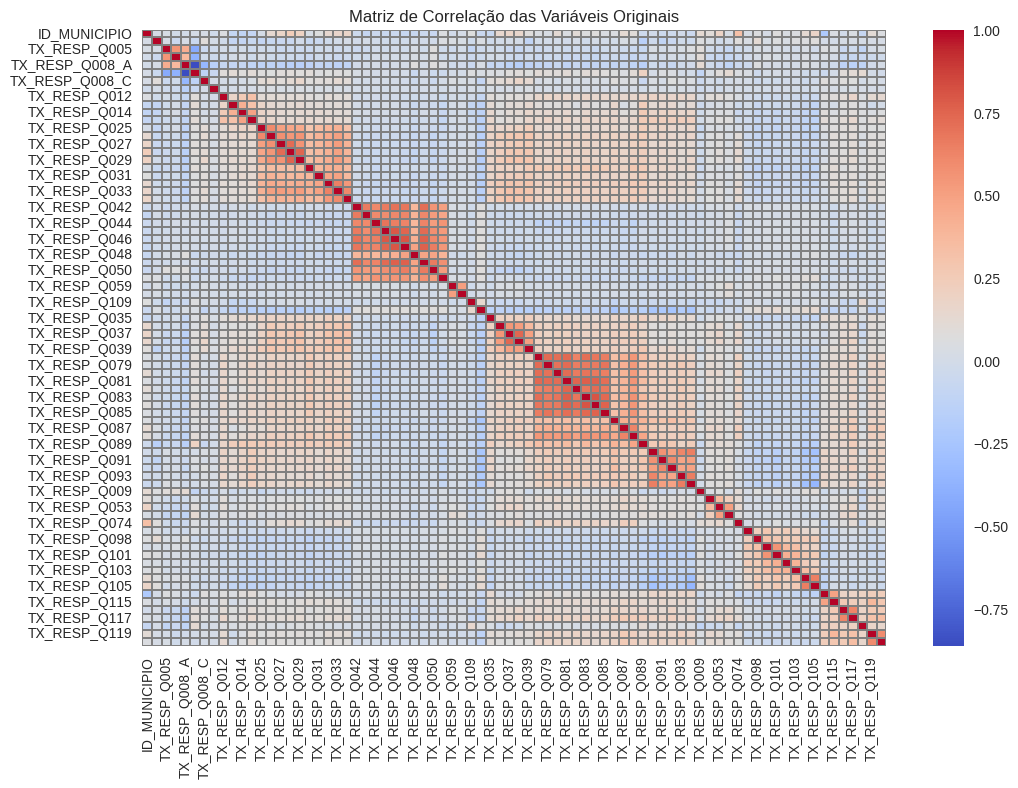


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:00:55
⏳ Duração da execução: 0:00:02.096291 (0.03 minutos)



In [51]:
# Código 48 - Manipulando o dataframe TS_PROFESSOR

# Calculando a matriz de correlação para as variáveis originais
matriz_correlacao = dados_padronizados.corr()

# Criando o heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(
    matriz_correlacao,
    annot=False,         # Sem anotações nos quadrados
    cmap='coolwarm',     # Paleta de cores
    cbar=True,           # Barra de cores ativada
    fmt=".2f",           # Formatação numérica
    linewidths=0.1,      # Linhas horizontais suaves
    linecolor='grey'     # Cor das linhas
)
plt.title("Matriz de Correlação das Variáveis Originais")

# Diretório para salvar a imagem
diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")
os.makedirs(diretorio, exist_ok=True)

# Nome do arquivo
nome_arquivo = "matriz_correlacao.png"
caminho_completo = os.path.join(diretorio, nome_arquivo)

# Salvando a imagem
plt.savefig(caminho_completo, dpi=300)

# Mensagem de confirmação
print(f"Imagem salva: {caminho_completo}")

# Exibindo o gráfico
plt.show()


## 2.1 UTILIZANDO PCA + KMEANS

### **O que é PCA (Análise de Componentes Principais)?**

A **Análise de Componentes Principais (PCA)** é uma técnica estatística utilizada para **reduzir a dimensionalidade** de um conjunto de dados, preservando o máximo possível de informação. Ela transforma um conjunto de variáveis possivelmente correlacionadas em um novo conjunto de variáveis **não correlacionadas**, chamadas de **componentes principais**.

---

#### **Como funciona a PCA?**
1. **Padronização dos Dados**  
   - Os dados são normalizados para terem média zero e desvio padrão igual a 1. Isso garante que todas as variáveis tenham a mesma escala.  

2. **Cálculo da Matriz de Covariância**  
   - Mede como as variáveis variam juntas. Esse passo identifica as direções nas quais os dados possuem maior variância.  

3. **Autovalores e Autovetores**  
   - Os **autovetores** representam as direções (componentes principais) e os **autovalores** representam a importância (variância explicada) de cada direção.  

4. **Ordenação por Variância Explicada**  
   - Os componentes são ordenados pela quantidade de variância explicada, e o gráfico **Scree Plot** ajuda a escolher o número de componentes principais necessários.  

5. **Transformação dos Dados**  
   - Os dados originais são projetados nesses novos eixos principais, reduzindo a dimensionalidade.  


In [52]:
# Código 49 - Manipulando o dataframe TS_PROFESSOR

# Definindo o modelo PCA para manter 90% da variância
# n_components = 0.9 indica que queremos reter 90% da variância dos Dados originais
pca = PCA(n_components = 0.9)

# Aplicando o PCA aos Dados e transformando o DataFrame 'Dados' no novo espaço reduzido
# O resultado 'dados_pca' é uma matriz com menos colunas (componentes principais), mas mantém 90% da variância
X_PCA = pca.fit_transform(dados_padronizados)

# ===================================================================
# Mantém X_PCA como array
X_PCA_backup = X_PCA.copy()

# X_PCA como DataFrame:
X_PCA_df = pd.DataFrame(X_PCA, columns=[f"Componente_{i+1}" for i in range(X_PCA.shape[1])])

# Cópia do DataFrame
X_PCA_df_backup = X_PCA_df.copy()

# ===================================================================

# Verificando a quantidade de amostras (linhas) e o número de componentes principais (colunas) após a transformação
linhas, componentes = X_PCA.shape

print(f'O DataFrame transformado possui {linhas} linhas e {componentes} componentes principais.')

🕒 Execução iniciada em: 19-02-2025 02:00:58

----------------------------------------
O DataFrame transformado possui 71016 linhas e 52 componentes principais.

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:00:58
⏳ Duração da execução: 0:00:00.168887 (0.00 minutos)



In [53]:
# Código 50 - Manipulando o dataframe TS_PROFESSOR

# ================================
# Conversão da Matriz PCA para DataFrame
# ================================

# Criação do DataFrame a partir da matriz PCA
dados_pca = pd.DataFrame(
    X_PCA, 
    columns=[f"Componente_{i+1}" for i in range(X_PCA.shape[1])]
)

# Exibição das primeiras 5 linhas do DataFrame resultante
print("\nPrimeiras 5 linhas do DataFrame após a aplicação do PCA:")

dados_pca.head()


🕒 Execução iniciada em: 19-02-2025 02:00:59

----------------------------------------

Primeiras 5 linhas do DataFrame após a aplicação do PCA:


,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7,Componente_8,Componente_9,Componente_10,...,Componente_43,Componente_44,Componente_45,Componente_46,Componente_47,Componente_48,Componente_49,Componente_50,Componente_51,Componente_52
0,1.296282,-1.374514,-0.095568,-0.847064,0.934673,3.488198,0.124121,3.481874,0.498982,4.305499,...,2.036836,-1.238080,-0.123051,2.394705,-1.267312,1.051028,1.090350,-1.356491,0.744746,0.213261
1,5.188302,1.509508,-0.017972,-2.272919,-2.152563,-3.756549,1.420329,1.558310,-0.613152,-0.341384,...,0.534062,0.766360,0.721998,1.455105,-0.550268,0.633472,-0.268809,0.294550,-0.030670,-0.344290
2,-0.446577,0.347308,-0.515522,2.191412,-0.650656,1.456626,-1.412953,-0.414735,-0.056884,-0.539357,...,0.164648,1.022965,0.138965,-0.179444,0.213305,0.193903,-0.630582,0.355149,0.349164,0.140839
3,1.741472,0.901535,-0.009280,2.614550,-0.407976,1.973452,0.011274,-0.856620,1.740743,0.831859,...,0.084377,0.426936,-0.332512,0.577818,1.575751,0.031000,-0.689676,0.218862,-0.308022,0.344572
4,5.507403,5.380388,1.106513,-1.286885,-0.412991,-3.339236,0.822435,-0.961286,1.268231,0.515804,...,0.009175,0.805531,0.320468,0.881460,-0.750838,0.525471,-0.121182,0.504145,0.552685,0.350551



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:00:59
⏳ Duração da execução: 0:00:00.016921 (0.00 minutos)



In [54]:
# Código 51 - Manipulando o dataframe TS_PROFESSOR

dados_padronizados.head()

🕒 Execução iniciada em: 19-02-2025 02:01:01

----------------------------------------


,ID_MUNICIPIO,ID_AREA,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q008_A,TX_RESP_Q008_B,TX_RESP_Q008_C,TX_RESP_Q008_D,TX_RESP_Q012,TX_RESP_Q013,...,TX_RESP_Q103,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120
0,-1.191493,-0.391592,-1.309816,-1.373313,-1.831500,2.096641,-0.23117,-0.133225,1.576153,2.231510,...,-0.269656,-0.713835,1.208981,1.281170,0.909963,0.103518,0.259665,1.871647,0.982788,1.294463
1,0.896038,-0.391592,2.069170,2.768527,0.858604,-0.770547,-0.23117,-0.133225,-0.462005,0.270796,...,-0.269656,-0.713835,-1.067966,-0.643564,0.909963,0.103518,0.259665,0.184006,0.982788,1.294463
2,0.913409,-0.391592,0.226087,-0.698347,-0.934799,1.140911,-0.23117,-0.133225,-1.101427,-1.689918,...,-0.269656,-0.713835,0.449998,-1.285142,0.909963,-0.470656,-1.402491,-0.237904,0.140404,0.536935
3,0.992195,-0.391592,-0.541864,-0.238142,-0.934799,1.140911,-0.23117,-0.133225,0.896767,0.924368,...,-0.269656,0.250422,0.449998,-0.483169,0.198104,-0.183569,-0.193650,-0.237904,-0.701981,-0.220593
4,1.040584,-0.391592,2.069170,1.387914,0.858604,-0.770547,-0.23117,-0.133225,1.576153,2.231510,...,-0.269656,-0.713835,-1.067966,-0.643564,0.909963,1.826043,1.166296,0.184006,0.982788,0.158171



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:01:01
⏳ Duração da execução: 0:00:00.011208 (0.00 minutos)





---



In [55]:
# Código 52 - Manipulando o dataframe TS_PROFESSOR

# Definindo o modelo PCA para capturar 100% da variância (para analisar todas as componentes)
pca = PCA(n_components=None)

# Ajustando o PCA aos Dados
X_PCA = pca.fit_transform(dados_padronizados)

# Calculando a variância explicada acumulada
variancia_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Identificando as componentes que explicam a partir de 90% da variância acumulada
indice_90_var = np.where(variancia_acumulada >= 0.9)[0][0]

componentes_selecionadas = range(indice_90_var, len(variancia_acumulada))

print(f"Componentes a partir de 90% da variância acumulada: {list(componentes_selecionadas)}\n")

# Criando o DataFrame de loadings
variaveis = dados_padronizados.columns

loadings = pd.DataFrame(
    pca.components_.T, 
    index=variaveis, 
    columns=[f"Componente {i+1}" for i in range(len(pca.components_))]
)

# Analisando as variáveis mais influentes para as componentes selecionadas
componentes_variancia = []

for i, componente in enumerate(componentes_selecionadas, start=1):
    nome_componente = f"Componente {componente + 1}"
    top_variaveis = loadings[nome_componente].abs().sort_values(ascending=False).head(10)
    soma_variancia = top_variaveis.sum()
    num_variaveis = len(top_variaveis)
    componentes_variancia.append((nome_componente, soma_variancia, num_variaveis))

    print(f"{i} - Variáveis mais influentes para {nome_componente} (Total de variáveis do componente: {num_variaveis}, Variância total = {soma_variancia:.6f})")
    
    for j, (var, valor) in enumerate(top_variaveis.items(), start=1):
        print(f"{j} - {var}    {valor:.6f}")
    print("-" * 50)

# Ordenando os componentes por soma de variâncias
componentes_variancia.sort(key=lambda x: x[1], reverse=True)

print("\nComponentes ordenados por soma da variância total das variáveis mais influentes:")

for nome_componente, soma_variancia, num_variaveis in componentes_variancia:
    print(f"{nome_componente}: Total de variáveis = {num_variaveis}, Variância total = {soma_variancia:.6f}")


🕒 Execução iniciada em: 19-02-2025 02:01:02

----------------------------------------
Componentes a partir de 90% da variância acumulada: [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]

1 - Variáveis mais influentes para Componente 52 (Total de variáveis do componente: 10, Variância total = 2.600853)
1 - TX_RESP_Q027    0.468542
2 - TX_RESP_Q029    0.392110
3 - TX_RESP_Q053    0.259953
4 - TX_RESP_Q032    0.258559
5 - TX_RESP_Q050    0.241916
6 - TX_RESP_Q026    0.207729
7 - TX_RESP_Q034    0.206329
8 - TX_RESP_Q054    0.202256
9 - TX_RESP_Q044    0.190574
10 - TX_RESP_Q048    0.172886
--------------------------------------------------
2 - Variáveis mais influentes para Componente 53 (Total de variáveis do componente: 10, Variância total = 2.590300)
1 - TX_RESP_Q053    0.487865
2 - TX_RESP_Q054    0.398656
3 - TX_RESP_Q005    0.261924
4 - TX_RESP_Q101    0.238252
5 - TX_RESP_Q100    0.224523
6 - ID_MUNICIPIO    0.224046
7 - 

In [56]:
# Código 54 - Manipulando o dataframe TS_PROFESSOR

# Calculando o PCA com todas as componentes
pca_full = PCA()

X_full_PCA = pca_full.fit_transform(dados_padronizados)

# Variância explicada por cada componente
variancia_explicada = pca_full.explained_variance_ratio_

# Exibindo a variância acumulada para as primeiras componentes
variancia_acumulada = variancia_explicada.cumsum()


# Filtrando as componentes que contribuem para pelo menos 90% da variância acumulada
componentes_acima_90 = [
    (i + 1, var, acum)
    for i, (var, acum) in enumerate(zip(variancia_explicada, variancia_acumulada))
    if acum >= 0.90
]

# Exibindo as componentes a partir de 90% da variância acumulada, enumeradas
print("\n=== Componentes principais a partir de 90% da variância acumulada ===\n")
for idx, (comp, var, acum) in enumerate(componentes_acima_90, start=1):
    print(f"{idx}. Componente {comp}: Variância explicada = {var:.4f}, Variância acumulada = {acum:.4f}")

🕒 Execução iniciada em: 19-02-2025 02:01:04

----------------------------------------

=== Componentes principais a partir de 90% da variância acumulada ===

1. Componente 52: Variância explicada = 0.0055, Variância acumulada = 0.9015
2. Componente 53: Variância explicada = 0.0055, Variância acumulada = 0.9071
3. Componente 54: Variância explicada = 0.0054, Variância acumulada = 0.9124
4. Componente 55: Variância explicada = 0.0052, Variância acumulada = 0.9177
5. Componente 56: Variância explicada = 0.0052, Variância acumulada = 0.9229
6. Componente 57: Variância explicada = 0.0049, Variância acumulada = 0.9277
7. Componente 58: Variância explicada = 0.0048, Variância acumulada = 0.9325
8. Componente 59: Variância explicada = 0.0047, Variância acumulada = 0.9372
9. Componente 60: Variância explicada = 0.0045, Variância acumulada = 0.9417
10. Componente 61: Variância explicada = 0.0045, Variância acumulada = 0.9461
11. Componente 62: Variância explicada = 0.0044, Variância acumulada = 

🕒 Execução iniciada em: 19-02-2025 02:01:09

----------------------------------------
Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/scree_plot_variancia_acumulada.png


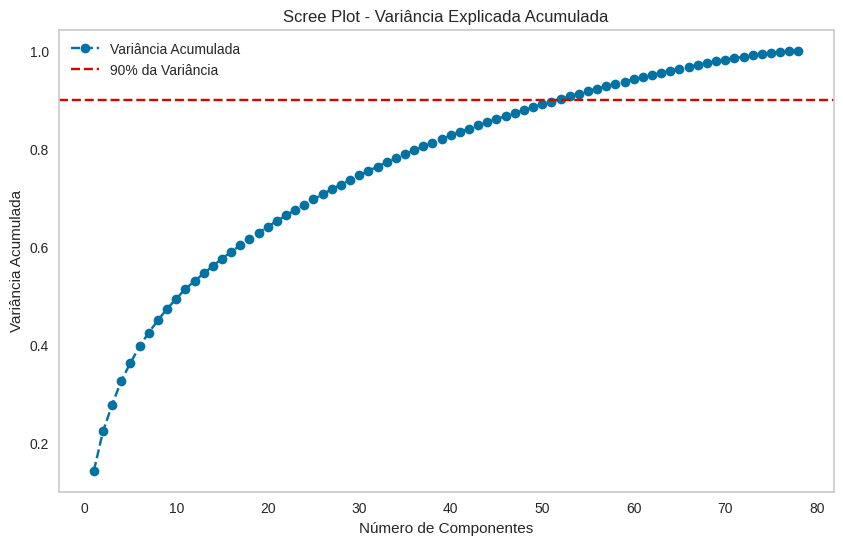

Número de componentes que capturam pelo menos 90% da variância: 52

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:01:10
⏳ Duração da execução: 0:00:00.609224 (0.01 minutos)



In [57]:
# Código 55 - Manipulando o dataframe TS_PROFESSOR

# Calculando o PCA com todas as componentes
pca = PCA()

X_pca = pca.fit_transform(dados_padronizados)

# Variância explicada por componente
variancia_explicada = pca.explained_variance_ratio_

# Variância acumulada
variancia_acumulada = np.cumsum(variancia_explicada)

# Criando o Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(variancia_acumulada) + 1),
    variancia_acumulada,
    marker='o',
    linestyle='--',
    label="Variância Acumulada"
)
plt.axhline(y=0.90, color='r', linestyle='--', label="90% da Variância")
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('Scree Plot - Variância Explicada Acumulada')
plt.grid()
plt.legend()

# Diretório para salvar a imagem
diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")
os.makedirs(diretorio, exist_ok=True)

# Nome do arquivo
nome_arquivo = "scree_plot_variancia_acumulada.png"
caminho_completo = os.path.join(diretorio, nome_arquivo)

# Salvando a imagem
plt.savefig(caminho_completo, dpi=300)

# Mensagem de confirmação
print(f"Imagem salva: {caminho_completo}")

# Exibindo o gráfico
plt.show()

# Exibindo o número de componentes que capturam pelo menos 90% da variância
num_componentes_90 = np.argmax(variancia_acumulada >= 0.90) + 1
print(f"Número de componentes que capturam pelo menos 90% da variância: {num_componentes_90}")


### Variância Explicada e Variância Acumulada?

Variância Explicada é a quantidade de variabilidade dos Dados originais que cada componente principal consegue capturar, ou seja o peso de cada componente, já a variável acumulada é o somatório progressivo das variâncias explicadas por cada componente. A acumulada nos ajuda a escolher quantas são necessárias para representar bem os Dados.


In [58]:
# Código 56 - Manipulando o dataframe TS_PROFESSOR

# Convertendo a matriz resultante do PCA em um DataFrame Pandas, para facilitar a manipulação e análise
dados_pca = pd.DataFrame(
    X_PCA, 
    columns=[f"Componente_{i+1}" for i in range(X_PCA.shape[1])])

# Exibindo as 5 primeiras linhas do DataFrame resultante do PCA para revisão
print("\nPrimeiras 5 linhas do DataFrame após o PCA:")
dados_pca.head()


🕒 Execução iniciada em: 19-02-2025 02:01:12

----------------------------------------

Primeiras 5 linhas do DataFrame após o PCA:


,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7,Componente_8,Componente_9,Componente_10,...,Componente_69,Componente_70,Componente_71,Componente_72,Componente_73,Componente_74,Componente_75,Componente_76,Componente_77,Componente_78
0,1.296282,-1.374514,-0.095568,-0.847064,0.934673,3.488198,0.124121,3.481874,0.498982,4.305499,...,0.288268,0.071658,-2.503294,0.726538,1.133090,-0.121039,-0.333086,-2.608466,1.585107,1.080904e-14
1,5.188302,1.509508,-0.017972,-2.272919,-2.152563,-3.756549,1.420329,1.558310,-0.613152,-0.341384,...,-0.644777,0.418658,-0.373870,-0.725243,-0.102352,-0.485074,-0.062737,0.119252,-0.058930,-1.070344e-15
2,-0.446577,0.347308,-0.515522,2.191412,-0.650656,1.456626,-1.412953,-0.414735,-0.056884,-0.539357,...,-0.131673,-0.039060,0.395291,-0.092462,0.635894,-0.328347,-1.555575,-0.828085,-0.308969,-1.545616e-16
3,1.741472,0.901535,-0.009280,2.614550,-0.407976,1.973452,0.011274,-0.856620,1.740743,0.831859,...,-0.115520,-0.006736,0.319596,-0.123986,0.193821,-0.239747,-0.479553,0.062563,0.246374,-4.183916e-16
4,5.507403,5.380388,1.106513,-1.286885,-0.412991,-3.339236,0.822435,-0.961286,1.268231,0.515804,...,0.222115,-0.245857,-0.113535,0.720091,0.174145,0.152933,-0.220350,0.538522,0.858220,-1.549732e-15



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:01:12
⏳ Duração da execução: 0:00:00.012593 (0.00 minutos)



## Aplicando o Kmeans nos dados

In [59]:
# Código 57 - Manipulando o dataframe TS_PROFESSOR

# Definindo o número de clusters e parâmetros para o modelo KMeans
numero_clusters = 7                                 # Número de clusters a serem formados
metodo_de_inicializacao = 'k-means++'               # Método de inicialização para melhorar a eficiência
numero_vezes = 10                                   # Número de vezes que o KMeans será rodado com diferentes centroides iniciais
max_numero_interacoes = 300                         # Máximo número de iterações para cada execução do algoritmo
aleatorio = 42

kmeans = KMeans(
    n_clusters = numero_clusters,
    init = metodo_de_inicializacao,
    n_init = numero_vezes,
    max_iter = max_numero_interacoes,
    random_state = aleatorio
)

# Ajustando o modelo e obtendo as previsões dos clusters para os Dados transformados pelo PCA
pred_y = kmeans.fit_predict(X_PCA)

# Usei essa outra variável mais fácil de identificar o significado. Não quis mudar em tudo porque podia esquecer de mudar
# em algum lugar e quebrar o programa
previsao_clusters = pred_y

# Exibindo o número de clusters gerados
numero_real_clusters = np.unique(previsao_clusters)
print(f"\nNúmero de clusters gerados (esperado = {numero_clusters}): {len(numero_real_clusters)}")
print(f"Clusters encontrados: {numero_real_clusters}")

# Resumo por cluster
print(f"\nResumo dos Clusters Gerados:")
for i in numero_real_clusters:
    count = np.sum(previsao_clusters == i)
    print(f"Cluster {i}: {count} elementos")

# Verificando se algum cluster inesperado foi formado
if len(numero_real_clusters) != numero_clusters:
    print("\n⚠️ ATENÇÃO: O número de clusters gerados é diferente do esperado!")
    print("Revise os dados e a pré-processamento!")

🕒 Execução iniciada em: 19-02-2025 02:01:13

----------------------------------------

Número de clusters gerados (esperado = 7): 7
Clusters encontrados: [0 1 2 3 4 5 6]

Resumo dos Clusters Gerados:
Cluster 0: 3842 elementos
Cluster 1: 9768 elementos
Cluster 2: 10165 elementos
Cluster 3: 10808 elementos
Cluster 4: 11055 elementos
Cluster 5: 15175 elementos
Cluster 6: 10203 elementos

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:01:17
⏳ Duração da execução: 0:00:04.256280 (0.07 minutos)



# Escolha das componentes para gerar o gráfico em 2d

Após testar como várias componentes as que tiveram melhor desempenho foram as componentes:
- Componentes (58 e 63)
    - Maior dispersão dos pontos, com menor sobreposição em comparação aos anteriores.
    Centróides estão mais espaçados, facilitando a diferenciação visual entre os clusters.
    Este par mostra potencial para ser uma boa escolha.
- Componentes (62 e 68):
    - Apresenta um padrão mais esparso em comparação aos demais.
    Centróides estão bem separados e visíveis.
    É o mais promissor para análise visual dos clusters, com menor sobreposição e melhor organização.


Escolhi o primeiro por conveniência.

🕒 Execução iniciada em: 19-02-2025 02:01:19

----------------------------------------
Imagem salva em: /home/francisco/Downloads/mono_francisco_jose/imagens/clusters_componentes_58_63.png


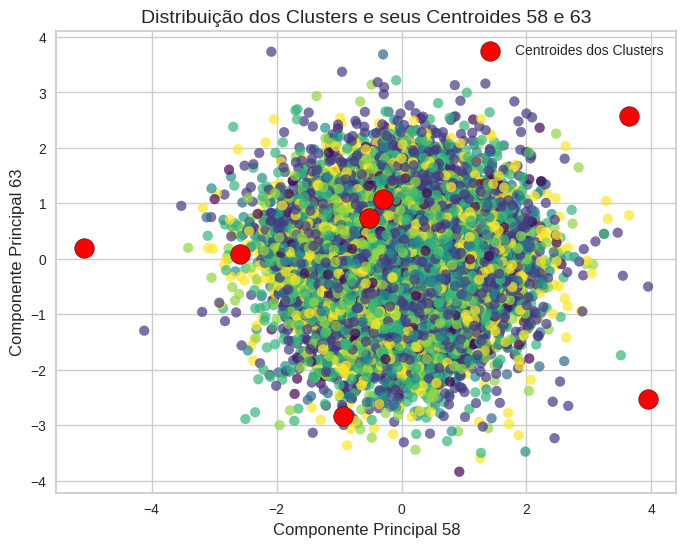


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:01:24
⏳ Duração da execução: 0:00:04.569082 (0.08 minutos)



In [60]:
# Código 58 - Manipulando o dataframe TS_PROFESSOR

# Selecionando as componentes desejadas
componente01 = 58
componente02 = 63

componentes_para_plot = [componente01, componente02] 

X_plot = X_PCA[:, componentes_para_plot]

# Plotando os Dados após a transformação PCA, colorindo por cluster atribuído
plt.figure(figsize=(8, 6))
plt.scatter(
    X_plot[:, 0],        # Eixo X: Componente 01
    X_plot[:, 1],        # Eixo Y: Componente 02
    c=pred_y,            # Cor dos pontos baseada nos clusters atribuídos
    cmap='viridis',      # Paleta de cores para diferenciar os clusters
    alpha=0.7            # Transparência para facilitar a visualização
)

# Plotando os centroides dos clusters
plt.scatter(
    kmeans.cluster_centers_[:, 0],  # Eixo X: Componente 01
    kmeans.cluster_centers_[:, 1],  # Eixo Y: Componente 02
    s=200,                          # Tamanho dos pontos representando os centroides
    c='red',                        # Cor vermelha para destacar os centroides
    edgecolors='black',             # Borda preta para os centroides
    label='Centroides dos Clusters' # Legenda para os centroides
)

# Grade, título e legendas
plt.title(f'Distribuição dos Clusters e seus Centroides {componente01} e {componente02}', fontsize=14)
plt.xlabel(f'Componente Principal {componente01}', fontsize=12)
plt.ylabel(f'Componente Principal {componente02}', fontsize=12)
plt.legend()  # Exibindo a legenda para os centroides
plt.grid(True)  # Exibindo uma grade para facilitar a leitura dos pontos

# Salvar a imagem com o nome baseado nos componentes
nome_arquivo = f'clusters_componentes_{componentes_para_plot[0]}_{componentes_para_plot[1]}.png'
diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")
os.makedirs(diretorio, exist_ok=True)  # Criar o diretório se não existir

caminho_completo = os.path.join(diretorio, nome_arquivo)
plt.savefig(caminho_completo, dpi=300)  # Salvar a imagem com alta resolução
print(f"Imagem salva em: {caminho_completo}")

plt.show()



# Escolha das componentes para gerar o gráfico em 3d

Após testar várias combinações de componentes, as que tiveram melhor desempenho para visualização em 3D foram:

- **Componentes (58, 63, 68)**  
    - Apresentou uma boa dispersão dos pontos, com menor sobreposição entre os clusters.  
    - Os centróides estão mais espaçados, facilitando a visualização e interpretação dos grupos.  
    - Este conjunto mostrou ser a melhor escolha para análise visual em 3D devido à separação clara dos clusters.  

- **Componentes (58, 63, 62)**  
    - Os clusters estão bem definidos, mas há uma leve concentração central que reduz a separação visual.  
    - Embora tenha uma boa organização, apresenta mais sobreposição em comparação ao primeiro conjunto.  

- **Componentes (58, 63, 60)**  
    - Mostrou uma estrutura mais uniforme, porém os pontos ficaram muito compactados no centro.  
    - A separação entre os clusters não ficou tão evidente, dificultando a interpretação.  

- **Componentes (58, 63, 52)**  
    - Apresentou maior sobreposição entre os clusters, dificultando a visualização clara dos grupos.  
    - Embora tenha formado um padrão circular e organizado, faltou separação suficiente.  

---

**Escolha Final:**  
A combinação **58, 63, 68** foi selecionada por apresentar a melhor separação visual dos clusters, menor sobreposição e uma distribuição mais equilibrada dos pontos. 


🕒 Execução iniciada em: 19-02-2025 02:01:25

----------------------------------------
Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/clusters_3D_58_63_63.png


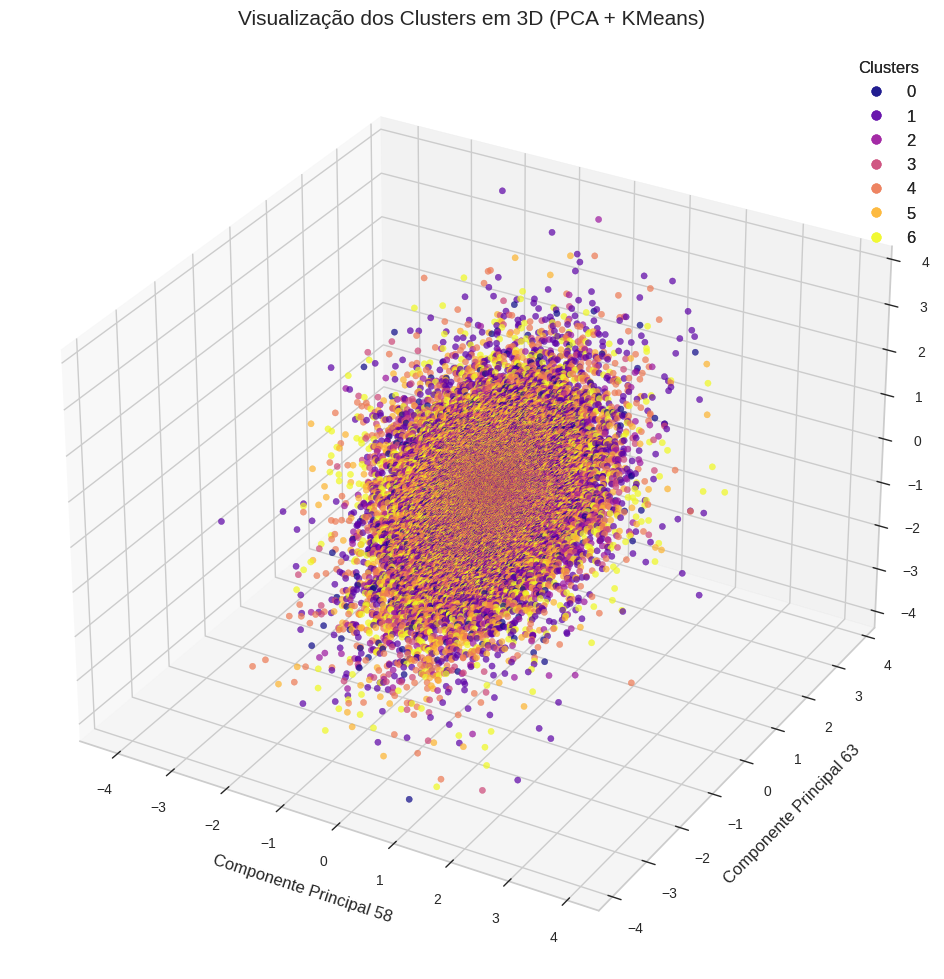


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:01:30
⏳ Duração da execução: 0:00:04.583035 (0.08 minutos)



In [61]:
# Código 59 - Manipulando o dataframe TS_PROFESSOR

# Criando a figura
fig = plt.figure(figsize=(12, 12))

# Criando um subplot com projeção em 3D
axis = fig.add_subplot(111, projection='3d')

componente01 = 58
componente02 = 63
componente03 = 68

# Diretório para salvar as imagens
diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")
os.makedirs(diretorio, exist_ok=True)

# Selecionando as componentes desejadas 
componentes_para_plot = [componente01, componente02, componente02]  

X_plot_3d = X_PCA[:, componentes_para_plot]

# Plotando o gráfico de dispersão com os componentes principais 68, 62 e 54
scatter = axis.scatter(
    X_plot_3d[:, 0],    # Componente Principal 01
    X_plot_3d[:, 1],    # Componente Principal 02
    X_plot_3d[:, 2],    # Componente Principal 03
    c=pred_y,           # Cores representando os clusters
    cmap='plasma',      # Mapa de cores 'plasma'
    alpha=0.7           # Transparência para melhorar a visualização
)

# Adicionando título e rótulos aos eixos
axis.set_title("Visualização dos Clusters em 3D (PCA + KMeans)", fontsize=15, pad=15)
axis.set_xlabel(f"Componente Principal {componente01}", fontsize=12, labelpad=12)
axis.set_ylabel(f"Componente Principal {componente02}", fontsize=12, labelpad=12)
axis.set_zlabel(f"Componente Principal {componente03}", fontsize=12, labelpad=12)

# Adicionando uma legenda com a coloração dos clusters
legend1 = axis.legend(
    *scatter.legend_elements(),
    title="Clusters",
    fontsize=12,
    title_fontsize=12
)

axis.add_artist(legend1)

# Ajustando a grade e melhorando a visibilidade
axis.grid(True)

# Salva a imagem com base nas componentes usadas
nome_arquivo = f'clusters_3D_{componentes_para_plot[0]}_{componentes_para_plot[1]}_{componentes_para_plot[2]}.png'
caminho_completo = os.path.join(diretorio, nome_arquivo)
plt.savefig(caminho_completo, dpi=300)

# Mensagem de sucesso
print(f"Imagem salva: {caminho_completo}")

# Exibindo o gráfico
plt.show()


---

In [62]:
# Código 60 - Manipulando o dataframe TS_PROFESSOR

# Fazendo backup dessas variaveis, pois vamos usar elas mais na frente

# Trabalhando apenas com os dados_backup
dados_copia = dados.copy()

# Convertendo o DataFrame 'dados' para um array NumPy
dados_saeb_numpy = dados.copy().to_numpy()

🕒 Execução iniciada em: 19-02-2025 02:01:32

----------------------------------------

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:01:32
⏳ Duração da execução: 0:00:00.049593 (0.00 minutos)



---

## Análise do Gráfico

O gráfico apresenta o comportamento do **Índice de Calinski-Harabasz (CH)** em função do número de clusters, utilizando os dados armazenados na variável **`dados_backup`**.

---

### **1. Melhor Número de Clusters: 7**

- **Pico Máximo no Índice CH**:  
  O maior valor do índice CH ocorre em **7 clusters**, sugerindo que essa é a quantidade ideal de agrupamentos para o conjunto de dados analisado.

- **Justificativa**:  
  O Índice CH avalia a qualidade dos clusters com base na densidade interna dos grupos e na separação entre eles. Valores mais altos indicam melhores agrupamentos.

---

### **2. Crescimento Consistente no Índice CH**

- **Comportamento Ascendente**:  
  O gráfico mostra um crescimento consistente no índice à medida que o número de clusters aumenta. Isso sugere que os dados estão sendo separados de maneira mais clara e compacta até **7 clusters**.

- **Estabilização após 7**:  
  A tendência após **7 clusters** sugere uma diminuição nos ganhos, indicando que aumentar o número de clusters além desse ponto não agrega muito valor.

---

In [63]:
# Código 61 - Manipulando o dataframe TS_PROFESSOR

# Inicialização de listas para armazenar métricas e quantidades

ch_PCA = []       # Lista para armazenar métricas relacionadas ao PCA

ch_SPCA = []      # Lista para armazenar métricas relacionadas a uma variação específica do PCA

quant = []        # Lista para armazenar quantidades

print("Variáveis para armazenar métricas e quantidades foram criadas com sucesso.")

🕒 Execução iniciada em: 19-02-2025 02:01:36

----------------------------------------
Variáveis para armazenar métricas e quantidades foram criadas com sucesso.

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:01:36
⏳ Duração da execução: 0:00:00.001216 (0.00 minutos)



O índice Calinski-Harabasz, também conhecido como Critério da Razão de Variância, é uma métrica utilizada para avaliar a qualidade de agrupamentos (clusters) em algoritmos de clustering. Introduzido por Tadeusz Caliński e Jerzy Harabasz em 1974, esse índice quantifica a relação entre a dispersão interna dos clusters e a separação entre eles.

Matematicamente, o índice é definido como a razão entre a soma da dispersão entre clusters (BCSS) e a soma da dispersão dentro dos clusters (WCSS), ajustada pelos respectivos graus de liberdade:

$$
\text{Índice CH} = \frac{\frac{\text{BCSS}}{k-1}}{\frac{\text{WCSS}}{n-k}}
$$

Onde:
- \( k \) é o número de clusters;
- \( n \) é o número total de pontos de Dados;
- BCSS (Between-Cluster Sum of Squares) representa a soma das distâncias quadradas entre os centróides dos clusters e o centróide global, ponderada pelo número de pontos em cada cluster;
- WCSS (Within-Cluster Sum of Squares) é a soma das distâncias quadradas entre os pontos de Dados e seus respectivos centróides de cluster.

Um valor mais alto do índice Calinski-Harabasz indica que os clusters são mais compactos internamente e bem separados entre si, sugerindo uma melhor definição dos agrupamentos. Essa métrica é especialmente útil para determinar o número ideal de clusters em um conjunto de Dados, auxiliando na escolha do modelo de clustering mais apropriado.

É importante notar que o índice Calinski-Harabasz é uma medida interna de validação de clusters, ou seja, avalia a qualidade do agrupamento com base apenas nos Dados e nos resultados do clustering, sem referência a rótulos externos ou verdadeiros.  

## Cálculo do índice Calinski-Harabasz para diferentes números de clusters para o ch_PCA

In [64]:
# Código 62 - Manipulando o dataframe TS_PROFESSOR

# Definindo parâmetros para KMeans e listas de resultados
quantidade_minima_clusters = 2   # Número mínimo de clusters
quantidade_maxima_clusters = 21  # Número máximo de clusters (não incluso)

metricas_pca = ch_PCA

# Loop para testar diferentes quantidades de clusters usando KMeans nos Dados originais (sem PCA)
for numero_clusters in range(quantidade_minima_clusters, quantidade_maxima_clusters):

    quant.append(numero_clusters)  # Armazena a quantidade de clusters sendo testada

    # Instanciando o modelo KMeans com parâmetros definidos
    kmeans = KMeans(
        n_clusters = numero_clusters,           # Número de clusters
        init = 'k-means++',                     # Método de inicialização
        n_init = 10,                            # Número de inicializações
        max_iter = 500                          # Máximo número de iterações
    )

    # Ajustando o modelo aos Dados sem transformação PCA e fazendo previsões dos clusters
    previsoes_clusters = kmeans.fit_predict(X_PCA)

    # Calculando o índice de Calinski-Harabasz para avaliar o modelo com o número de clusters atual
    indice_calinski_harabasz = calinski_harabasz_score(X_PCA, previsoes_clusters)

    # Armazenando o índice calculado na lista de métricas relacionadas ao dataset original (sem PCA)
    metricas_pca.append(indice_calinski_harabasz)

# Exibindo mensagem de conclusão
print('Finalizado o cálculo do índice Calinski-Harabasz para diferentes números de clusters (ch_PCA)!')



🕒 Execução iniciada em: 19-02-2025 02:01:38

----------------------------------------
Finalizado o cálculo do índice Calinski-Harabasz para diferentes números de clusters (ch_PCA)!

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:03:58
⏳ Duração da execução: 0:02:19.675908 (2.33 minutos)





---



## Cálculo do índice Calinski-Harabasz para diferentes números de clusters para o ch_SPCA

In [65]:
# Código 63 - Manipulando o dataframe TS_PROFESSOR

# Marca o início do tempo
inicio = time.time()

# --------------------------------------------------------------

# Definindo parâmetros para KMeans e listas de resultados
# O objetivo deste loop é calcular a métrica de Calinski-Harabasz (CH) para diferentes números de clusters

quantidade_minima_clusters = 2   # Número mínimo de clusters
quantidade_maxima_clusters = 21  # Número máximo de clusters (não incluso)

metricas_spca = ch_SPCA          # Usei essa outra variável mais fácil, mas mantive a referência para a lista original

# Loop para testar diferentes quantidades de clusters usando KMeans nos Dados originais (sem PCA)
for numero_clusters in range(quantidade_minima_clusters, quantidade_maxima_clusters):

    quant.append(numero_clusters)  # Armazena a quantidade de clusters sendo testada

    # Instanciando o modelo KMeans com parâmetros definidos
    kmeans = KMeans(
        n_clusters = numero_clusters,           # Número de clusters
        init = 'k-means++',                     # Método de inicialização
        n_init = 10,                            # Número de inicializações
        max_iter = 500                          # Máximo número de iterações
        
    )

    # Ajustando o modelo aos Dados sem transformação PCA e fazendo previsões dos clusters
    previsoes_clusters = kmeans.fit_predict(dados_saeb_numpy)

    # Calculando o índice de Calinski-Harabasz para avaliar o modelo com o número de clusters atual
    indice_calinski_harabasz = calinski_harabasz_score(dados_saeb_numpy, previsoes_clusters)

    # Armazenando o índice calculado na lista de métricas relacionadas ao dataset original (sem PCA)
    metricas_spca.append(indice_calinski_harabasz)

# Exibindo mensagem de conclusão
print('Finalizado o cálculo do índice Calinski-Harabasz para diferentes números de clusters (ch_SPCA)!')


# --------------------------------------------------------------

# Marca o fim do tempo
fim = time.time()

# Registra a data no formato dd-mm-aaaa e hora
data_execucao = datetime.now().strftime('%d-%m-%Y %H:%M:%S')  # Data e hora ajustadas

tempo_execucao = fim - inicio  # Tempo decorrido em segundos

# Exibe a saída com separação
print("\n" + "="*40)  # Linha separadora
print(f"Executado em: {data_execucao}")
print(f"Tempo de execução: {tempo_execucao:.4f} segundos")
print("="*40)  # Linha separadora


🕒 Execução iniciada em: 19-02-2025 02:04:14

----------------------------------------
Finalizado o cálculo do índice Calinski-Harabasz para diferentes números de clusters (ch_SPCA)!

Executado em: 19-02-2025 02:05:00
Tempo de execução: 46.5114 segundos

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:05:00
⏳ Duração da execução: 0:00:46.516596 (0.78 minutos)



In [66]:
# Código 64 - Manipulando o dataframe TS_PROFESSOR


# Listas de índices Calinski-Harabasz com e sem PCA (assume que essas listas já estão definidas)
# Caso as listas estejam em outro formato, elas serão convertidas dinamicamente para listas.
if isinstance(ch_PCA, (pd.Series, np.ndarray)):
    ch_PCA = ch_PCA.tolist()
if isinstance(ch_SPCA, (pd.Series, np.ndarray)):
    ch_SPCA = ch_SPCA.tolist()

# Verificando se as listas têm o mesmo tamanho
if len(ch_PCA) != len(ch_SPCA):
    raise ValueError("As listas 'ch_PCA' e 'ch_SPCA' devem ter o mesmo tamanho.")

# Criando um DataFrame com os valores lado a lado
tabela_comparativa = pd.DataFrame({
    'CH Com PCA': ch_PCA,
    'CH Sem PCA': ch_SPCA
})

# Exibindo a tabela
print("Tabela Comparativa de Índices Calinski-Harabasz:")
print(tabela_comparativa)


🕒 Execução iniciada em: 19-02-2025 02:05:24

----------------------------------------
Tabela Comparativa de Índices Calinski-Harabasz:
     CH Com PCA    CH Sem PCA
0   7068.894211  2.313569e+05
1   5155.887951  2.453804e+05
2   4136.674455  4.020439e+05
3   3559.155345  4.522546e+05
4   3171.984265  5.533085e+05
5   2854.506370  6.194697e+05
6   2602.795808  7.179694e+05
7   2395.099460  7.932240e+05
8   2224.117825  8.787829e+05
9   2095.044272  9.981286e+05
10  1953.385045  1.072580e+06
11  1841.508830  1.176609e+06
12  1788.802267  1.266957e+06
13  1687.957487  1.353152e+06
14  1608.853089  1.410900e+06
15  1536.865402  1.473715e+06
16  1472.185087  1.492186e+06
17  1445.540477  1.548551e+06
18  1388.125601  1.593027e+06

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:05:24
⏳ Duração da execução: 0:00:00.003211 (0.00 minutos)



## Usando os indices para calcular o numero ideal de clusters antes de normalizar

🕒 Execução iniciada em: 19-02-2025 02:05:26

----------------------------------------
Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/comparacao_pca_19_clusters antes de normalizar.png


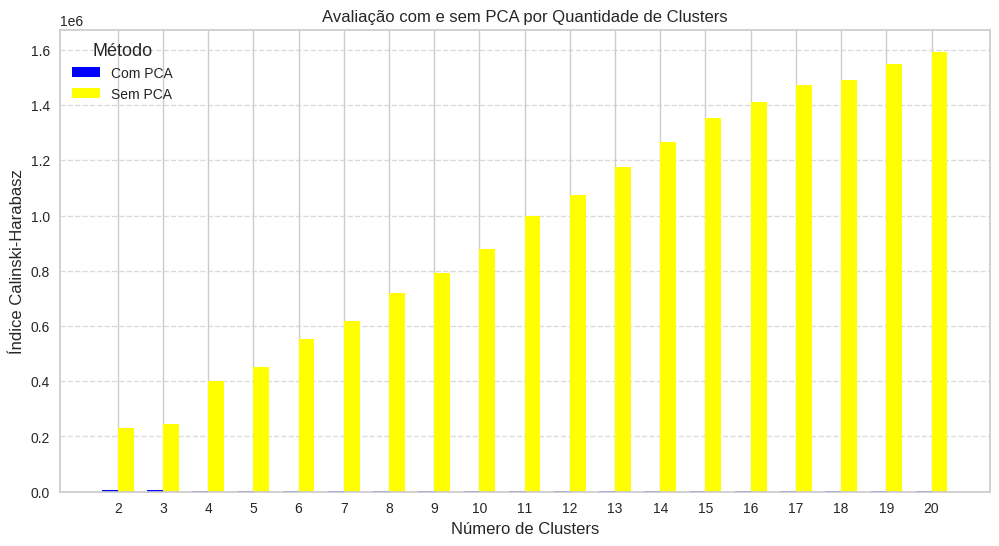


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:05:26
⏳ Duração da execução: 0:00:00.561657 (0.01 minutos)



In [67]:
# Código 65 - Manipulando o dataframe TS_PROFESSOR

# ============================================
# Verificando o tamanho das listas e ajustando se necessário
# ============================================
if len(ch_PCA) != len(ch_SPCA) or len(ch_PCA) != len(quant):
    min_length = min(len(ch_PCA), len(ch_SPCA), len(quant))
    ch_PCA = ch_PCA[:min_length]
    ch_SPCA = ch_SPCA[:min_length]
    quant = quant[:min_length]

# ============================================
# Configurando o Gráfico
# ============================================

# Definindo a largura das barras no gráfico de barras comparativo
largura_barras = 0.35

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(12, 6))

# Definindo as posições para as barras no eixo X
posicoes = np.arange(len(quant))

# Criando as barras para os Dados com PCA
plt.bar(
    posicoes - largura_barras / 2,
    ch_PCA,
    largura_barras,
    label="Com PCA",
    color="blue"
)

# Criando as barras para os dados sem PCA
plt.bar(
    posicoes + largura_barras / 2,
    ch_SPCA,
    largura_barras,
    label="Sem PCA",
    color="yellow"
)

# Definindo os rótulos dos eixos e o título do gráfico
plt.xlabel("Número de Clusters", fontsize=12)
plt.ylabel("Índice Calinski-Harabasz", fontsize=12)
plt.title("Avaliação com e sem PCA por Quantidade de Clusters")

# Definindo a posição dos valores no eixo X e seus rótulos
plt.xticks(
    [r for r in range(len(ch_PCA))],  # Ajustando para os índices das listas
    quant,
    fontsize=10
)

# Adicionando a legenda e uma grade para facilitar a leitura do gráfico
plt.legend(title="Método", fontsize=10, title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ============================================
# Salvando a Imagem na Pasta
# ============================================
# Diretório para salvar a imagem

diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")
os.makedirs(diretorio, exist_ok=True)

# Nome do arquivo baseado na quantidade de clusters
nome_arquivo = f"comparacao_pca_{len(quant)}_clusters antes de normalizar.png"
caminho_completo = os.path.join(diretorio, nome_arquivo)

# Salvando a figura no diretório especificado
plt.savefig(caminho_completo, dpi=300)
print(f"Imagem salva: {caminho_completo}")

# Exibindo o gráfico final
plt.show()

> Como é possível ver no gráfico acima, os valores com pca estão em desiguais em relação aos valores sem pca. Logo é necessário normalizar os valores. Após isso vamos plotar o gráfico novamente.

## Colocando apenas o eixo Y na escala logarítimica

🕒 Execução iniciada em: 19-02-2025 02:05:28

----------------------------------------
Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/comparacao_pca_19_clusters_escala_log_y.png


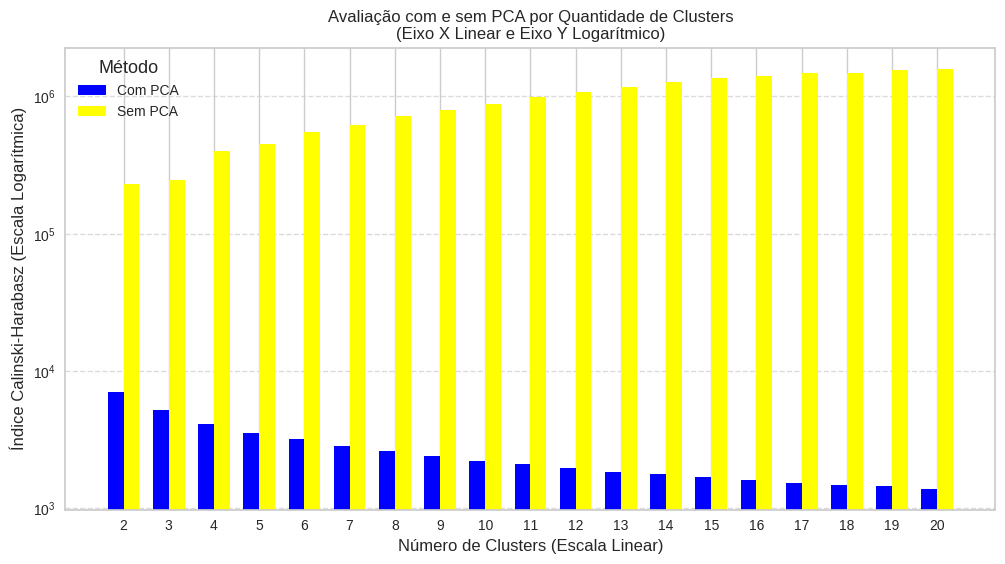


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:05:29
⏳ Duração da execução: 0:00:00.972139 (0.02 minutos)



In [68]:
# Código 66 - Manipulando o dataframe TS_PROFESSOR

# ============================================
# Verificando o tamanho das listas e ajustando se necessário
# ============================================
if len(ch_PCA) != len(ch_SPCA) or len(ch_PCA) != len(quant):
    min_length = min(len(ch_PCA), len(ch_SPCA), len(quant))
    ch_PCA = ch_PCA[:min_length]
    ch_SPCA = ch_SPCA[:min_length]
    quant = quant[:min_length]

# ============================================
# Configurando o Gráfico
# ============================================

# Definindo a largura das barras no gráfico de barras comparativo
largura_barras = 0.35

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(12, 6))

# Definindo as posições para as barras no eixo X
posicoes = np.arange(len(quant))

# Criando as barras para os Dados com PCA
plt.bar(
    posicoes - largura_barras / 2,
    ch_PCA,
    largura_barras,
    label="Com PCA",
    color="blue"
)

# Criando as barras para os dados sem PCA
plt.bar(
    posicoes + largura_barras / 2,
    ch_SPCA,
    largura_barras,
    label="Sem PCA",
    color="yellow"
)

# Definindo os rótulos dos eixos e o título do gráfico
plt.xlabel("Número de Clusters (Escala Linear)", fontsize=12)
plt.ylabel("Índice Calinski-Harabasz (Escala Logarítmica)", fontsize=12)
plt.title("Avaliação com e sem PCA por Quantidade de Clusters\n(Eixo X Linear e Eixo Y Logarítmico)")

# Aplicando apenas o eixo Y em escala logarítmica
plt.yscale("log")

# Definindo a posição dos valores no eixo X e seus rótulos
plt.xticks(
    [r for r in range(len(ch_PCA))],  # Ajustando para os índices das listas
    quant,
    fontsize=10
)

# Adicionando a legenda e uma grade para facilitar a leitura do gráfico
plt.legend(title="Método", fontsize=10, title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ============================================
# Salvando a Imagem na Pasta
# ============================================
# Diretório para salvar a imagem

diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")
os.makedirs(diretorio, exist_ok=True)

# Nome do arquivo baseado na quantidade de clusters
nome_arquivo = f"comparacao_pca_{len(quant)}_clusters_escala_log_y.png"
caminho_completo = os.path.join(diretorio, nome_arquivo)

# Salvando a figura no diretório especificado
plt.savefig(caminho_completo, dpi=300)
print(f"Imagem salva: {caminho_completo}")

# Exibindo o gráfico final
plt.show()


## Colocando tanto x como y na escala logartímica

🕒 Execução iniciada em: 19-02-2025 02:05:30

----------------------------------------
Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/comparacao_pca_19_clusters_escala_log.png


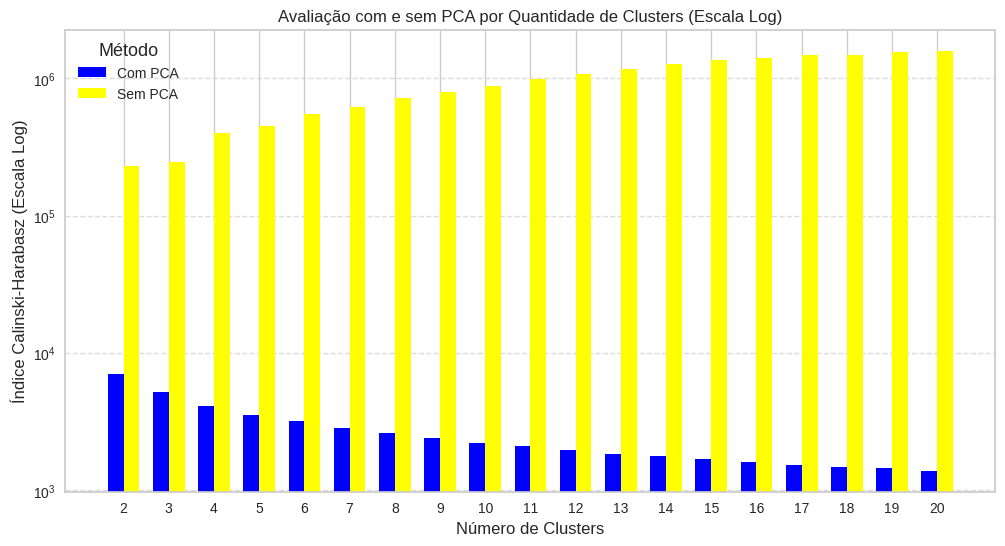


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:05:31
⏳ Duração da execução: 0:00:00.734000 (0.01 minutos)



In [69]:
# Código 67 - Manipulando o dataframe TS_PROFESSOR


# ============================================
# Verificando o tamanho das listas e ajustando se necessário
# ============================================
if len(ch_PCA) != len(ch_SPCA) or len(ch_PCA) != len(quant):
    min_length = min(len(ch_PCA), len(ch_SPCA), len(quant))
    ch_PCA = ch_PCA[:min_length]
    ch_SPCA = ch_SPCA[:min_length]
    quant = quant[:min_length]

# ============================================
# Configurando o Gráfico
# ============================================

# Definindo a largura das barras no gráfico de barras comparativo
largura_barras = 0.35

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(12, 6))

# Definindo as posições para as barras no eixo X
posicoes = np.arange(len(quant))

# Criando as barras para os Dados com PCA
plt.bar(
    posicoes - largura_barras / 2,
    ch_PCA,
    largura_barras,
    label="Com PCA",
    color="blue"
)

# Criando as barras para os dados sem PCA
plt.bar(
    posicoes + largura_barras / 2,
    ch_SPCA,
    largura_barras,
    label="Sem PCA",
    color="yellow"
)

# Definindo os rótulos dos eixos e o título do gráfico
plt.xlabel("Número de Clusters", fontsize=12)
plt.ylabel("Índice Calinski-Harabasz (Escala Log)", fontsize=12)
plt.title("Avaliação com e sem PCA por Quantidade de Clusters (Escala Log)")

# Definindo a escala do eixo Y como logarítmica
plt.yscale("log")

# Definindo a posição dos valores no eixo X e seus rótulos
plt.xticks(
    [r for r in range(len(ch_PCA))],  # Ajustando para os índices das listas
    quant,
    fontsize=10
)

# Adicionando a legenda e uma grade para facilitar a leitura do gráfico
plt.legend(title="Método", fontsize=10, title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ============================================
# Salvando a Imagem na Pasta
# ============================================
# Diretório para salvar a imagem

diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")
os.makedirs(diretorio, exist_ok=True)

# Nome do arquivo baseado na quantidade de clusters
nome_arquivo = f"comparacao_pca_{len(quant)}_clusters_escala_log.png"
caminho_completo = os.path.join(diretorio, nome_arquivo)

# Salvando a figura no diretório especificado
plt.savefig(caminho_completo, dpi=300)
print(f"Imagem salva: {caminho_completo}")

# Exibindo o gráfico final
plt.show()


In [70]:
# Código 68 - Manipulando o dataframe TS_PROFESSOR

# Normalizando os índices Calinski-Harabasz para facilitar a comparação
ch_PCA_normalizado = [valor / max(ch_PCA) for valor in ch_PCA]

ch_SPCA_normalizado = [valor / max(ch_SPCA) for valor in ch_SPCA]

🕒 Execução iniciada em: 19-02-2025 02:05:32

----------------------------------------

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:05:32
⏳ Duração da execução: 0:00:00.001223 (0.00 minutos)



**Observação**: Tive de normalizar as métricas para evitar a dominância de uma sobre a outra.



---



In [71]:
# Código 68 - Manipulando o dataframe TS_PROFESSOR

# Exibindo a quantidade de diferentes números de clusters avaliados e a lista correspondente

quantidade_clusters_avaliados = len(quant)

print(f"Número total de diferentes quantidades de clusters avaliados: {quantidade_clusters_avaliados} \n")

print(f"Lista das quantidades de clusters avaliadas:\n{quant}")

🕒 Execução iniciada em: 19-02-2025 02:05:33

----------------------------------------
Número total de diferentes quantidades de clusters avaliados: 19 

Lista das quantidades de clusters avaliadas:
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:05:33
⏳ Duração da execução: 0:00:00.001770 (0.00 minutos)



## Usando os indices para calcular o numero ideal de clusters depois de normalizar

🕒 Execução iniciada em: 19-02-2025 02:05:36

----------------------------------------
Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/comparacao_pca_depois_de_normalizar_19_clusters.png


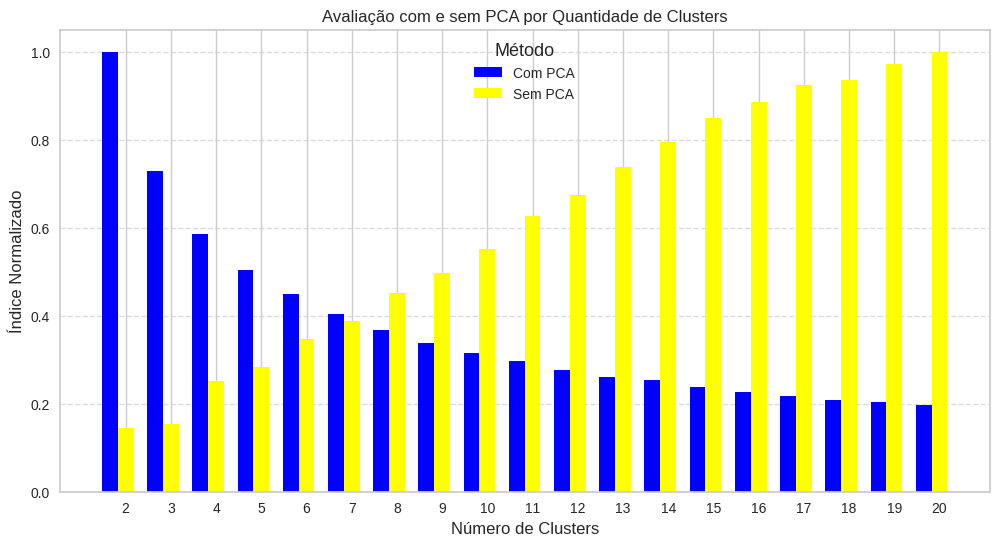


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:05:36
⏳ Duração da execução: 0:00:00.514091 (0.01 minutos)



In [72]:
# Código 68 - Manipulando o dataframe TS_PROFESSOR

# ============================================
# Verificando o tamanho das listas e ajustando se necessário
# ============================================
if len(ch_PCA_normalizado) != len(ch_SPCA_normalizado) or len(ch_PCA_normalizado) != len(quant):
    min_length = min(len(ch_PCA_normalizado), len(ch_SPCA_normalizado), len(quant))
    ch_PCA_normalizado = ch_PCA_normalizado[:min_length]
    ch_SPCA_normalizado = ch_SPCA_normalizado[:min_length]
    quant = quant[:min_length]

# ============================================
# Configurando o Gráfico
# ============================================

# Definindo a largura das barras no gráfico de barras comparativo
largura_barras = 0.35

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(12, 6))

# Definindo as posições para as barras no eixo X
posicoes = np.arange(len(quant))

# Criando as barras para os Dados com PCA
plt.bar(
    posicoes - largura_barras / 2, 
    ch_PCA_normalizado, 
    largura_barras, 
    label="Com PCA", 
    color="blue"
)

# Criando as barras para os Dados sem PCA
plt.bar(
    posicoes + largura_barras / 2, 
    ch_SPCA_normalizado, 
    largura_barras, 
    label="Sem PCA", 
    color="yellow"
)

# Definindo os rótulos dos eixos e o título do gráfico
plt.xlabel("Número de Clusters", fontsize=12)
plt.ylabel("Índice Normalizado", fontsize=12)
plt.title("Avaliação com e sem PCA por Quantidade de Clusters")

# Definindo a posição dos valores no eixo X e seus rótulos
plt.xticks(
    [r + largura_barras / 2 for r in range(len(ch_PCA_normalizado))],  # Colocando os rótulos no centro das duas barras
    quant,
    fontsize=10
)

# Adicionando a legenda e uma grade para facilitar a leitura do gráfico
plt.legend(title="Método", fontsize=10, title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ============================================
# Salvando a Imagem na Pasta
# ============================================
# Diretório para salvar a imagem
diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")
os.makedirs(diretorio, exist_ok=True)

# Nome do arquivo baseado na quantidade de clusters
nome_arquivo = f"comparacao_pca_depois_de_normalizar_{len(quant)}_clusters.png"
caminho_completo = os.path.join(diretorio, nome_arquivo)

# Salvando a figura no diretório especificado
plt.savefig(caminho_completo, dpi=300)
print(f"Imagem salva: {caminho_completo}")

# Exibindo o gráfico final
plt.show()

---

## Método do Cotovelo para Definir o Número Ideal de Clusters

🕒 Execução iniciada em: 19-02-2025 02:05:38

----------------------------------------
Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/método_do_cotovelo.png


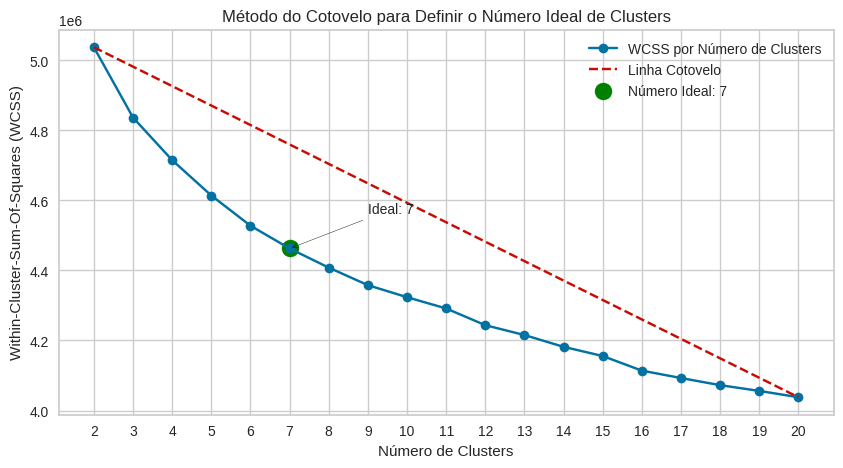


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:08:12
⏳ Duração da execução: 0:02:34.592337 (2.58 minutos)



In [73]:
# Código 69 - Manipulando o dataframe TS_PROFESSOR

# ===============================================================
# CONFIGURAÇÕES INICIAIS
# ===============================================================

# Diretório para salvar as imagens
diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")
os.makedirs(diretorio, exist_ok=True)

# Inicializando listas para armazenar os resultados
wcss = []              # Lista para armazenar a soma dos quadrados dentro do cluster (WCSS)
numeros_clusters = []  # Lista para armazenar o número de clusters avaliados

# Definindo os limites para o número de clusters
quantidade_minima_clusters = 2   # Número mínimo de clusters
quantidade_maxima_clusters = 21  # Número máximo de clusters (não incluso)

# Definindo o modelo KMeans
metodo_inicializacao = 'k-means++'                   # Método de inicialização para otimização
numero_execucoes = 10                                # Número de execuções do KMeans com centroides diferentes
maximo_iteracoes = 500                               # Máximo número de iterações para cada execução
aleatorio = 42

# Loop para testar diferentes quantidades de clusters usando KMeans
for numero_clusters in range(quantidade_minima_clusters, quantidade_maxima_clusters):
    numeros_clusters.append(numero_clusters)  # Armazenando o número de clusters atual
    # Instanciando o modelo KMeans
    kmeans = KMeans(
        n_clusters=numero_clusters,         # Número de clusters
        init=metodo_inicializacao,          # Método de inicialização dos centroides
        n_init=numero_execucoes,            # Número de inicializações diferentes
        max_iter=maximo_iteracoes,          # Máximo número de iterações
        random_state = aleatorio
    )
    # Ajustando o modelo aos Dados transformados pelo PCA
    kmeans.fit(X_PCA)
    # Armazenando o valor da inércia (WCSS) na lista
    wcss.append(kmeans.inertia_)

# Definindo a linha reta que liga o primeiro ao último ponto
x1 = [quantidade_minima_clusters, quantidade_maxima_clusters - 1]  # Pontos do eixo X para a linha reta (número de clusters)
y1 = [wcss[0], wcss[-1]]  # Pontos do eixo Y para a linha reta (valores de WCSS)

# Calculando a distância de cada ponto à linha do cotovelo
distancias = []

for i in range(len(numeros_clusters)):
    # Fórmula da distância de um ponto à linha
    numerador = abs((y1[1] - y1[0]) * numeros_clusters[i] - (x1[1] - x1[0]) * wcss[i] + x1[1] * y1[0] - y1[1] * x1[0])
    denominador = np.sqrt((y1[1] - y1[0])**2 + (x1[1] - x1[0])**2)
    distancias.append(numerador / denominador)

# Identificando o índice do cotovelo (maior distância)
indice_cotovelo = np.argmax(distancias)
numero_clusters_ideal = numeros_clusters[indice_cotovelo]

# Criando o gráfico do Método Cotovelo
plt.figure(figsize=(10, 5))  # Define o tamanho da figura
plt.plot(
    numeros_clusters,
    wcss,
    marker='o',
    linestyle='-',
    color='b',
    label='WCSS por Número de Clusters'
)  # Gráfico do WCSS

plt.plot(
    x1,
    y1,
    linestyle='--',
    color='r',
    label='Linha Cotovelo'
)  # Linha reta auxiliar

# Destacando o número ideal de clusters no gráfico
plt.scatter(
    numero_clusters_ideal,
    wcss[indice_cotovelo],
    s=150,
    c='green',
    label=f'Número Ideal: {numero_clusters_ideal}'
)

# Anotação no gráfico
plt.annotate(
    f"Ideal: {numero_clusters_ideal}",
    xy=(numero_clusters_ideal, wcss[indice_cotovelo]),
    xytext=(numero_clusters_ideal + 2, wcss[indice_cotovelo] + 100000.0),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=10
)

# Configurando o gráfico
plt.title('Método do Cotovelo para Definir o Número Ideal de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Within-Cluster-Sum-Of-Squares (WCSS)')
plt.xticks(numeros_clusters)                     # Ajustando os rótulos no eixo X
plt.legend()                                     # Exibindo a legenda para identificar as linhas no gráfico
plt.grid(True)                                   # Adicionando uma grade para facilitar a leitura dos valores

# Salvando a figura
nome_arquivo_elbow = f"método_do_cotovelo.png"
plt.savefig(os.path.join(diretorio, nome_arquivo_elbow), dpi=300)
print(f"Imagem salva: {os.path.join(diretorio, nome_arquivo_elbow)}")

plt.show()                                       # Exibindo o gráfico


---

## Gráfico de Dispersão dos Clusters

🕒 Execução iniciada em: 19-02-2025 02:08:17

----------------------------------------
Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/dispersao_clusters.png


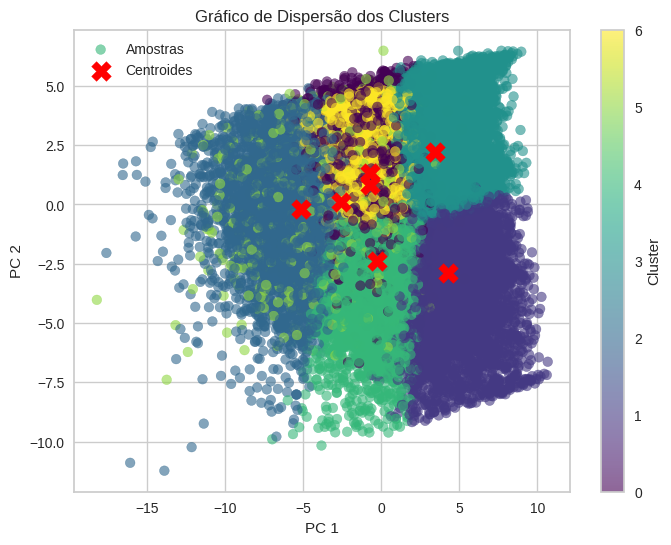


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:08:24
⏳ Duração da execução: 0:00:07.173665 (0.12 minutos)



In [74]:
# Código 70 - Manipulando o dataframe TS_PROFESSOR

# Diretório para salvar as imagens
diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")
os.makedirs(diretorio, exist_ok=True)

# Definindo o modelo KMeans
numero_clusters = 7                  
aleatorio = 42

kmeans_best = KMeans(
    n_clusters = numero_clusters, 
    random_state = aleatorio
)

labels_best = kmeans_best.fit_predict(X_PCA)

plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    X_PCA[:, 0],
    X_PCA[:, 1],
    c=labels_best,
    cmap='viridis',
    alpha=0.6,
    label='Amostras'
)

# Plot dos centroides
centroids = kmeans_best.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    s=200,
    marker='X',
    label='Centroides'
)

plt.title(f"Gráfico de Dispersão dos Clusters")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Cluster")

plt.legend(loc='best')

# === Salvar figura antes de mostrar ===
nome_arquivo = f"dispersao_clusters.png"

caminho_completo = os.path.join(diretorio, nome_arquivo)

plt.savefig(caminho_completo, dpi=300)

print(f"Imagem salva: {caminho_completo}")

# Exibir o gráfico
plt.show()

---

## Índice CH para Diferentes Números de Clusters

🕒 Execução iniciada em: 19-02-2025 02:08:27

----------------------------------------


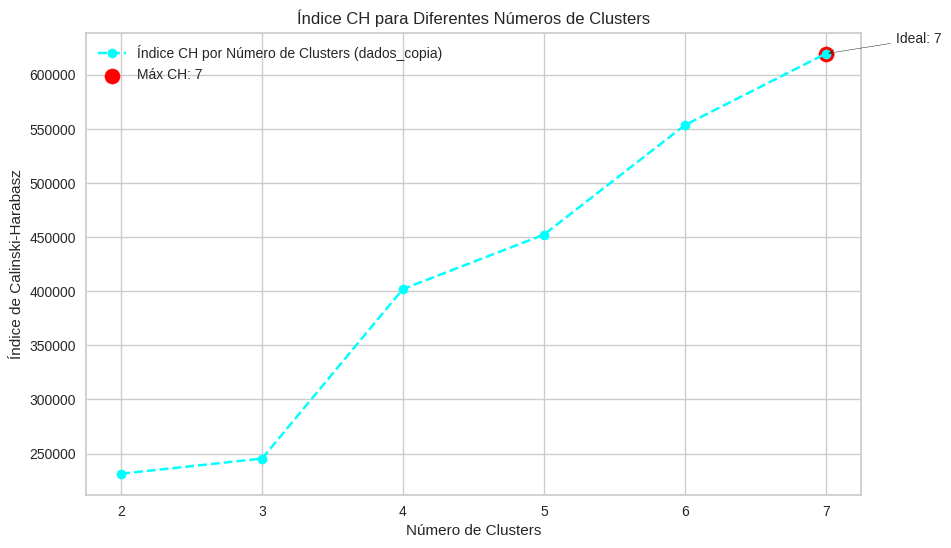

Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/indice_ch_dados_copia.png
Melhor Número de Clusters: 7
Índice CH Máximo: 619469.66

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:08:39
⏳ Duração da execução: 0:00:12.021394 (0.20 minutos)



In [75]:
# Código 71 - Manipulando o dataframe TS_PROFESSOR

# ===============================================================
# CONFIGURAÇÕES INICIAIS
# ===============================================================
diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")

os.makedirs(diretorio, exist_ok=True)

# ===============================================================
# DEFININDO OS DADOS E CÓPIAS
# ===============================================================

# Trabalhando apenas com os dados_backup
# dados_copia = dados.copy()

# Convertendo o DataFrame 'dados' para um array NumPy
# dados_saeb_numpy = dados.copy().to_numpy()

# ===============================================================
# FUNÇÃO PARA CALCULAR O ÍNDICE CH E PLOTAR O GRÁFICO
# ===============================================================
def plot_ch_index(dados, nome_variavel, cor='cyan'):
    faixa_clusters = range(2, 8)  # Clusters de 2 a 7
    ch_scores = []

    # Calculando o índice CH para diferentes números de clusters
    for n_clusters in faixa_clusters:
        kmeans_temp = KMeans(
            n_clusters=n_clusters,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=42
        )
        labels_temp = kmeans_temp.fit_predict(dados)
        ch_scores.append(calinski_harabasz_score(dados, labels_temp))

    # Identificando o melhor número de clusters (máximo CH)
    idx_melhor_ch = np.argmax(ch_scores)
    n_ideal_ch = faixa_clusters[idx_melhor_ch]
    valor_ch_ideal = ch_scores[idx_melhor_ch]

    # ===============================================================
    # GRÁFICO DO ÍNDICE CH
    # ===============================================================
    plt.figure(figsize=(10, 6))
    plt.plot(faixa_clusters, ch_scores, marker='o', linestyle='--', color=cor,
             label=f'Índice CH por Número de Clusters ({nome_variavel})')
    plt.scatter(n_ideal_ch, valor_ch_ideal, c='red', s=120, label=f'Máx CH: {n_ideal_ch}')

    plt.annotate(f"Ideal: {n_ideal_ch}", 
                 xy=(n_ideal_ch, valor_ch_ideal),
                 xytext=(n_ideal_ch + 0.5, valor_ch_ideal + 10000.0),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10)

    plt.title(f'Índice CH para Diferentes Números de Clusters')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Índice de Calinski-Harabasz')
    plt.grid(True)
    plt.legend(loc='best')

    # Salvando o gráfico
    nome_arquivo = f"indice_ch_{nome_variavel}.png"
    caminho_salvamento = os.path.join(diretorio, nome_arquivo)
    plt.savefig(caminho_salvamento, dpi=300)
    plt.show()

    print(f"Imagem salva: {caminho_salvamento}")
    print(f"Melhor Número de Clusters: {n_ideal_ch}")
    print(f"Índice CH Máximo: {valor_ch_ideal:.2f}")


# Chamando a função
plot_ch_index(dados_copia, "dados_copia", cor='cyan')

## Cálculo e Plot do Índice Calinski-Harabasz (CH)

In [76]:
# Código 72 - Manipulando o dataframe TS_PROFESSOR

# Definindo o modelo KMeans com parâmetros especificados
metodo_inicializacao = 'k-means++'                # Método de inicialização para centroides
numero_inicializacoes = 10                        # Número de inicializações do modelo com diferentes centroides
numero_max_iteracoes = 500                        # Número máximo de iterações para cada inicialização

# Criando o modelo KMeans com o número ideal de clusters
modelo_kmeans = KMeans(
    n_clusters = numero_clusters_ideal,             # Usando o número de clusters ideal
    init = metodo_inicializacao,
    n_init = numero_inicializacoes,
    max_iter = numero_max_iteracoes
)

# Ajustando o modelo aos Dados transformados pelo PCA e obtendo os rótulos dos clusters
rotulos_clusters = modelo_kmeans.fit_predict(X_PCA)

# Criando uma cópia do DataFrame original para adicionar a informação dos clusters
dados_final = dados.copy()

# Adicionando a coluna com os rótulos dos clusters
# O nome da coluna reflete o número de clusters ideal encontrados Dados o
coluna_clusters = f"Grupo{numero_clusters_ideal}"  # Nome dinâmico da coluna

dados_final[coluna_clusters] = rotulos_clusters

# Exibindo as primeiras linhas do DataFrame para verificar as alterações
print(f"Número de clusters utilizados: {numero_clusters_ideal}")

dados_final.groupby([coluna_clusters]).size()

🕒 Execução iniciada em: 19-02-2025 02:08:41

----------------------------------------
Número de clusters utilizados: 7


Grupo7
0    10210
1     3839
2    11244
3     9858
4    10110
5    15047
6    10708
dtype: int64


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:08:47
⏳ Duração da execução: 0:00:05.783053 (0.10 minutos)



In [77]:
# Código 73 - Manipulando o dataframe TS_PROFESSOR

dados_final.head()

🕒 Execução iniciada em: 19-02-2025 02:08:55

----------------------------------------


,ID_MUNICIPIO,ID_AREA,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q008_A,TX_RESP_Q008_B,TX_RESP_Q008_C,TX_RESP_Q008_D,TX_RESP_Q012,TX_RESP_Q013,...,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,Grupo7
ID_ESCOLA,,,,,,,,,,,,,,,,,,,,,
61323671,6317236.0,0.0,8.0,0.500000,0.000000,1.000000,0.0,0.0,10.000000,6.6,...,0.000000,5.000000,1.000000,1.000000,0.600000,0.600000,1.0,1.000000,1.000000,4
61323672,6320601.0,0.0,30.0,23.000000,1.000000,0.000000,0.0,0.0,6.600000,3.3,...,0.000000,0.000000,0.600000,1.000000,0.600000,0.600000,0.6,1.000000,1.000000,6
61323673,6320629.0,0.0,18.0,4.166667,0.333333,0.666667,0.0,0.0,5.533333,0.0,...,0.000000,3.333333,0.466667,1.000000,0.466667,0.233333,0.5,0.866667,0.866667,2
61323674,6320756.0,0.0,13.0,6.666667,0.333333,0.666667,0.0,0.0,8.866667,4.4,...,1.666667,3.333333,0.633333,0.866667,0.533333,0.500000,0.5,0.733333,0.733333,5
61323675,6320834.0,0.0,30.0,15.500000,1.000000,0.000000,0.0,0.0,10.000000,6.6,...,0.000000,0.000000,0.600000,1.000000,1.000000,0.800000,0.6,1.000000,0.800000,6



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:08:55
⏳ Duração da execução: 0:00:00.015678 (0.00 minutos)



In [78]:
# Código 74 - Manipulando o dataframe TS_PROFESSOR

#Mostrando o conteúdo do dataframe dados_final

dimensoes_dataframe = dados_final.shape

linhas, colunas = dimensoes_dataframe

print(f"O DataFrame 'dados_final' possui {linhas} linhas e {colunas} colunas. \n")

dados_final.head()

🕒 Execução iniciada em: 19-02-2025 02:08:55

----------------------------------------
O DataFrame 'dados_final' possui 71016 linhas e 79 colunas. 



,ID_MUNICIPIO,ID_AREA,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q008_A,TX_RESP_Q008_B,TX_RESP_Q008_C,TX_RESP_Q008_D,TX_RESP_Q012,TX_RESP_Q013,...,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,Grupo7
ID_ESCOLA,,,,,,,,,,,,,,,,,,,,,
61323671,6317236.0,0.0,8.0,0.500000,0.000000,1.000000,0.0,0.0,10.000000,6.6,...,0.000000,5.000000,1.000000,1.000000,0.600000,0.600000,1.0,1.000000,1.000000,4
61323672,6320601.0,0.0,30.0,23.000000,1.000000,0.000000,0.0,0.0,6.600000,3.3,...,0.000000,0.000000,0.600000,1.000000,0.600000,0.600000,0.6,1.000000,1.000000,6
61323673,6320629.0,0.0,18.0,4.166667,0.333333,0.666667,0.0,0.0,5.533333,0.0,...,0.000000,3.333333,0.466667,1.000000,0.466667,0.233333,0.5,0.866667,0.866667,2
61323674,6320756.0,0.0,13.0,6.666667,0.333333,0.666667,0.0,0.0,8.866667,4.4,...,1.666667,3.333333,0.633333,0.866667,0.533333,0.500000,0.5,0.733333,0.733333,5
61323675,6320834.0,0.0,30.0,15.500000,1.000000,0.000000,0.0,0.0,10.000000,6.6,...,0.000000,0.000000,0.600000,1.000000,1.000000,0.800000,0.6,1.000000,0.800000,6



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:08:55
⏳ Duração da execução: 0:00:00.015727 (0.00 minutos)



In [79]:
# Código 75 - Manipulando o dataframe TS_PROFESSOR

# Criando o modelo KMeans com o número ideal de clusters
tipo_inicializacao = 'k-means++'
numero_execucoes = 10
max_iteracoes = 500
semente_aleatoria = 42

kmeans_modelo_ideal = KMeans(
    n_clusters=numero_clusters_ideal,
    init=tipo_inicializacao,
    n_init=numero_execucoes,
    max_iter=max_iteracoes,
    random_state=semente_aleatoria
)

# Ajustando o modelo KMeans aos Dados transformados pelo PCA
rotulos_clusters_ideal = kmeans_modelo_ideal.fit_predict(X_PCA)

# Criando um DataFrame atualizado com os rótulos dos clusters
dados_final['Grupo2021'] = rotulos_clusters_ideal  

# Exibindo os Dados agrupados e a quantidade de pontos em cada cluster
agrupamento_final = dados_final.groupby('Grupo2021').count()
print("\nDistribuição dos Dados por cluster:")

agrupamento_final.head()

🕒 Execução iniciada em: 19-02-2025 02:08:56

----------------------------------------

Distribuição dos Dados por cluster:


,ID_MUNICIPIO,ID_AREA,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q008_A,TX_RESP_Q008_B,TX_RESP_Q008_C,TX_RESP_Q008_D,TX_RESP_Q012,TX_RESP_Q013,...,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,Grupo7
Grupo2021,,,,,,,,,,,,,,,,,,,,,
0,3842,3842,3842,3842,3842,3842,3842,3842,3842,3842,...,3842,3842,3842,3842,3842,3842,3842,3842,3842,3842
1,9768,9768,9768,9768,9768,9768,9768,9768,9768,9768,...,9768,9768,9768,9768,9768,9768,9768,9768,9768,9768
2,10165,10165,10165,10165,10165,10165,10165,10165,10165,10165,...,10165,10165,10165,10165,10165,10165,10165,10165,10165,10165
3,10808,10808,10808,10808,10808,10808,10808,10808,10808,10808,...,10808,10808,10808,10808,10808,10808,10808,10808,10808,10808
4,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,...,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:09:01
⏳ Duração da execução: 0:00:05.112408 (0.09 minutos)



🕒 Execução iniciada em: 19-02-2025 02:09:03

----------------------------------------


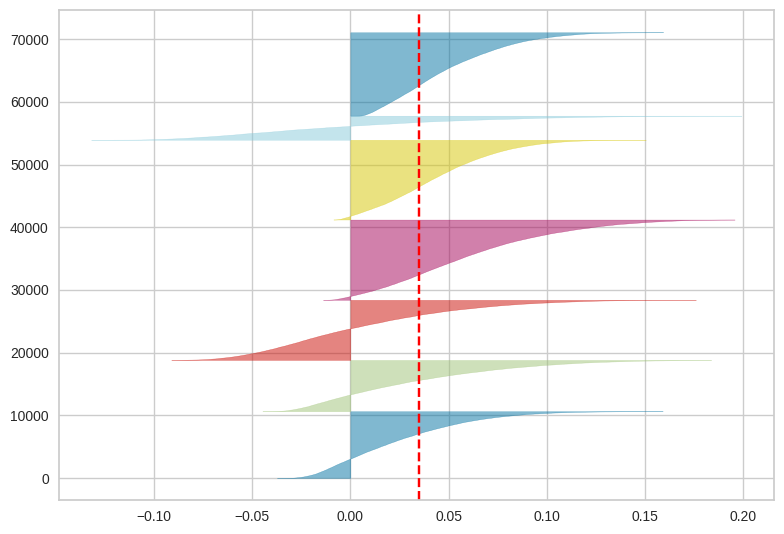


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:10:50
⏳ Duração da execução: 0:01:46.651107 (1.78 minutos)



In [80]:
# Código 76 - Manipulando o dataframe TS_PROFESSOR

# ===============================================================
# CONFIGURAÇÕES INICIAIS
# ===============================================================
diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")
os.makedirs(diretorio, exist_ok=True)

# ===============================================================
# PARÂMETROS DO MODELO
# ===============================================================
numero_clusters = 7
modelo_kmeans = KMeans(n_clusters=numero_clusters, random_state=42)

# Criando o visualizador de Silhueta
visualizador_silhueta = SilhouetteVisualizer(
    modelo_kmeans, colors='yellowbrick'
)

# Ajustando o visualizador ao conjunto de dados transformado pelo PCA
visualizador_silhueta.fit(X_PCA)

# ===============================================================
# GRÁFICO DA SILHUETA
# ===============================================================
# Tradução das legendas após a exibição
if hasattr(visualizador_silhueta, 'ax_'):
    visualizador_silhueta.ax_.set_title(
        f'Gráfico de Silhueta para Agrupamento KMeans com {len(X_PCA)} Amostras em {numero_clusters} Grupos',
        fontsize=12
    )
    visualizador_silhueta.ax_.set_xlabel('Valores do Coeficiente de Silhueta', fontsize=10)
    visualizador_silhueta.ax_.set_ylabel('Rótulo do Cluster', fontsize=10)
    visualizador_silhueta.ax_.legend(['Pontuação Média da Silhueta'], loc='upper right')

# Salvando o gráfico no diretório especificado
nome_arquivo = "grafico_silhueta.png"
caminho_salvamento = os.path.join(diretorio, nome_arquivo)

plt.tight_layout()
plt.savefig(caminho_salvamento, dpi=300)

# Exibindo o gráfico
plt.show()

### **Análise do Gráfico de Silhueta para 7 Clusters**

O gráfico de silhueta apresentado destaca a qualidade do agrupamento realizado pelo algoritmo **K-Means** com **7 clusters**. 

---

### **1. Distribuição Balanceada dos Clusters:**
- O gráfico exibe **7 clusters bem distribuídos**, indicando que o algoritmo conseguiu segmentar os dados em grupos distintos.
- A **variação no tamanho das faixas coloridas** sugere que o modelo foi capaz de identificar grupos com diferentes densidades e tamanhos, o que é esperado em dados reais.

---

### **2. Cluster Compactos e Definidos:**
- **Clusters 5 e 6** apresentam formatos mais compactos, sugerindo que esses grupos possuem pontos mais semelhantes entre si.
- A compactação observada nesses clusters é um indicativo de boa separação interna.

---

### **3. Pontuação Média Positiva:**
- A **linha vermelha pontilhada** posicionada acima de **0** indica que, na média, os pontos estão razoavelmente bem agrupados.
- Isso mostra que a maioria dos pontos está **mais próxima de seus próprios clusters** do que de clusters vizinhos.

---

### **4. Representação Visual Clara:**
- O gráfico permite identificar visualmente como os pontos estão agrupados, destacando a estrutura de cada cluster.
- **Cores distintas** ajudam na visualização e interpretação rápida dos resultados, tornando a análise mais acessível.

---

### **5. Suporte à Escolha de 7 Clusters:**
- O formato do gráfico sugere que o uso de **7 clusters** é uma **escolha válida** para este conjunto de dados, especialmente considerando a separação observada em alguns grupos.
- Essa validação é consistente com outras métricas já analisadas, como o método do cotovelo e o índice CH, que também apontaram **7 clusters** como ideais.

---

### **Conclusão:**
O gráfico de silhueta destaca a **eficácia do agrupamento em 7 clusters**, com grupos bem definidos e uma pontuação média positiva. Ele oferece uma base sólida para continuar a análise, explorar insights dentro de cada cluster e validar os resultados com outros métodos. 

In [81]:
# Código 77 - Manipulando o dataframe TS_PROFESSOR

print(dados_final.columns)

🕒 Execução iniciada em: 19-02-2025 02:10:50

----------------------------------------
Index(['ID_MUNICIPIO', 'ID_AREA', 'TX_RESP_Q005', 'TX_RESP_Q006',
       'TX_RESP_Q008_A', 'TX_RESP_Q008_B', 'TX_RESP_Q008_C', 'TX_RESP_Q008_D',
       'TX_RESP_Q012', 'TX_RESP_Q013', 'TX_RESP_Q014', 'TX_RESP_Q015',
       'TX_RESP_Q025', 'TX_RESP_Q026', 'TX_RESP_Q027', 'TX_RESP_Q028',
       'TX_RESP_Q029', 'TX_RESP_Q030', 'TX_RESP_Q031', 'TX_RESP_Q032',
       'TX_RESP_Q033', 'TX_RESP_Q034', 'TX_RESP_Q042', 'TX_RESP_Q043',
       'TX_RESP_Q044', 'TX_RESP_Q045', 'TX_RESP_Q046', 'TX_RESP_Q047',
       'TX_RESP_Q048', 'TX_RESP_Q049', 'TX_RESP_Q050', 'TX_RESP_Q051',
       'TX_RESP_Q059', 'TX_RESP_Q060', 'TX_RESP_Q109', 'TX_RESP_Q113',
       'TX_RESP_Q035', 'TX_RESP_Q036', 'TX_RESP_Q037', 'TX_RESP_Q038',
       'TX_RESP_Q039', 'TX_RESP_Q078', 'TX_RESP_Q079', 'TX_RESP_Q080',
       'TX_RESP_Q081', 'TX_RESP_Q082', 'TX_RESP_Q083', 'TX_RESP_Q084',
       'TX_RESP_Q085', 'TX_RESP_Q086', 'TX_RESP_Q087', 'TX_

## Exportando o dataframe para o formato do excel

In [83]:
# Código 78 - Manipulando o dataframe TS_PROFESSOR

# Diretório para salvar os arquivos
diretorio_exportacao = os.path.expanduser("~/Downloads/mono_francisco_jose/dados_exportados")

# Cria o diretório caso ele não exista
os.makedirs(diretorio_exportacao, exist_ok=True)

# Caminho do arquivo
caminho_arquivo_dados_final = os.path.join(diretorio_exportacao, "final.xlsx")

# Função para salvar o DataFrame em modo append ou criar um novo arquivo se necessário
def salvar_dataframe_em_excel(dataframe, caminho_arquivo, sheet_name):
    if os.path.exists(caminho_arquivo):
        # Abre em modo append se o arquivo já existir
        with pd.ExcelWriter(caminho_arquivo, mode='a', if_sheet_exists='overlay') as writer:
            dataframe.to_excel(writer, sheet_name=sheet_name)
    else:
        # Cria um novo arquivo se ele não existir
        with pd.ExcelWriter(caminho_arquivo, mode='w') as writer:
            dataframe.to_excel(writer, sheet_name=sheet_name)

    # Mensagem indicando que o arquivo foi salvo com sucesso
    print(f"Arquivo salvo com sucesso em: {caminho_arquivo}")

# Salvando o DataFrame 'dados_final' no arquivo especificado
salvar_dataframe_em_excel(dados_final, caminho_arquivo_dados_final, sheet_name='dados_final')

🕒 Execução iniciada em: 19-02-2025 02:11:04

----------------------------------------
Arquivo salvo com sucesso em: /home/francisco/Downloads/mono_francisco_jose/dados_exportados/final.xlsx

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:13:12
⏳ Duração da execução: 0:02:08.146295 (2.14 minutos)



---

## Verificando a quantidade de escolas em na capital e no interior de forma geral

🕒 Execução iniciada em: 19-02-2025 02:13:12

----------------------------------------

=== Contagem Total de Escolas por Localização ===
Interior: 61574 escolas
Capital: 9442 escolas


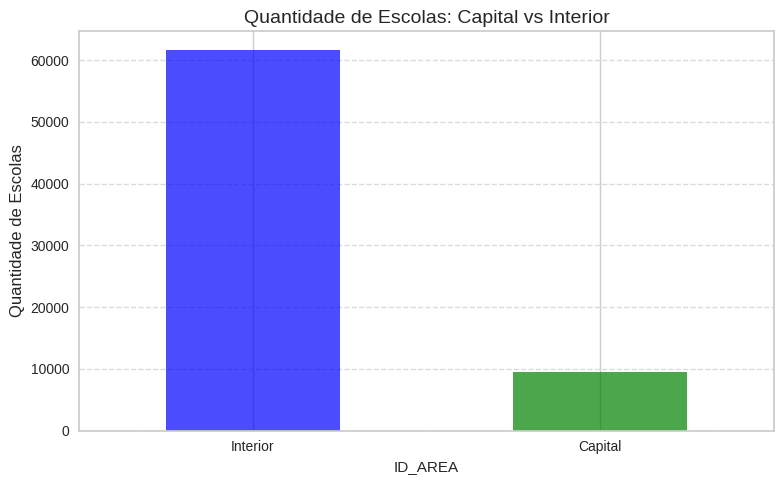


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:13:12
⏳ Duração da execução: 0:00:00.133516 (0.00 minutos)



In [84]:
# Código 79 - Manipulando o dataframe TS_PROFESSOR

# Certifique-se de que a coluna ID_AREA existe
if 'ID_AREA' not in dados_final.columns:
    raise ValueError("A coluna 'ID_AREA' não está no DataFrame.")

# Contando o número total de escolas por localização
contagem_localizacao = dados_final['ID_AREA'].value_counts()

# Exibindo os resultados
print("\n=== Contagem Total de Escolas por Localização ===")
print(f"Interior: {contagem_localizacao.get(0, 0)} escolas")
print(f"Capital: {contagem_localizacao.get(1, 0)} escolas")

# Gerando o gráfico
contagem_escolas = contagem_localizacao.rename({0: 'Interior', 1: 'Capital'})
plt.figure(figsize=(8, 5))
contagem_escolas.plot(kind='bar', color=['blue', 'green'], alpha=0.7)
plt.title('Quantidade de Escolas: Capital vs Interior', fontsize=14)
plt.ylabel('Quantidade de Escolas', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Verificando a quantidade de escolas em cada cluster


🕒 Execução iniciada em: 19-02-2025 02:13:18

----------------------------------------

Distribuição por localização (Capital vs Interior) dentro de cada cluster:
           Interior  Capital
Grupo2021                   
0              2964      878
1              8466     1302
2              9012     1153
3              9779     1029
4              9045     2010
5             13572     1603
6              8736     1467


<Figure size 1200x600 with 0 Axes>

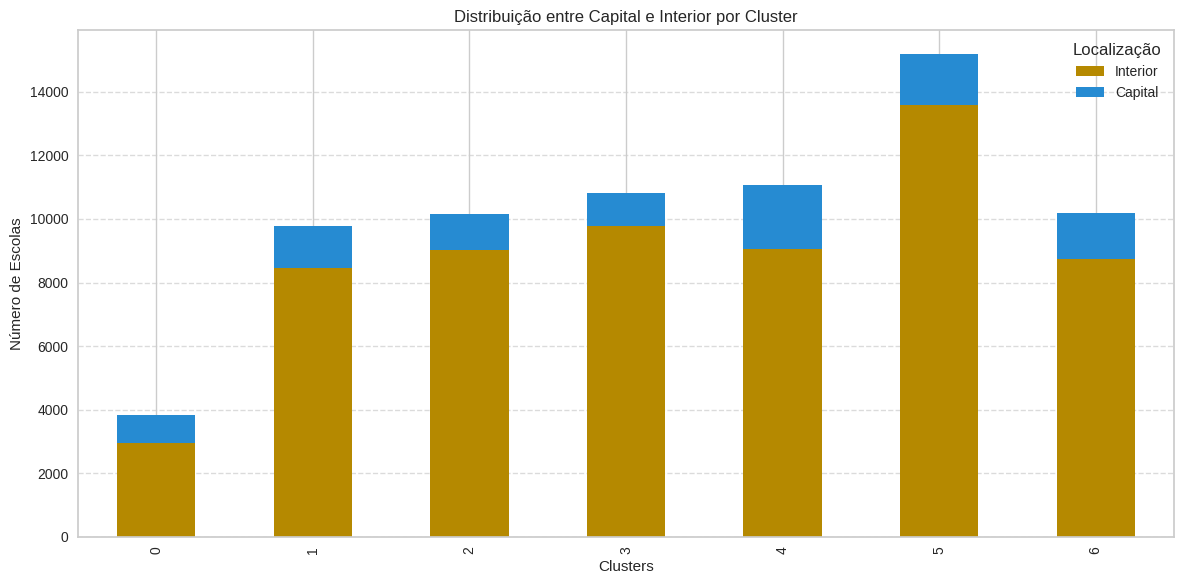


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:13:19
⏳ Duração da execução: 0:00:00.223643 (0.00 minutos)



In [85]:
# Código 80 - Manipulando o dataframe TS_PROFESSOR

# Agrupando os Dados por cluster e localização (capital ou interior)
distribuicao_localizacao = dados_final.groupby(['Grupo2021', 'ID_AREA']).size().unstack(fill_value=0)

# Renomeando as colunas para facilitar a compreensão
distribuicao_localizacao.columns = ['Interior', 'Capital']

# Exibindo a distribuição ajustada
print("\nDistribuição por localização (Capital vs Interior) dentro de cada cluster:")
print(distribuicao_localizacao)

# Plotando o gráfico atualizado
plt.figure(figsize=(12, 6))

# Criando o gráfico de barras empilhadas
distribuicao_localizacao.plot(
    kind='bar',
    stacked=True,
    color=['#b58900', '#268bd2'],  # Cores distintas para interior e capital
    figsize=(12, 6)
)

# Configurando o gráfico
plt.title("Distribuição entre Capital e Interior por Cluster")
plt.xlabel("Clusters")
plt.ylabel("Número de Escolas")
plt.legend(title="Localização", labels=['Interior', 'Capital'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


In [86]:
# Código 81 - Manipulando o dataframe TS_PROFESSOR

# Verificando se a coluna 'Grupo7' está presente
if 'Grupo7' not in dados_final.columns:
    raise ValueError("A coluna 'Grupo7' não foi encontrada no DataFrame 'dados_final'.")

# Contagem de observações por grupo
contagem_por_grupo = dados_final['Grupo7'].value_counts().sort_index()



🕒 Execução iniciada em: 19-02-2025 02:13:20

----------------------------------------

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:13:20
⏳ Duração da execução: 0:00:00.005511 (0.00 minutos)



🕒 Execução iniciada em: 19-02-2025 02:13:22

----------------------------------------


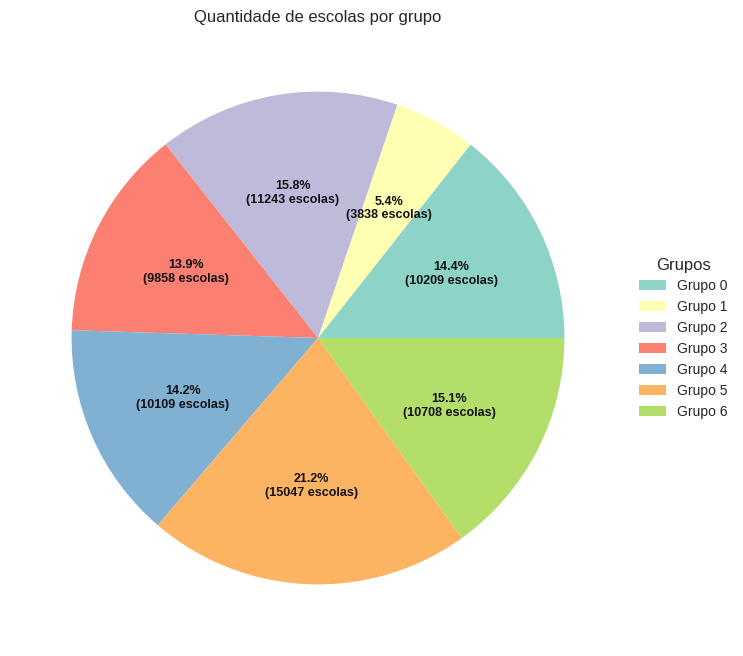


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:13:22
⏳ Duração da execução: 0:00:00.116759 (0.00 minutos)



In [87]:
# Código 82 - Manipulando o dataframe TS_PROFESSOR


# Preparando dados para o gráfico
grupos = contagem_por_grupo.index.tolist()  # Lista de grupos
quantidades = contagem_por_grupo.values.tolist()  # Lista de quantidades

# Criando figura e eixo do gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Função para exibir rótulos personalizados no gráfico de pizza
def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}%\n({:d} escolas)".format(pct, absolute)

# Criando o gráfico de pizza
wedges, texts, autotexts = ax.pie(
    quantidades,
    autopct=lambda pct: func(pct, quantidades),  # Exibe percentual e quantidade
    colors=plt.cm.Set3.colors,  # Colormap para cores variadas
    textprops=dict(color="k")   # Texto em preto para melhor contraste
)

# Adicionando uma legenda ao gráfico
ax.legend(
    wedges,
    [f"Grupo {g}" for g in grupos],  # Nomes dos grupos
    title="Grupos",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Ajustando o tamanho e estilo dos textos dos percentuais
plt.setp(autotexts, size=9, weight="bold")

# Adicionando título ao gráfico
ax.set_title("Quantidade de escolas por grupo")

# Exibindo o gráfico de pizza
plt.show()

🕒 Execução iniciada em: 19-02-2025 02:13:58

----------------------------------------

Distribuição de Escolas por Cluster e Área:
ID_AREA      0     1  Total
Grupo7                     
0         9059  1151  10210
1         2964   875   3839
2         9186  2058  11244
3         8552  1306   9858
4         8642  1468  10110
5        13476  1571  15047
6         9695  1013  10708
Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/grafico_pizza_cluster_0.png


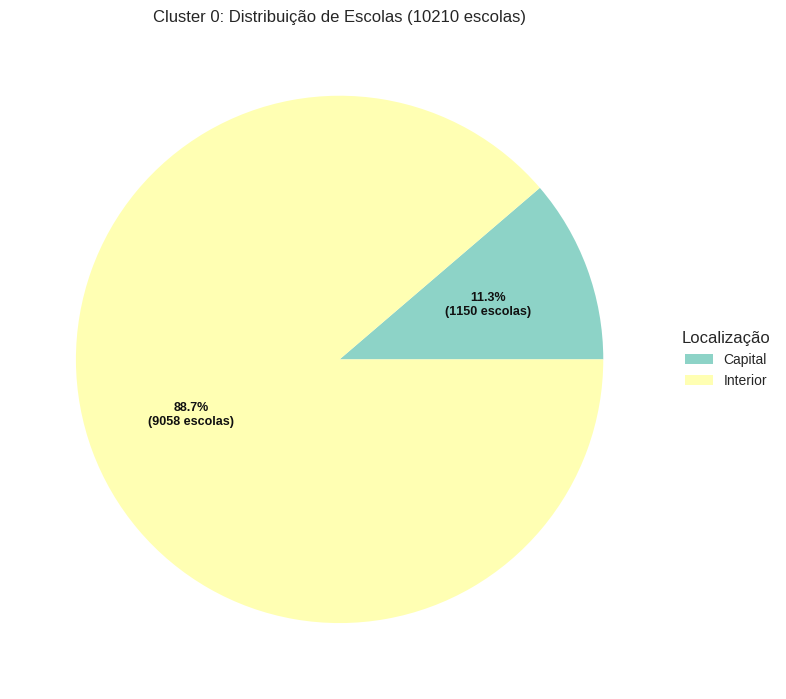

Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/grafico_pizza_cluster_1.png


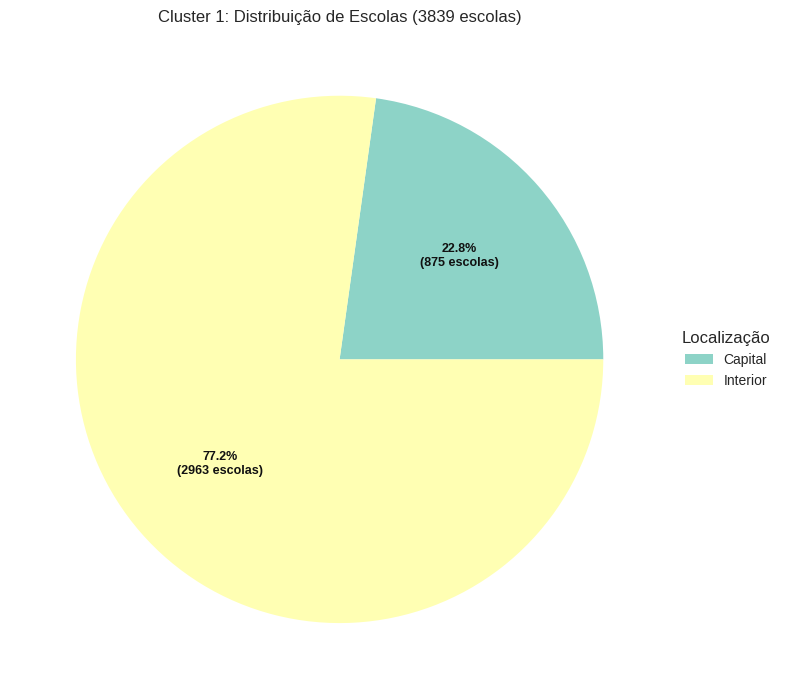

Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/grafico_pizza_cluster_2.png


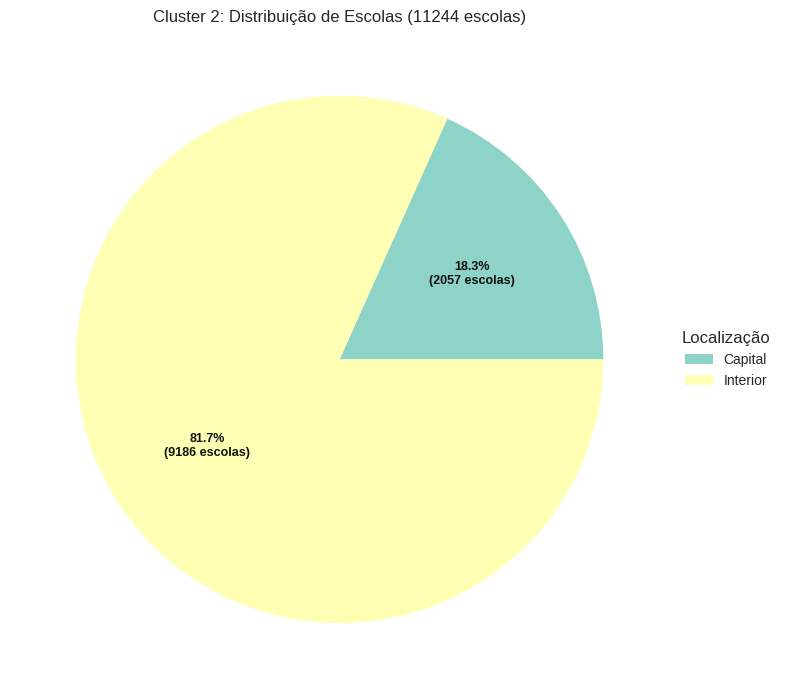

Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/grafico_pizza_cluster_3.png


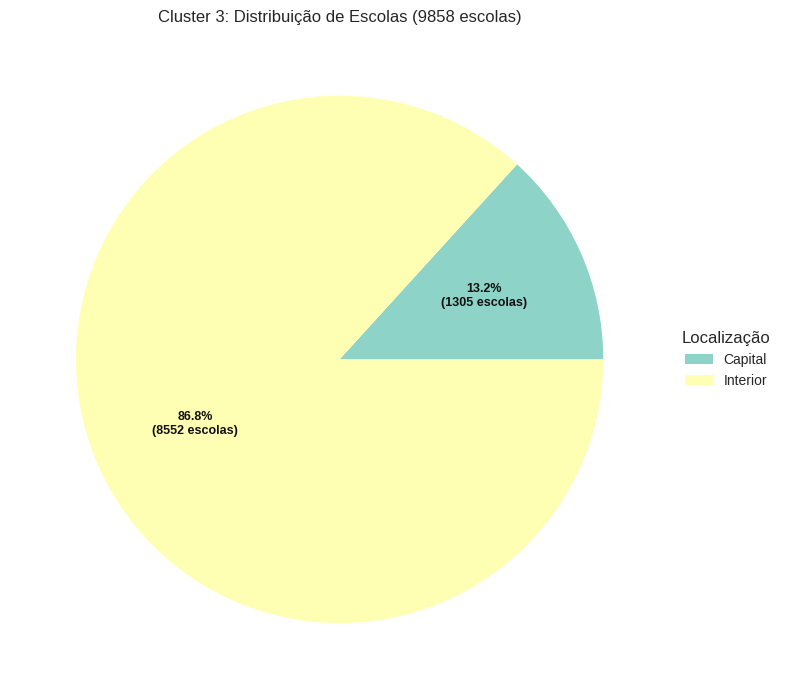

Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/grafico_pizza_cluster_4.png


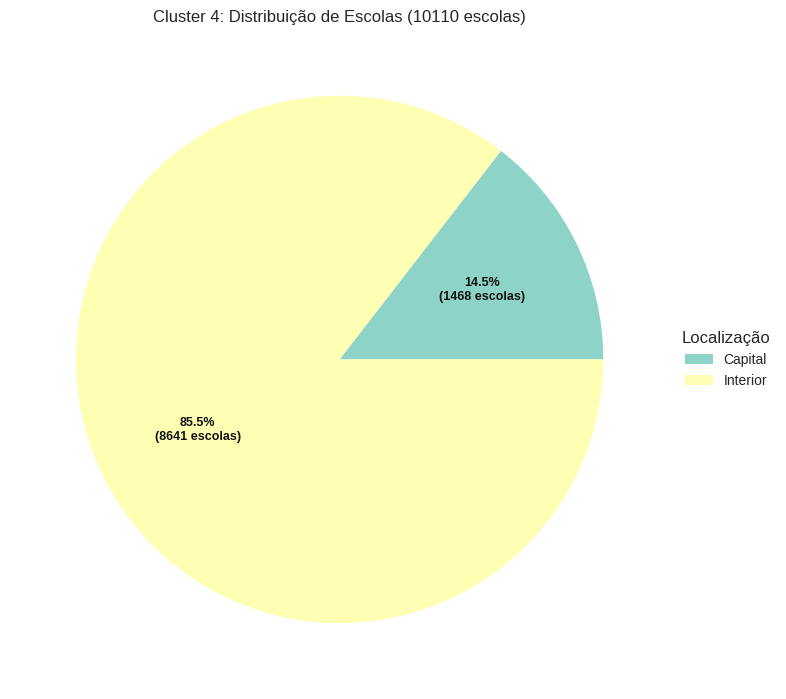

Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/grafico_pizza_cluster_5.png


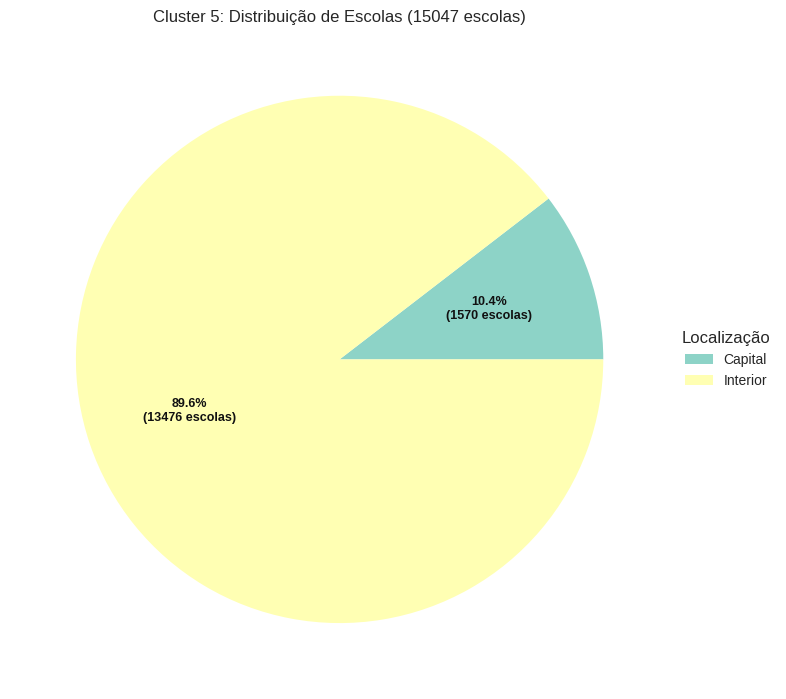

Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/grafico_pizza_cluster_6.png


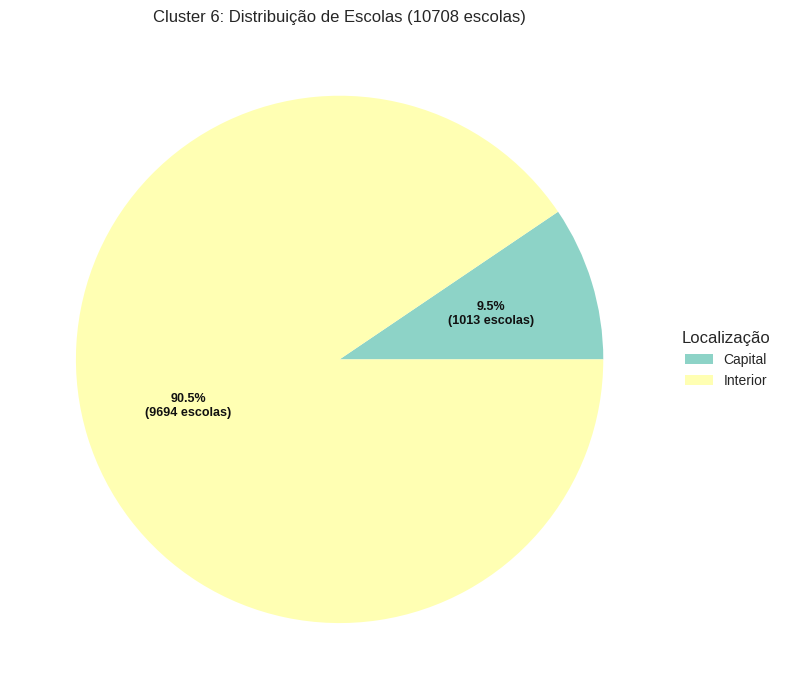


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:01
⏳ Duração da execução: 0:00:02.665651 (0.04 minutos)



In [88]:
# Código 83 - Manipulando o dataframe TS_PROFESSOR

# ===============================================================
# USANDO CÓPIAS DOS DADOS ORIGINAIS
# ===============================================================

# Cópia das escolas únicas, removendo duplicatas
escolas_unicas = dadosSaebCE[['ID_ESCOLA', 'ID_AREA']].drop_duplicates().copy()

# Cópia dos clusters associados às escolas
dados_clusters = dados_final[['Grupo7']].copy()

# Resetando o índice para garantir que 'ID_ESCOLA' não seja ambíguo
escolas_unicas = escolas_unicas.reset_index(drop=True)  # Remove índices antigos
dados_clusters = dados_clusters.reset_index()  # Traz o índice como coluna para mesclar

# Renomeando a coluna do índice como 'ID_ESCOLA' (para combinar com o outro DataFrame)
dados_clusters.rename(columns={'index': 'ID_ESCOLA'}, inplace=True)

# Combinando as cópias em um novo DataFrame para análise
dados_combinados = escolas_unicas.merge(dados_clusters, on='ID_ESCOLA', how='left').copy()

# ===============================================================
# CONTAGEM DE ESCOLAS POR CLUSTER E ÁREA
# ===============================================================

# Contagem por Cluster (Grupo7) e Área (ID_AREA)
contagem_area = dados_combinados.groupby(['Grupo7', 'ID_AREA']).size().unstack(fill_value=0).copy()

# Criando coluna total para cada cluster
contagem_area['Total'] = contagem_area.sum(axis=1)

# Exibindo os resultados
print("\nDistribuição de Escolas por Cluster e Área:")
print("=" * 40)
print(contagem_area)
print("=" * 40)

# ===============================================================
# GERANDO GRÁFICOS DE PIZZA SEPARADOS POR CLUSTER
# ===============================================================

# Configuração do diretório
diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")
os.makedirs(diretorio, exist_ok=True)

# Loop para criar um gráfico por cluster
for grupo in contagem_area.index:
    # Preparando os dados para o cluster atual
    capital = contagem_area.loc[grupo, 1]  # Escolas na Capital
    interior = contagem_area.loc[grupo, 0]  # Escolas no Interior
    total = contagem_area.loc[grupo, 'Total']  # Total de escolas

    # Criando a figura
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

    # Dados e rótulos
    labels = ['Capital', 'Interior']
    valores = [capital, interior]

    # Função para exibir rótulos personalizados
    def func(pct, allvals):
        absolute = int(pct / 100. * np.sum(allvals))
        return "{:.1f}%\n({:d} escolas)".format(pct, absolute)

    # Criando o gráfico de pizza
    wedges, texts, autotexts = ax.pie(
        valores,
        autopct=lambda pct: func(pct, valores),
        colors=plt.cm.Set3.colors,
        textprops=dict(color="k")
    )

    # Adicionando título ao gráfico
    ax.set_title(f"Cluster {grupo}: Distribuição de Escolas ({total} escolas)")

    # Adicionando legenda
    ax.legend(
        wedges,
        labels,
        title="Localização",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1)
    )

    # Ajustando textos
    plt.setp(autotexts, size=9, weight="bold")

    # ===============================================================
    # SALVANDO O GRÁFICO
    # ===============================================================

    # Nome do arquivo para cada cluster
    nome_arquivo = f"grafico_pizza_cluster_{grupo}.png"
    caminho_salvamento = os.path.join(diretorio, nome_arquivo)

    # Salvando o gráfico
    plt.tight_layout()
    plt.savefig(caminho_salvamento, dpi=300)

    # Mensagem de confirmação
    print(f"Imagem salva: {caminho_salvamento}")

    # Exibindo o gráfico
    plt.show()


🕒 Execução iniciada em: 19-02-2025 02:14:04

----------------------------------------


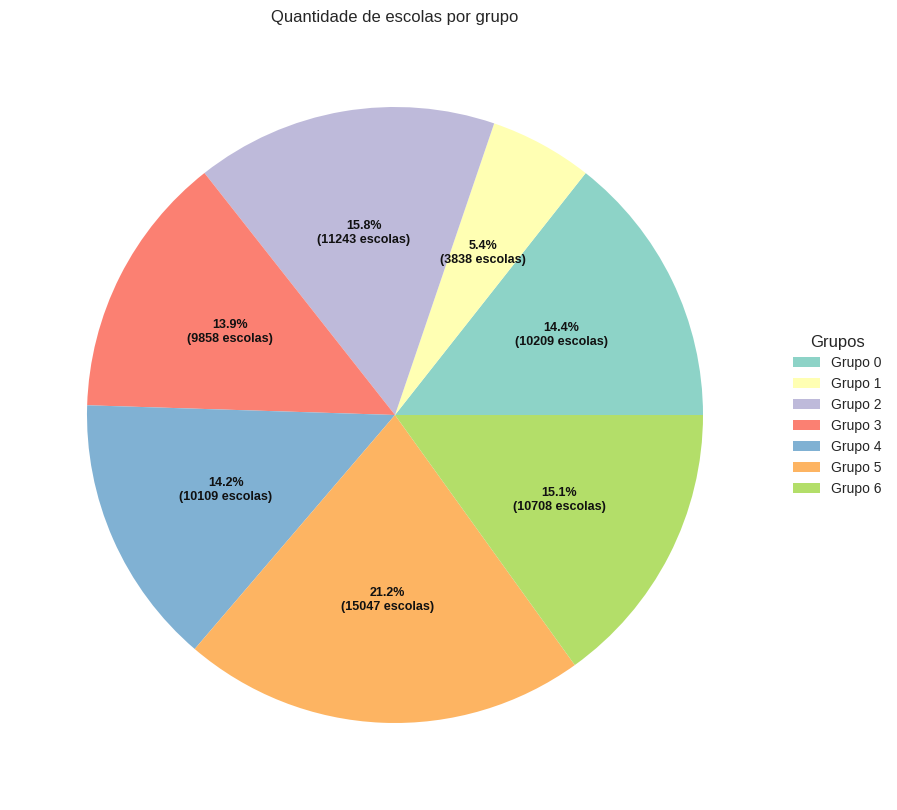


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:04
⏳ Duração da execução: 0:00:00.147460 (0.00 minutos)



In [89]:
# Código 84 - Manipulando o dataframe TS_PROFESSOR

# Agrupar os dados finais pelo grupo identificado (Grupo5) e contar o número de observações em cada grupo
contagem_por_grupo = dados_final.groupby('Grupo7')['Grupo7'].count()

# Preparando dados para o gráfico
grupos = contagem_por_grupo.index.tolist()  # Lista de grupos
quantidades = contagem_por_grupo.values.tolist()  # Lista de quantidades

# Criando figura e eixo do gráfico de pizza
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

# Função para exibir rótulos personalizados no gráfico de pizza
def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}%\n({:d} escolas)".format(pct, absolute)

# Criando o gráfico de pizza
wedges, texts, autotexts = ax.pie(
    quantidades,
    autopct=lambda pct: func(pct, quantidades),  # Exibe percentual e quantidade
    colors=plt.cm.Set3.colors,  # Colormap para cores variadas
    textprops=dict(color="k")   # Texto em preto para melhor contraste
)

# Adicionando uma legenda ao gráfico
ax.legend(
    wedges,
    [f"Grupo {g}" for g in grupos],  # Nomes dos grupos
    title="Grupos",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Ajustando o tamanho e estilo dos textos dos percentuais
plt.setp(autotexts, size=9, weight="bold")

# Adicionando título ao gráfico
ax.set_title("Quantidade de escolas por grupo")

# Exibindo o gráfico de pizza
plt.show()

## Gerando o gráfico de pizza com os valores iguais ao gráfico de colunas empilhadas

🕒 Execução iniciada em: 19-02-2025 02:14:05

----------------------------------------

Distribuição por localização (Capital vs Interior) dentro de cada cluster:
           Interior  Capital
Grupo2021                   
0              2964      878
1              8466     1302
2              9012     1153
3              9779     1029
4              9045     2010
5             13572     1603
6              8736     1467
Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/grafico_pizza_clusters_final.png


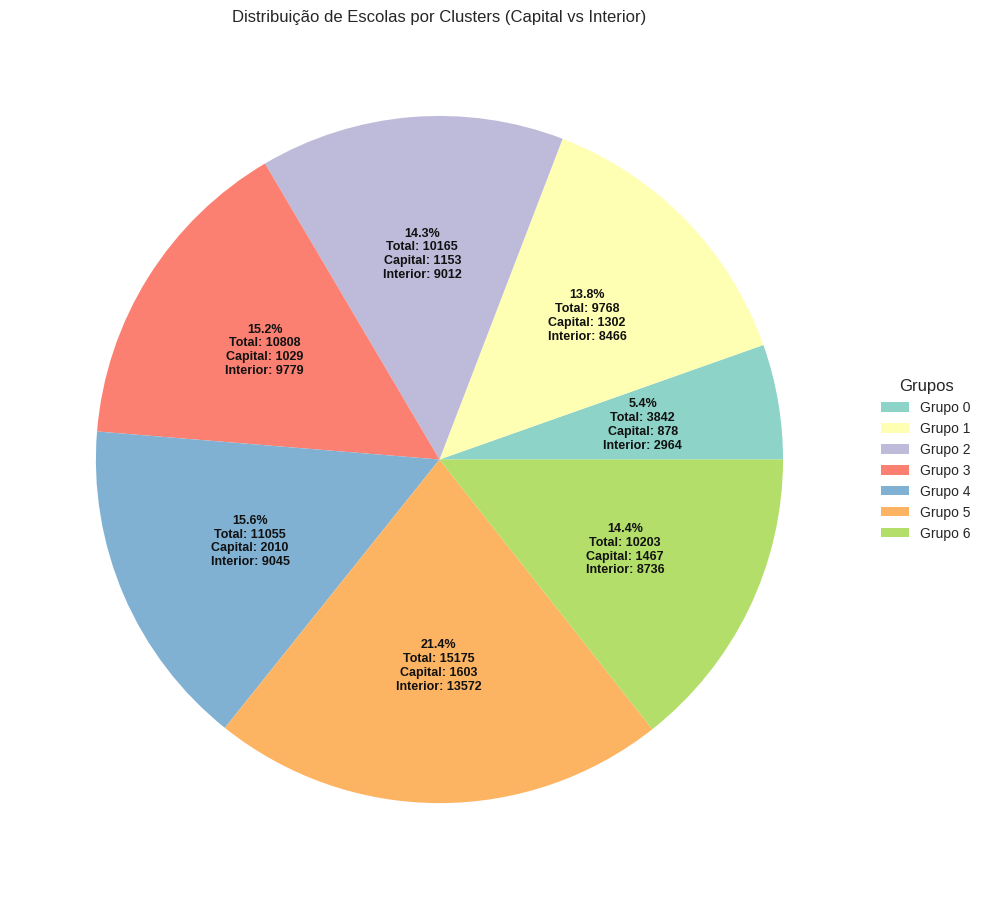


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:06
⏳ Duração da execução: 0:00:00.603127 (0.01 minutos)



In [90]:
# Código 85 - Manipulando o dataframe TS_PROFESSOR

# ===============================================================
# 1) AGRUPAMENTO E DISTRIBUIÇÃO DE LOCALIZAÇÃO
# ===============================================================

# Agrupando por cluster e localidade (Capital e Interior)
distribuicao_localizacao = dados_final.groupby(['Grupo2021', 'ID_AREA']).size().unstack(fill_value=0)

# Renomeando as colunas para facilitar a compreensão
distribuicao_localizacao.columns = ['Interior', 'Capital']

# Exibindo a tabela calculada
print("\nDistribuição por localização (Capital vs Interior) dentro de cada cluster:")
print(distribuicao_localizacao)

# ===============================================================
# 2) GRÁFICO DE PIZZA
# ===============================================================
# Preparando os dados para o gráfico
grupos = distribuicao_localizacao.index.tolist()  # Clusters
interior = distribuicao_localizacao['Interior'].tolist()  # Interior
capital = distribuicao_localizacao['Capital'].tolist()  # Capital

# Calculando o total por cluster
totais = [i + c for i, c in zip(interior, capital)]

# Criando a figura de pizza
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

def func_label(pct, idx):
    """Exibe os detalhes dentro de cada fatia."""
    total_abs = totais[idx]
    return (
        f"{pct:.1f}%\n"
        f"Total: {total_abs}\n"
        f"Capital: {capital[idx]}\n"
        f"Interior: {interior[idx]}"
    )

# Iterador para os índices
i_fatia = iter(range(len(grupos)))

# Criando o gráfico
wedges, texts, autotexts = ax.pie(
    totais,
    autopct=lambda pct: func_label(pct, next(i_fatia)),
    colors=plt.cm.Set3.colors,  # Paleta de cores
    textprops=dict(color="k")  # Texto preto para contraste
)

# Adicionando legenda
ax.legend(
    wedges,
    [f"Grupo {g}" for g in grupos],
    title="Grupos",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Ajustando estilos
plt.setp(autotexts, size=9, weight="bold")

# Título do gráfico
ax.set_title("Distribuição de Escolas por Clusters (Capital vs Interior)")

# Salvando o gráfico
diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")
os.makedirs(diretorio, exist_ok=True)
nome_arquivo = "grafico_pizza_clusters_final.png"
caminho_salvamento = os.path.join(diretorio, nome_arquivo)

plt.tight_layout()
plt.savefig(caminho_salvamento, dpi=300)
print(f"Imagem salva: {caminho_salvamento}")

# Exibindo o gráfico
plt.show()


🕒 Execução iniciada em: 19-02-2025 02:14:07

----------------------------------------

Verificando os dados de cada cluster:
Grupo 0: Total = 10210, Capital = 1151, Interior = 9059
Grupo 1: Total = 3839, Capital = 875, Interior = 2964
Grupo 2: Total = 11244, Capital = 2058, Interior = 9186
Grupo 3: Total = 9858, Capital = 1306, Interior = 8552
Grupo 4: Total = 10110, Capital = 1468, Interior = 8642
Grupo 5: Total = 15047, Capital = 1571, Interior = 13476
Grupo 6: Total = 10708, Capital = 1013, Interior = 9695


Imagem salva: /home/francisco/Downloads/mono_francisco_jose/imagens/grafico_pizza_clusters_validado.png


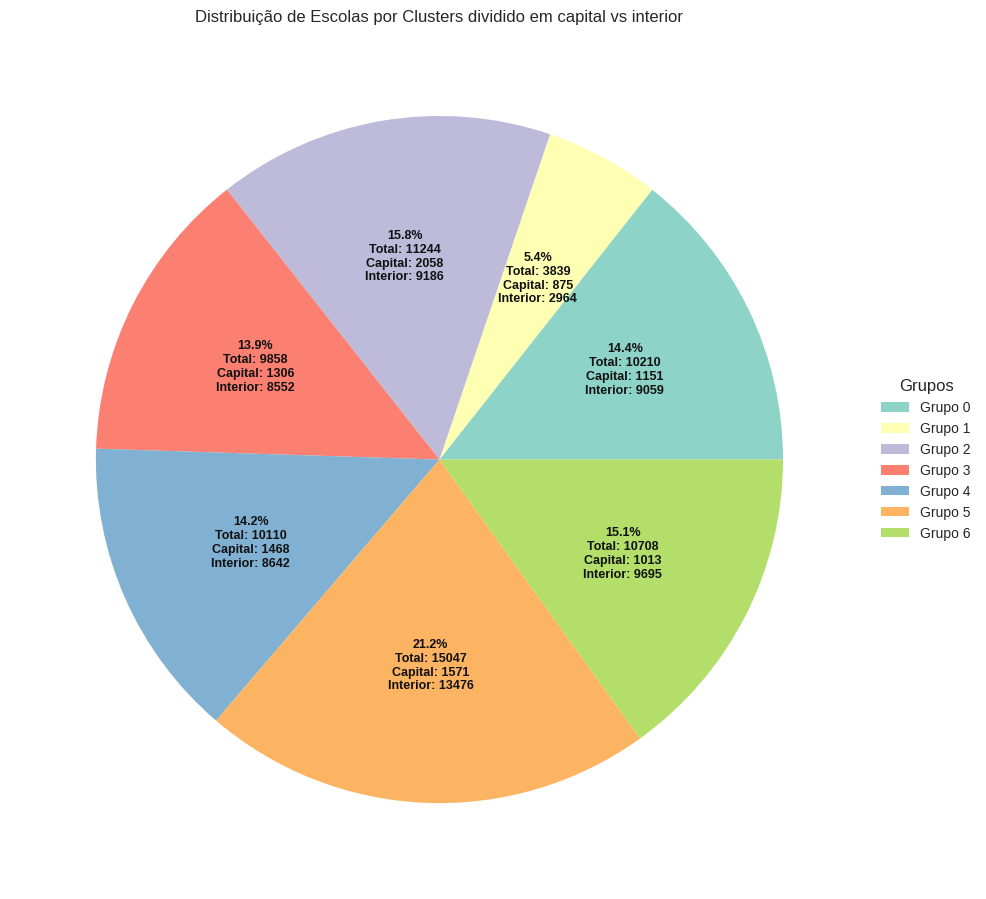


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:08
⏳ Duração da execução: 0:00:00.608768 (0.01 minutos)



In [91]:
# Código 86 - Manipulando o dataframe TS_PROFESSOR

# ===============================================================
# PREPARAÇÃO DOS DADOS (CÓPIAS)
# ===============================================================

# Cópias para garantir a preservação dos dados originais
dados_escolas_copia = escolas_unicas.copy()
dados_clusters_copia = dados_clusters.copy()

# Combinando as cópias em um novo DataFrame
dados_combinados = dados_escolas_copia.merge(
    dados_clusters_copia,
    on='ID_ESCOLA',
    how='left'
).copy()

# ===============================================================
# CONTAGEM DE ESCOLAS POR CLUSTER E ÁREA
# ===============================================================

# Agrupando os dados por cluster e área
contagem_area = dados_combinados.groupby(['Grupo7', 'ID_AREA']).size().unstack(fill_value=0).copy()

# Adicionando o total por cluster
contagem_area['Total'] = contagem_area.sum(axis=1)

# ===============================================================
# VERIFICAÇÃO DOS DADOS
# ===============================================================

print("\nVerificando os dados de cada cluster:")
for grupo in contagem_area.index:
    total = contagem_area.loc[grupo, 'Total']
    capital = contagem_area.loc[grupo, 1] if 1 in contagem_area.columns else 0
    interior = contagem_area.loc[grupo, 0] if 0 in contagem_area.columns else 0

    # Impressão para conferir os valores antes de usar no gráfico
    print(f"Grupo {grupo}: Total = {total}, Capital = {capital}, Interior = {interior}")

    # Checando se os valores são consistentes
    if total != (capital + interior):
        raise ValueError(f"Inconsistência nos dados do Grupo {grupo}: Total {total} ≠ Capital {capital} + Interior {interior}")

print("============================================")

print("\n")

# ===============================================================
# PREPARAÇÃO PARA O GRÁFICO DE PIZZA
# ===============================================================

grupos = contagem_area.index.tolist()  # Grupos (clusters)
totais = contagem_area['Total'].tolist()  # Total de escolas
capital = contagem_area[1].tolist() if 1 in contagem_area.columns else [0] * len(grupos)
interior = contagem_area[0].tolist() if 0 in contagem_area.columns else [0] * len(grupos)

# ===============================================================
# CRIAÇÃO DO GRÁFICO DE PIZZA
# ===============================================================

# Criando a figura
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

# Função para exibir os rótulos personalizados
def func(pct, totais, capital, interior, index):
    total = int(pct / 100. * sum(totais))  # Valor total
    return f"{pct:.1f}%\nTotal: {totais[index]}\nCapital: {capital[index]}\nInterior: {interior[index]}"

# Criando o gráfico de pizza
wedges, texts, autotexts = ax.pie(
    totais,
    autopct=lambda pct, i=iter(range(len(totais))): func(pct, totais, capital, interior, next(i)),
    colors=plt.cm.Set3.colors,
    textprops=dict(color="k")
)

# Adicionando legenda
ax.legend(
    wedges,
    [f"Grupo {g}" for g in grupos],
    title="Grupos",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Ajustando estilo dos textos
plt.setp(autotexts, size=9, weight="bold")

# Adicionando título ao gráfico
ax.set_title("Distribuição de Escolas por Clusters dividido em capital vs interior")

# ===============================================================
# SALVANDO O GRÁFICO
# ===============================================================

# Configuração do diretório
diretorio = os.path.expanduser("~/Downloads/mono_francisco_jose/imagens")
os.makedirs(diretorio, exist_ok=True)

# Nome do arquivo
nome_arquivo = "grafico_pizza_clusters_validado.png"
caminho_salvamento = os.path.join(diretorio, nome_arquivo)

# Salvando o gráfico
plt.tight_layout()
plt.savefig(caminho_salvamento, dpi=300)

# Mensagem de confirmação
print(f"Imagem salva: {caminho_salvamento}")

# Exibindo o gráfico
plt.show()


🕒 Execução iniciada em: 19-02-2025 02:14:09

----------------------------------------


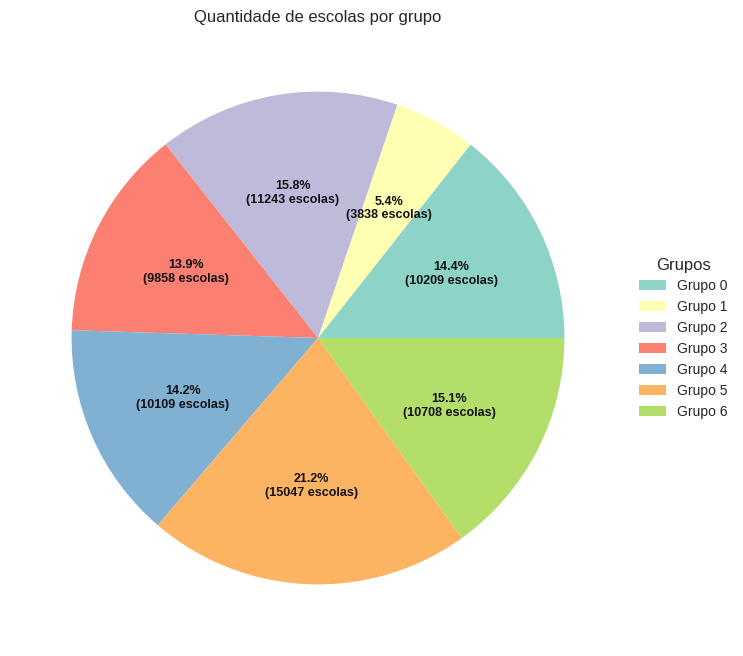


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:09
⏳ Duração da execução: 0:00:00.098655 (0.00 minutos)



In [92]:
# Código 87 - Manipulando o dataframe TS_PROFESSOR

# Preparando dados para o gráfico
grupos = contagem_por_grupo.index.tolist()  # Lista de grupos
quantidades = contagem_por_grupo.values.tolist()  # Lista de quantidades

# Criando figura e eixo do gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Função para exibir rótulos personalizados no gráfico de pizza
def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}%\n({:d} escolas)".format(pct, absolute)

# Criando o gráfico de pizza
wedges, texts, autotexts = ax.pie(
    quantidades,
    autopct=lambda pct: func(pct, quantidades),  # Exibe percentual e quantidade
    colors=plt.cm.Set3.colors,  # Colormap para cores variadas
    textprops=dict(color="k")   # Texto em preto para melhor contraste
)

# Adicionando uma legenda ao gráfico
ax.legend(
    wedges,
    [f"Grupo {g}" for g in grupos],  # Nomes dos grupos
    title="Grupos",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Ajustando o tamanho e estilo dos textos dos percentuais
plt.setp(autotexts, size=9, weight="bold")

# Adicionando título ao gráfico
ax.set_title("Quantidade de escolas por grupo")

# Exibindo o gráfico de pizza
plt.show()

---

# Preparação dos Dados para o DEA

In [93]:
# Código 88 - Manipulando o dataframe TS_PROFESSOR

# Definir dinamicamente o número total de clusters para o contexto do trabalho
n_clusters = 7  # Total de clusters gerados no trabalho de 2021

cluster_interesse = 6  # Escolha o cluster de interesse (de 0 a n_clusters - 1)

# Verificar se o cluster de interesse está dentro do intervalo válido
if cluster_interesse in range(n_clusters):
    # Filtrar as escolas pertencentes ao cluster selecionado
    dados_DEA = dados_final[dados_final['Grupo7'] == cluster_interesse][['Grupo7']]
    
    # Exibir informações gerais sobre o cluster
    print(f"Analisando o cluster {cluster_interesse}:")
    print(f"Total de escolas no cluster: {dados_DEA.shape[0]} escolas")
    
    # Exibir as primeiras linhas do DataFrame filtrado
    print("\nExemplo de escolas nesse cluster:")
    print(dados_DEA.head())

    # Exibir percentuais de escolas no cluster em relação ao total
    total_escolas = dados_final.shape[0]
    percentual = (dados_DEA.shape[0] / total_escolas) * 100
    print(f"\nO cluster {cluster_interesse} representa {percentual:.2f}% do total de escolas.\n")
else:
    print(f"Cluster {cluster_interesse} é inválido. Escolha um número entre 0 e {n_clusters - 1}.")


🕒 Execução iniciada em: 19-02-2025 02:14:11

----------------------------------------
Analisando o cluster 6:
Total de escolas no cluster: 10708 escolas

Exemplo de escolas nesse cluster:
           Grupo7
ID_ESCOLA        
61323672        6
61323675        6
61323677        6
61323705        6
61323715        6

O cluster 6 representa 15.08% do total de escolas.


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:11
⏳ Duração da execução: 0:00:00.010461 (0.00 minutos)



In [94]:
# Código 89 - Manipulando o dataframe TS_PROFESSOR

# Verificando se a coluna 'Grupo7' está presente e removendo-a caso não seja mais necessária
if 'Grupo7' in dados_DEA.columns:
    dados_DEA = dados_DEA.drop(columns=['Grupo7'])
    print("Coluna 'Grupo7' removida com sucesso, pois não é mais necessária no contexto.")
else:
    print("Coluna 'Grupo7' já não está presente no DataFrame.")

# Exibindo as primeiras linhas do DataFrame ajustado
dados_DEA.head()


🕒 Execução iniciada em: 19-02-2025 02:14:15

----------------------------------------
Coluna 'Grupo7' removida com sucesso, pois não é mais necessária no contexto.


""
ID_ESCOLA
61323672
61323675
61323677
61323705
61323715



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:15
⏳ Duração da execução: 0:00:00.006917 (0.00 minutos)



In [95]:
# Código 90 - Manipulando o dataframe TS_PROFESSOR

# Diretório para salvar os arquivos
diretorio_exportacao = os.path.expanduser("~/Downloads/mono_francisco_jose/dados_exportados")

# Cria o diretório caso ele não exista
os.makedirs(diretorio_exportacao, exist_ok=True)

# Caminho do arquivo para salvar o DataFrame
caminho_arquivo_dea = os.path.join(diretorio_exportacao, "dados_DEA.xlsx")

# Função para salvar o DataFrame em modo append ou criar um novo arquivo se necessário
def salvar_dataframe_em_excel(dataframe, caminho_arquivo, sheet_name):
    if os.path.exists(caminho_arquivo):
        # Abre em modo append se o arquivo já existir
        with pd.ExcelWriter(caminho_arquivo, mode='a', if_sheet_exists='overlay', engine='openpyxl') as writer:
            dataframe.to_excel(writer, sheet_name=sheet_name, index=False)
    else:
        # Cria um novo arquivo se ele não existir
        with pd.ExcelWriter(caminho_arquivo, mode='w', engine='openpyxl') as writer:
            dataframe.to_excel(writer, sheet_name=sheet_name, index=False)

# Salvando o DataFrame no arquivo especificado
salvar_dataframe_em_excel(dados_DEA, caminho_arquivo_dea, sheet_name='dados_DEA')

# Mensagem de sucesso
print(f"Arquivo 'dados_DEA.xlsx' salvo com sucesso no diretório: {diretorio_exportacao}")


🕒 Execução iniciada em: 19-02-2025 02:14:16

----------------------------------------
Arquivo 'dados_DEA.xlsx' salvo com sucesso no diretório: /home/francisco/Downloads/mono_francisco_jose/dados_exportados

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:16
⏳ Duração da execução: 0:00:00.069977 (0.00 minutos)



# Fim da análise do dataframe "Professor_TS"

---

> A aplicação do DEA será ao final da análise do segundo dataframe, o TS_ESCOLA.

# Parte 2 - Trabalhando com a base de Dados da escolta (TS_ESCOLA)

## As seguintes colunas serão descartadas da base TS_ESCOLA:

| **Colunas descartadas em 2019** | **Colunas descartadas em 2021** | 
| --- | --- |
| ID_AREA | ID_AREA |
| ID_ESCOLA | ID_ESCOLA |
| ID_LOCALIZACAO | ID_LOCALIZACAO |
| ID_MUNICIPIO | ID_MUNICIPIO |
| ID_REGIAO | ID_REGIAO |
| ID_SAEB | ID_SAEB |
| ID_UF | ID_UF |
| IN_PUBLICA | IN_PUBLICA |
| MEDIA_5EF_LP | MEDIA_5EF_LP |
| MEDIA_5EF_MT | MEDIA_5EF_MT |
| MEDIA_9EF_LP | MEDIA_9EF_LP |
| MEDIA_9EF_MT | MEDIA_9EF_MT |
| MEDIA_EM_LP | MEDIA_EM_LP |
| MEDIA_EM_MT | MEDIA_EM_MT |
| MEDIA_EMI_LP | MEDIA_EMI_LP |
| MEDIA_EMI_MT | MEDIA_EMI_MT |
| MEDIA_EMT_LP | MEDIA_EMT_LP |
| MEDIA_EMT_MT | MEDIA_EMT_MT |
| NIVEL_0_LP5 | NIVEL_0_LP5 |
| NIVEL_0_LP9 | NIVEL_0_LP9 |
| NIVEL_0_LPEM | NIVEL_0_LPEM |
| NIVEL_0_LPEMI | NIVEL_0_LPEMI |
| NIVEL_0_LPEMT | NIVEL_0_LPEMT |
| NIVEL_0_MT5 | NIVEL_0_MT5 |
| NIVEL_0_MT9 | NIVEL_0_MT9 |
| NIVEL_0_MTEM | NIVEL_0_MTEM |
| NIVEL_0_MTEMI | NIVEL_0_MTEMI |
| NIVEL_0_MTEMT | NIVEL_0_MTEMT |
| NIVEL_1_LP5 | NIVEL_1_LP5 |
| NIVEL_1_LP9 | NIVEL_1_LP9 |
| NIVEL_1_LPEM | NIVEL_1_LPEM |
| NIVEL_1_LPEMI | NIVEL_1_LPEMI |
| NIVEL_1_LPEMT | NIVEL_1_LPEMT |
| NIVEL_1_MT5 | NIVEL_1_MT5 |
| NIVEL_1_MT9 | NIVEL_1_MT9 |
| NIVEL_1_MTEM | NIVEL_1_MTEM |
| NIVEL_1_MTEMI | NIVEL_1_MTEMI |
| NIVEL_1_MTEMT | NIVEL_1_MTEMT |
| NIVEL_10_MT5 | NIVEL_10_MT5 |
| NIVEL_10_MTEM | NIVEL_10_MTEM |
| NIVEL_10_MTEMI | NIVEL_10_MTEMI |
| NIVEL_10_MTEMT | NIVEL_10_MTEMT |
| NIVEL_2_LP5 | NIVEL_2_LP5 |
| NIVEL_2_LP9 | NIVEL_2_LP9 |
| NIVEL_2_LPEM | NIVEL_2_LPEM |
| NIVEL_2_LPEMI | NIVEL_2_LPEMI |
| NIVEL_2_LPEMT | NIVEL_2_LPEMT |
| NIVEL_2_MT5 | NIVEL_2_MT5 |
| NIVEL_2_MT9 | NIVEL_2_MT9 |
| NIVEL_2_MTEM | NIVEL_2_MTEM |
| NIVEL_2_MTEMI | NIVEL_2_MTEMI |
| NIVEL_2_MTEMT | NIVEL_2_MTEMT |
| NIVEL_3_LP5 | NIVEL_3_LP5 |
| NIVEL_3_LP9 | NIVEL_3_LP9 |
| NIVEL_3_LPEM | NIVEL_3_LPEM |
| NIVEL_3_LPEMI | NIVEL_3_LPEMI |
| NIVEL_3_LPEMT | NIVEL_3_LPEMT |
| NIVEL_3_MT5 | NIVEL_3_MT5 |
| NIVEL_3_MT9 | NIVEL_3_MT9 |
| NIVEL_3_MTEM | NIVEL_3_MTEM |
| NIVEL_3_MTEMI | NIVEL_3_MTEMI |
| NIVEL_3_MTEMT | NIVEL_3_MTEMT |
| NIVEL_4_LP5 | NIVEL_4_LP5 |
| NIVEL_4_LP9 | NIVEL_4_LP9 |
| NIVEL_4_LPEM | NIVEL_4_LPEM |
| NIVEL_4_LPEMI | NIVEL_4_LPEMI |
| NIVEL_4_LPEMT | NIVEL_4_LPEMT |
| NIVEL_4_MT5 | NIVEL_4_MT5 |
| NIVEL_4_MT9 | NIVEL_4_MT9 |
| NIVEL_4_MTEM | NIVEL_4_MTEM |
| NIVEL_4_MTEMI | NIVEL_4_MTEMI |
| NIVEL_4_MTEMT | NIVEL_4_MTEMT |
| NIVEL_5_LP5 | NIVEL_5_LP5 |
| NIVEL_5_LP9 | NIVEL_5_LP9 |
| NIVEL_5_LPEM | NIVEL_5_LPEM |
| NIVEL_5_LPEMI | NIVEL_5_LPEMI |
| NIVEL_5_LPEMT | NIVEL_5_LPEMT |
| NIVEL_5_MT5 | NIVEL_5_MT5 |
| NIVEL_5_MT9 | NIVEL_5_MT9 |
| NIVEL_5_MTEM | NIVEL_5_MTEM |
| NIVEL_5_MTEMI | NIVEL_5_MTEMI |
| NIVEL_5_MTEMT | NIVEL_5_MTEMT |
| NIVEL_6_LP5 | NIVEL_6_LP5 |
| NIVEL_6_LP9 | NIVEL_6_LP9 |
| NIVEL_6_LPEM | NIVEL_6_LPEM |
| NIVEL_6_LPEMI | NIVEL_6_LPEMI |
| NIVEL_6_LPEMT | NIVEL_6_LPEMT |
| NIVEL_6_MT5 | NIVEL_6_MT5 |
| NIVEL_6_MT9 | NIVEL_6_MT9 |

## Abrindo o dataframe TS_ESCOLA
---

In [96]:
# Código 01 - Manipulando o dataframe TS_ESCOLA


# Caminho do arquivo CSV original
caminho_arquivo = os.path.join(os.getcwd(), "TS_ESCOLA.parquet")

# Tentativa de abrir e converter o arquivo
try:
    # Ler o CSV e armazenar na mesma variável
    dadosSaebEscola = pd.read_parquet(caminho_arquivo)

    print(f"✅ Arquivo carregado com sucesso\n")

except FileNotFoundError:
    print("❌ Erro: O arquivo não foi encontrado. Verifique se o caminho está correto.")
except pd.errors.EmptyDataError:
    print("❌ Erro: O arquivo está vazio. Verifique o conteúdo.")
except pd.errors.ParserError:
    print("❌Erro: O arquivo não pôde ser lido. Verifique o formato ou o delimitador.")
except Exception as e:
    print(f"⚠️ Ocorreu um erro inesperado: {e}")


🕒 Execução iniciada em: 19-02-2025 02:14:45

----------------------------------------
✅ Arquivo carregado com sucesso


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:45
⏳ Duração da execução: 0:00:00.065336 (0.00 minutos)



In [97]:
# Código 02 - Manipulando o dataframe TS_ESCOLA

# Exibindo as primeiras linhas do DataFrame para verificar se os Dados foram carregados corretamente
dadosSaebEscola.head()

🕒 Execução iniciada em: 19-02-2025 02:14:45

----------------------------------------


,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,IN_PUBLICA,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,PC_FORMACAO_DOCENTE_FINAL,...,MEDIA_5EF_LP,MEDIA_5EF_MT,MEDIA_9EF_LP,MEDIA_9EF_MT,MEDIA_EMT_LP,MEDIA_EMT_MT,MEDIA_EMI_LP,MEDIA_EMI_MT,MEDIA_EM_LP,MEDIA_EM_MT
0,2021,1,11,6316600,2,61324549,1,1,100.0,51.1,...,157.99,168.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,1,11,6316600,2,61335087,1,1,92.5,63.9,...,NaN,NaN,255.49,254.43,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,1,11,6316600,2,61336597,1,2,100.0,56.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,1,11,6316600,2,61342611,1,1,100.0,53.6,...,206.92,216.53,NaN,NaN,250.12,246.73,NaN,NaN,250.12,246.73
4,2021,1,11,6316600,2,61363380,1,1,87.5,26.9,...,170.73,169.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:45
⏳ Duração da execução: 0:00:00.018170 (0.00 minutos)



In [98]:
# Código 03 - Manipulando o dataframe TS_ESCOLA

"""
O método describe() gera estatísticas descritivas do DataFrame.

Ele fornece um resumo estatístico para colunas numéricas, incluindo:
- count: número de valores não nulos
- mean: média dos valores
- std: desvio padrão (dispersão dos Dados)
- min: valor mínimo
- 25%: primeiro quartil (25% dos Dados abaixo deste valor)
- 50%: mediana ou segundo quartil (50% dos Dados abaixo deste valor)
- 75%: terceiro quartil (75% dos Dados abaixo deste valor)
- max: valor máximo

Para colunas categóricas, retorna:
- count: número de valores não nulos
- unique: número de valores únicos
- top: valor mais frequente
- freq: frequência do valor mais frequente
"""

# Gerando as estatísticas descritivas do DataFrame 'dadosSaeb'
descricao = dadosSaebEscola.describe(include='all')

# Renomeando as estatísticas para o português
descricao.rename(index={
    'count': 'Contagem',
    'mean': 'Média',
    'std': 'Desvio Padrão',
    'min': 'Valor Mínimo',
    '25%': '1º Quartil (25%)',
    '50%': 'Mediana (50%)',
    '75%': '3º Quartil (75%)',
    'max': 'Valor Máximo',
    'unique': 'Valores Únicos',
    'top': 'Valor Mais Frequente',
    'freq': 'Frequência do Valor Mais Frequente'
}, inplace=True)

# Adicionando a contagem de valores não nulos ('Não Nulos') no DataFrame
descricao.loc['Não Nulos'] = dadosSaeb.notnull().sum()

# Exibindo o resumo das estatísticas em português
print("\nResumo estatístico dos Dados:")

descricao

🕒 Execução iniciada em: 19-02-2025 02:14:46

----------------------------------------

Resumo estatístico dos Dados:


,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,IN_PUBLICA,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,PC_FORMACAO_DOCENTE_FINAL,...,MEDIA_5EF_LP,MEDIA_5EF_MT,MEDIA_9EF_LP,MEDIA_9EF_MT,MEDIA_EMT_LP,MEDIA_EMT_MT,MEDIA_EMI_LP,MEDIA_EMI_MT,MEDIA_EM_LP,MEDIA_EM_MT
Contagem,70897.0,70897.000000,70897.000000,7.089700e+04,70897.000000,7.089700e+04,70897.0,70897.000000,47752.000000,41923.000000,...,32665.000000,32665.000000,22152.000000,22152.000000,6723.000000,6723.000000,649.000000,649.000000,7161.000000,7161.000000
Valores Únicos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor Mais Frequente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequência do Valor Mais Frequente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Média,2021.0,2.706151,30.790682,6.319155e+06,1.873535,6.136091e+07,1.0,1.242140,72.241200,56.576199,...,200.831281,210.586450,252.016185,251.303173,272.690174,268.025777,298.696980,295.020863,274.499626,269.879094
Desvio Padrão,0.0,1.069779,9.837678,1.604558e+03,0.332375,2.152491e+04,0.0,0.428382,26.154192,27.129393,...,25.491269,25.302701,21.706609,23.383130,20.205446,22.161414,25.406534,27.416555,21.600875,23.587493
Valor Mínimo,2021.0,1.000000,11.000000,6.316600e+06,1.000000,6.132367e+07,1.0,1.000000,0.000000,0.000000,...,104.360000,126.890000,162.600000,156.840000,190.660000,185.810000,203.980000,213.740000,190.660000,185.810000
1º Quartil (25%),2021.0,2.000000,23.000000,6.317669e+06,2.000000,6.134220e+07,1.0,1.000000,58.300000,38.200000,...,184.080000,193.420000,238.820000,237.097500,259.735000,253.570000,282.060000,275.120000,260.620000,254.400000
Mediana (50%),2021.0,3.000000,31.000000,6.319157e+06,2.000000,6.136088e+07,1.0,1.000000,80.000000,62.200000,...,202.670000,210.440000,253.380000,251.745000,272.470000,267.090000,300.990000,295.380000,273.710000,268.220000
3º Quartil (75%),2021.0,3.000000,35.000000,6.320429e+06,2.000000,6.137956e+07,1.0,1.000000,92.800000,77.800000,...,218.530000,227.040000,266.470000,265.650000,285.450000,281.275000,317.720000,313.860000,287.380000,283.480000



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:47
⏳ Duração da execução: 0:00:01.017740 (0.02 minutos)



In [99]:
# Código 04 - Manipulando o dataframe TS_ESCOLA

# Exibindo o nome das colunas do DataFrame 'dadosSaebEscola'
nomes_colunas = dadosSaebEscola.columns.values

indice = 0

# Exibindo os nomes das colunas de forma organizada e numerada
print("Nomes das colunas presentes no arquivo CSV:\n")
#for indice, coluna in enumerate(nomes_colunas):
#    print(f"{indice + 1} - {coluna}")

for indice, coluna in enumerate(nomes_colunas):
    print(f"{indice + 1} - {coluna}")

🕒 Execução iniciada em: 19-02-2025 02:14:47

----------------------------------------
Nomes das colunas presentes no arquivo CSV:

1 - ID_SAEB
2 - ID_REGIAO
3 - ID_UF
4 - ID_MUNICIPIO
5 - ID_AREA
6 - ID_ESCOLA
7 - IN_PUBLICA
8 - ID_LOCALIZACAO
9 - PC_FORMACAO_DOCENTE_INICIAL
10 - PC_FORMACAO_DOCENTE_FINAL
11 - PC_FORMACAO_DOCENTE_MEDIO
12 - NIVEL_SOCIO_ECONOMICO
13 - NU_MATRICULADOS_CENSO_5EF
14 - NU_PRESENTES_5EF
15 - TAXA_PARTICIPACAO_5EF
16 - NIVEL_0_LP5
17 - NIVEL_1_LP5
18 - NIVEL_2_LP5
19 - NIVEL_3_LP5
20 - NIVEL_4_LP5
21 - NIVEL_5_LP5
22 - NIVEL_6_LP5
23 - NIVEL_7_LP5
24 - NIVEL_8_LP5
25 - NIVEL_9_LP5
26 - NIVEL_0_MT5
27 - NIVEL_1_MT5
28 - NIVEL_2_MT5
29 - NIVEL_3_MT5
30 - NIVEL_4_MT5
31 - NIVEL_5_MT5
32 - NIVEL_6_MT5
33 - NIVEL_7_MT5
34 - NIVEL_8_MT5
35 - NIVEL_9_MT5
36 - NIVEL_10_MT5
37 - NU_MATRICULADOS_CENSO_9EF
38 - NU_PRESENTES_9EF
39 - TAXA_PARTICIPACAO_9EF
40 - NIVEL_0_LP9
41 - NIVEL_1_LP9
42 - NIVEL_2_LP9
43 - NIVEL_3_LP9
44 - NIVEL_4_LP9
45 - NIVEL_5_LP9
46 - NIVEL_6_LP

In [100]:
# Código 04 - Manipulando o dataframe TS_ESCOLA


# Listas de colunas para 2019 e 2021
columns_2019 = [
    'ID_SAEB',
    'ID_REGIAO',
    'ID_UF',
    'ID_MUNICIPIO',
    'ID_AREA',
    'ID_ESCOLA',
    'IN_PUBLICA',
    'ID_LOCALIZACAO',
    'PC_FORMACAO_DOCENTE_INICIAL',
    'PC_FORMACAO_DOCENTE_FINAL',
    'PC_FORMACAO_DOCENTE_MEDIO',
    'NIVEL_SOCIO_ECONOMICO',
    'NU_MATRICULADOS_CENSO_5EF',
    'NU_PRESENTES_5EF',
    'TAXA_PARTICIPACAO_5EF',
    'NIVEL_0_LP5',
    'NIVEL_1_LP5',
    'NIVEL_2_LP5',
    'NIVEL_3_LP5',
    'NIVEL_4_LP5',
    'NIVEL_5_LP5',
    'NIVEL_6_LP5',
    'NIVEL_7_LP5',
    'NIVEL_8_LP5',
    'NIVEL_9_LP5',
    'NIVEL_0_MT5',
    'NIVEL_1_MT5',
    'NIVEL_2_MT5',
    'NIVEL_3_MT5',
    'NIVEL_4_MT5',
    'NIVEL_5_MT5',
    'NIVEL_6_MT5',
    'NIVEL_7_MT5',
    'NIVEL_8_MT5',
    'NIVEL_9_MT5',
    'NIVEL_10_MT5',
    'NU_MATRICULADOS_CENSO_9EF',
    'NU_PRESENTES_9EF',
    'TAXA_PARTICIPACAO_9EF',
    'NIVEL_0_LP9',
    'NIVEL_1_LP9',
    'NIVEL_2_LP9',
    'NIVEL_3_LP9',
    'NIVEL_4_LP9',
    'NIVEL_5_LP9',
    'NIVEL_6_LP9',
    'NIVEL_7_LP9',
    'NIVEL_8_LP9',
    'NIVEL_0_MT9',
    'NIVEL_1_MT9',
    'NIVEL_2_MT9',
    'NIVEL_3_MT9',
    'NIVEL_4_MT9',
    'NIVEL_5_MT9',
    'NIVEL_6_MT9',
    'NIVEL_7_MT9',
    'NIVEL_8_MT9',
    'NIVEL_9_MT9',
    'NU_MATRICULADOS_CENSO_EMT',
    'NU_PRESENTES_EMT',
    'TAXA_PARTICIPACAO_EMT',
    'NIVEL_0_LPEMT',
    'NIVEL_1_LPEMT',
    'NIVEL_2_LPEMT',
    'NIVEL_3_LPEMT',
    'NIVEL_4_LPEMT',
    'NIVEL_5_LPEMT',
    'NIVEL_6_LPEMT',
    'NIVEL_7_LPEMT',
    'NIVEL_8_LPEMT',
    'NIVEL_0_MTEMT',
    'NIVEL_1_MTEMT',
    'NIVEL_2_MTEMT',
    'NIVEL_3_MTEMT',
    'NIVEL_4_MTEMT',
    'NIVEL_5_MTEMT',
    'NIVEL_6_MTEMT',
    'NIVEL_7_MTEMT',
    'NIVEL_8_MTEMT',
    'NIVEL_9_MTEMT',
    'NIVEL_10_MTEMT',
    'NU_MATRICULADOS_CENSO_EMI',
    'NU_PRESENTES_EMI',
    'TAXA_PARTICIPACAO_EMI',
    'NIVEL_0_LPEMI',
    'NIVEL_1_LPEMI',
    'NIVEL_2_LPEMI',
    'NIVEL_3_LPEMI',
    'NIVEL_4_LPEMI',
    'NIVEL_5_LPEMI',
    'NIVEL_6_LPEMI',
    'NIVEL_7_LPEMI',
    'NIVEL_8_LPEMI',
    'NIVEL_0_MTEMI',
    'NIVEL_1_MTEMI',
    'NIVEL_2_MTEMI',
    'NIVEL_3_MTEMI',
    'NIVEL_4_MTEMI',
    'NIVEL_5_MTEMI',
    'NIVEL_6_MTEMI',
    'NIVEL_7_MTEMI',
    'NIVEL_8_MTEMI',
    'NIVEL_9_MTEMI',
    'NIVEL_10_MTEMI',
    'NU_MATRICULADOS_CENSO_EM',
    'NU_PRESENTES_EM',
    'TAXA_PARTICIPACAO_EM',
    'NIVEL_0_LPEM',
    'NIVEL_1_LPEM',
    'NIVEL_2_LPEM',
    'NIVEL_3_LPEM',
    'NIVEL_4_LPEM',
    'NIVEL_5_LPEM',
    'NIVEL_6_LPEM',
    'NIVEL_7_LPEM',
    'NIVEL_8_LPEM',
    'NIVEL_0_MTEM',
    'NIVEL_1_MTEM',
    'NIVEL_2_MTEM',
    'NIVEL_3_MTEM',
    'NIVEL_4_MTEM',
    'NIVEL_5_MTEM',
    'NIVEL_6_MTEM',
    'NIVEL_7_MTEM',
    'NIVEL_8_MTEM',
    'NIVEL_9_MTEM',
    'Nivel_10_MTEM',
    'MEDIA_5EF_LP',
    'MEDIA_5EF_MT',
    'MEDIA_9EF_LP',
    'MEDIA_9EF_MT',
    'MEDIA_EMT_LP',
    'MEDIA_EMT_MT',
    'MEDIA_EMI_LP',
    'MEDIA_EMI_MT',
    'MEDIA_EM_LP',
    'MEDIA_EM_MT'
]

columns_2021 = [
    'ID_SAEB',
    'ID_REGIAO',
    'ID_UF',
    'ID_MUNICIPIO',
    'ID_AREA',
    'ID_ESCOLA',
    'IN_PUBLICA',
    'ID_LOCALIZACAO',
    'PC_FORMACAO_DOCENTE_INICIAL',
    'PC_FORMACAO_DOCENTE_FINAL',
    'PC_FORMACAO_DOCENTE_MEDIO',
    'NIVEL_SOCIO_ECONOMICO',
    'NU_MATRICULADOS_CENSO_5EF',
    'NU_PRESENTES_5EF',
    'TAXA_PARTICIPACAO_5EF',
    'NIVEL_0_LP5',
    'NIVEL_1_LP5',
    'NIVEL_2_LP5',
    'NIVEL_3_LP5',
    'NIVEL_4_LP5',
    'NIVEL_5_LP5',
    'NIVEL_6_LP5',
    'NIVEL_7_LP5',
    'NIVEL_8_LP5',
    'NIVEL_9_LP5',
    'NIVEL_0_MT5',
    'NIVEL_1_MT5',
    'NIVEL_2_MT5',
    'NIVEL_3_MT5',
    'NIVEL_4_MT5',
    'NIVEL_5_MT5',
    'NIVEL_6_MT5',
    'NIVEL_7_MT5',
    'NIVEL_8_MT5',
    'NIVEL_9_MT5',
    'NIVEL_10_MT5',
    'NU_MATRICULADOS_CENSO_9EF',
    'NU_PRESENTES_9EF',
    'TAXA_PARTICIPACAO_9EF',
    'NIVEL_0_LP9',
    'NIVEL_1_LP9',
    'NIVEL_2_LP9',
    'NIVEL_3_LP9',
    'NIVEL_4_LP9',
    'NIVEL_5_LP9',
    'NIVEL_6_LP9',
    'NIVEL_7_LP9',
    'NIVEL_8_LP9',
    'NIVEL_0_MT9',
    'NIVEL_1_MT9',
    'NIVEL_2_MT9',
    'NIVEL_3_MT9',
    'NIVEL_4_MT9',
    'NIVEL_5_MT9',
    'NIVEL_6_MT9',
    'NIVEL_7_MT9',
    'NIVEL_8_MT9',
    'NIVEL_9_MT9',
    'NU_MATRICULADOS_CENSO_EMT',
    'NU_PRESENTES_EMT',
    'TAXA_PARTICIPACAO_EMT',
    'NIVEL_0_LPEMT',
    'NIVEL_1_LPEMT',
    'NIVEL_2_LPEMT',
    'NIVEL_3_LPEMT',
    'NIVEL_4_LPEMT',
    'NIVEL_5_LPEMT',
    'NIVEL_6_LPEMT',
    'NIVEL_7_LPEMT',
    'NIVEL_8_LPEMT',
    'NIVEL_0_MTEMT',
    'NIVEL_1_MTEMT',
    'NIVEL_2_MTEMT',
    'NIVEL_3_MTEMT',
    'NIVEL_4_MTEMT',
    'NIVEL_5_MTEMT',
    'NIVEL_6_MTEMT',
    'NIVEL_7_MTEMT',
    'NIVEL_8_MTEMT',
    'NIVEL_9_MTEMT',
    'NIVEL_10_MTEMT',
    'NU_MATRICULADOS_CENSO_EMI',
    'NU_PRESENTES_EMI',
    'TAXA_PARTICIPACAO_EMI',
    'NIVEL_0_LPEMI',
    'NIVEL_1_LPEMI',
    'NIVEL_2_LPEMI',
    'NIVEL_3_LPEMI',
    'NIVEL_4_LPEMI',
    'NIVEL_5_LPEMI',
    'NIVEL_6_LPEMI',
    'NIVEL_7_LPEMI',
    'NIVEL_8_LPEMI',
    'NIVEL_0_MTEMI',
    'NIVEL_1_MTEMI',
    'NIVEL_2_MTEMI',
    'NIVEL_3_MTEMI',
    'NIVEL_4_MTEMI',
    'NIVEL_5_MTEMI',
    'NIVEL_6_MTEMI',
    'NIVEL_7_MTEMI',
    'NIVEL_8_MTEMI',
    'NIVEL_9_MTEMI',
    'NIVEL_10_MTEMI',
    'NU_MATRICULADOS_CENSO_EM',
    'NU_PRESENTES_EM',
    'TAXA_PARTICIPACAO_EM',
    'NIVEL_0_LPEM',
    'NIVEL_1_LPEM',
    'NIVEL_2_LPEM',
    'NIVEL_3_LPEM',
    'NIVEL_4_LPEM',
    'NIVEL_5_LPEM',
    'NIVEL_6_LPEM',
    'NIVEL_7_LPEM',
    'NIVEL_8_LPEM',
    'NIVEL_0_MTEM',
    'NIVEL_1_MTEM',
    'NIVEL_2_MTEM',
    'NIVEL_3_MTEM',
    'NIVEL_4_MTEM',
    'NIVEL_5_MTEM',
    'NIVEL_6_MTEM',
    'NIVEL_7_MTEM',
    'NIVEL_8_MTEM',
    'NIVEL_9_MTEM',
    'NIVEL_10_MTEM',
    'MEDIA_5EF_LP',
    'MEDIA_5EF_MT',
    'MEDIA_9EF_LP',
    'MEDIA_9EF_MT',
    'MEDIA_EMT_LP',
    'MEDIA_EMT_MT',
    'MEDIA_EMI_LP',
    'MEDIA_EMI_MT',
    'MEDIA_EM_LP',
    'MEDIA_EM_MT'
]

# Função para normalizar os nomes das colunas
def normalize_column(name):
    # Converte para minúsculas
    name = name.lower()
    # Remove acentos
    name = ''.join(
        c for c in unicodedata.normalize('NFD', name)
        if unicodedata.category(c) != 'Mn'
    )
    return name

# Normaliza as colunas de 2019
normalized_2019 = set(normalize_column(col) for col in columns_2019)

# Lista para armazenar as colunas exclusivas de 2021
columns_only_2021 = []

# Percorre as colunas de 2021 e verifica se não estão em 2019
for col in columns_2021:
    normalized_col = normalize_column(col)
    if normalized_col not in normalized_2019:
        columns_only_2021.append(col)

# Exibe o resultado
if columns_only_2021:
    print("Colunas presentes em 2021 mas não em 2019:")
    for col in columns_only_2021:
        print(col)
else:
    print("Tanto 2019 como 2021 têm as mesmas colunas.")


🕒 Execução iniciada em: 19-02-2025 02:14:48

----------------------------------------
Tanto 2019 como 2021 têm as mesmas colunas.

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:48
⏳ Duração da execução: 0:00:00.005311 (0.00 minutos)



---

### Comentário:
Devido a diferença entre o dataframe TS_PROFESSSOR 2019 e 2021, fiz um código para comparar se as colunas eram as mesmas nesse novo dataframe. O resultado da comparação indicou que não houve diferenças entre as colunas. Portanto, não foi necessário ajustar os códigos, pois ambas as versões do dataframe TS_ESCOLA possuem exatamente as mesmas colunas.

In [101]:
# Código 05 - Manipulando o dataframe TS_ESCOLA


# Verificar as colunas disponíveis no DataFrame
disponiveis = {col.lower(): col for col in dadosSaebEscola.columns}

# Definindo as colunas selecionadas em blocos organizados
colunasSelecionadas = [
    # Identificadores principais
    'id_uf', 'id_escola', 'in_publica', 'pc_formacao_docente_medio', 'nivel_socio_economico',

    # Conjunto 1 (Matrículas e Participação)
    'nu_matriculados_censo_emt', 'nu_presentes_emt', 'taxa_participacao_emt',

    # Conjunto 2 (Níveis de Desempenho - MTEMT)
    *[f'nivel_{i}_mtemt' for i in range(11)],

    # Conjunto 3 (Níveis de Desempenho - MTEMI)
    *[f'nivel_{i}_mtemi' for i in range(11)],

    # Conjunto 4 (Níveis de Desempenho - MTEM)
    *[f'nivel_{i}_mtem' for i in range(11)],

    # Conjunto 5 (Médias)
    'media_emt_mt', 'media_emi_mt', 'media_em_mt'
]

# Ajustar as colunas para corresponder ao formato original (respeitando maiúsculas/minúsculas)
colunasPresentes = [disponiveis[col] for col in colunasSelecionadas if col in disponiveis]

# Filtrar o DataFrame para manter apenas as colunas selecionadas e criar uma cópia
SaebEscolaFiltro = dadosSaebEscola.filter(items=colunasPresentes).copy()

# Exibir as primeiras linhas do DataFrame filtrado
SaebEscolaFiltro.head()

🕒 Execução iniciada em: 19-02-2025 02:14:49

----------------------------------------


,ID_UF,ID_ESCOLA,IN_PUBLICA,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,NU_MATRICULADOS_CENSO_EMT,NU_PRESENTES_EMT,TAXA_PARTICIPACAO_EMT,NIVEL_0_MTEMT,NIVEL_1_MTEMT,...,NIVEL_4_MTEM,NIVEL_5_MTEM,NIVEL_6_MTEM,NIVEL_7_MTEM,NIVEL_8_MTEM,NIVEL_9_MTEM,NIVEL_10_MTEM,MEDIA_EMT_MT,MEDIA_EMI_MT,MEDIA_EM_MT
0,11,61324549,1,NaN,Nível IV,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,61335087,1,NaN,Nível IV,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,61336597,1,NaN,Nível IV,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,61342611,1,82.2,Nível IV,90.0,76.0,0.844444,31.66,21.84,...,8.81,6.48,1.56,0.0,0.0,0.0,0.0,246.73,NaN,246.73
4,11,61363380,1,NaN,Nível IV,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:49
⏳ Duração da execução: 0:00:00.023954 (0.00 minutos)



In [102]:
# Código 06 - Manipulando o dataframe TS_ESCOLA

SaebEscolaFiltro_backup = SaebEscolaFiltro.copy()

# Criando uma cópia dos dados filtrados para preservar o original
SaebEscola = SaebEscolaFiltro.copy()

# Obtendo os valores únicos da coluna 'NIVEL_SOCIO_ECONOMICO'
niveis_socioeconomicos_unicos = SaebEscola['NIVEL_SOCIO_ECONOMICO'].unique()

# Exibindo os valores únicos de forma organizada
print("Valores únicos da coluna 'NIVEL_SOCIO_ECONOMICO':")

for nivel in niveis_socioeconomicos_unicos:
    print(f"- {nivel}")

🕒 Execução iniciada em: 19-02-2025 02:14:50

----------------------------------------
Valores únicos da coluna 'NIVEL_SOCIO_ECONOMICO':
- Nível IV
- Nível V
- Nível III
- None
- Nível VI
- Nível II
- Nível I
- Nível VII

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:50
⏳ Duração da execução: 0:00:00.010691 (0.00 minutos)



In [103]:
# Código 07 - Manipulando o dataframe TS_ESCOLA

# Exibir as primeiras linhas do DataFrame copiado
SaebEscola.head()

🕒 Execução iniciada em: 19-02-2025 02:14:51

----------------------------------------


,ID_UF,ID_ESCOLA,IN_PUBLICA,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,NU_MATRICULADOS_CENSO_EMT,NU_PRESENTES_EMT,TAXA_PARTICIPACAO_EMT,NIVEL_0_MTEMT,NIVEL_1_MTEMT,...,NIVEL_4_MTEM,NIVEL_5_MTEM,NIVEL_6_MTEM,NIVEL_7_MTEM,NIVEL_8_MTEM,NIVEL_9_MTEM,NIVEL_10_MTEM,MEDIA_EMT_MT,MEDIA_EMI_MT,MEDIA_EM_MT
0,11,61324549,1,NaN,Nível IV,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,61335087,1,NaN,Nível IV,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,61336597,1,NaN,Nível IV,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,61342611,1,82.2,Nível IV,90.0,76.0,0.844444,31.66,21.84,...,8.81,6.48,1.56,0.0,0.0,0.0,0.0,246.73,NaN,246.73
4,11,61363380,1,NaN,Nível IV,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:51
⏳ Duração da execução: 0:00:00.034528 (0.00 minutos)



In [104]:
# Código 08 - Manipulando o dataframe TS_ESCOLA

# Criando uma cópia dos dados filtrados para preservar o original
SaebEscolaCopia = SaebEscolaFiltro.copy()

# Criando uma máscara para selecionar apenas as linhas em que o valor de 'ID_UF' é igual a 23 (Ceará)
# Aplicando o filtro para criar um DataFrame apenas com os Dados do estado do Ceará
saebCe = SaebEscolaCopia[SaebEscolaCopia['ID_UF'] == 23]

# Exibindo o DataFrame filtrado com Dados do Ceará
saebCe.head()

🕒 Execução iniciada em: 19-02-2025 02:14:51

----------------------------------------


,ID_UF,ID_ESCOLA,IN_PUBLICA,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,NU_MATRICULADOS_CENSO_EMT,NU_PRESENTES_EMT,TAXA_PARTICIPACAO_EMT,NIVEL_0_MTEMT,NIVEL_1_MTEMT,...,NIVEL_4_MTEM,NIVEL_5_MTEM,NIVEL_6_MTEM,NIVEL_7_MTEM,NIVEL_8_MTEM,NIVEL_9_MTEM,NIVEL_10_MTEM,MEDIA_EMT_MT,MEDIA_EMI_MT,MEDIA_EM_MT
14194,23,61356994,1,NaN,Nível IV,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14195,23,61378389,1,51.4,Nível III,113.0,99.0,0.876106,26.57,17.23,...,13.28,5.0,0.0,1.05,0.0,0.0,0.0,258.37,NaN,258.37
14196,23,61395370,1,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14197,23,61396895,1,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14198,23,61333653,1,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:51
⏳ Duração da execução: 0:00:00.018946 (0.00 minutos)



In [105]:
# Código 09 - Manipulando o dataframe TS_ESCOLA

# Aplicando o filtro para criar um DataFrame apenas com as escolas públicas do estado do Ceará
saebCeEscolasPublicas = saebCe[saebCe['IN_PUBLICA'] == 1]

# Exibindo o DataFrame filtrado com Dados das escolas públicas do Ceará
saebCeEscolasPublicas.head()

🕒 Execução iniciada em: 19-02-2025 02:14:52

----------------------------------------


,ID_UF,ID_ESCOLA,IN_PUBLICA,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,NU_MATRICULADOS_CENSO_EMT,NU_PRESENTES_EMT,TAXA_PARTICIPACAO_EMT,NIVEL_0_MTEMT,NIVEL_1_MTEMT,...,NIVEL_4_MTEM,NIVEL_5_MTEM,NIVEL_6_MTEM,NIVEL_7_MTEM,NIVEL_8_MTEM,NIVEL_9_MTEM,NIVEL_10_MTEM,MEDIA_EMT_MT,MEDIA_EMI_MT,MEDIA_EM_MT
14194,23,61356994,1,NaN,Nível IV,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14195,23,61378389,1,51.4,Nível III,113.0,99.0,0.876106,26.57,17.23,...,13.28,5.0,0.0,1.05,0.0,0.0,0.0,258.37,NaN,258.37
14196,23,61395370,1,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14197,23,61396895,1,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14198,23,61333653,1,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:52
⏳ Duração da execução: 0:00:00.012614 (0.00 minutos)



In [106]:
# Código 10 - Manipulando o dataframe TS_ESCOLA

# Calcula o número de escolas únicas na coluna 'ID_ESCOLA'
num_escolas_unicas_publicas = saebCeEscolasPublicas['ID_ESCOLA'].nunique()

# Exibe o resultado com uma mensagem clara
print(f"Número de escolas únicas no DataFrame: {num_escolas_unicas_publicas}")

🕒 Execução iniciada em: 19-02-2025 02:14:53

----------------------------------------
Número de escolas únicas no DataFrame: 3628

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:53
⏳ Duração da execução: 0:00:00.002304 (0.00 minutos)



In [107]:
# Código 11 - Manipulando o dataframe TS_ESCOLA

# Criando uma cópia dos dados filtrados para preservar o original
saebCeEscolasPublicasCopia = saebCeEscolasPublicas.copy()

# Verificar as colunas disponíveis no DataFrame (ignorando maiúsculas/minúsculas)
disponiveis = {col.lower(): col for col in saebCeEscolasPublicasCopia.columns}

# Definindo as colunas selecionadas organizadas em blocos
colunasSelecionadas = [
    # Identificadores principais
    'id_escola', 'pc_formacao_docente_medio', 'nivel_socio_economico',

    # Conjunto 1 (Matrículas e Participação)
    'nu_matriculados_censo_em', 'nu_presentes_em', 'taxa_participacao_em',

    # Conjunto 2 (Níveis de Desempenho - MTEM)
    *[f'nivel_{i}_mtem' for i in range(11)],

    # Conjunto 3 (Médias)
    'media_emt_mt', 'media_em_mt'
]

# Ajustar as colunas para corresponder ao formato original (respeitando maiúsculas/minúsculas)
colunasPresentes = [disponiveis[col] for col in colunasSelecionadas if col in disponiveis]

# Filtrar o DataFrame para manter apenas as colunas selecionadas e criar uma cópia
saebCeEscolasPublicas = saebCeEscolasPublicasCopia.filter(items=colunasPresentes).copy()

# Exibir as primeiras linhas do DataFrame filtrado
saebCeEscolasPublicas.head()

🕒 Execução iniciada em: 19-02-2025 02:14:53

----------------------------------------


,ID_ESCOLA,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,NIVEL_0_MTEM,NIVEL_1_MTEM,NIVEL_2_MTEM,NIVEL_3_MTEM,NIVEL_4_MTEM,NIVEL_5_MTEM,NIVEL_6_MTEM,NIVEL_7_MTEM,NIVEL_8_MTEM,NIVEL_9_MTEM,NIVEL_10_MTEM,MEDIA_EMT_MT,MEDIA_EM_MT
14194,61356994,NaN,Nível IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14195,61378389,51.4,Nível III,26.57,17.23,19.56,17.31,13.28,5.0,0.0,1.05,0.0,0.0,0.0,258.37,258.37
14196,61395370,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14197,61396895,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14198,61333653,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:53
⏳ Duração da execução: 0:00:00.016414 (0.00 minutos)



In [108]:
# Código 12 - Manipulando o dataframe TS_ESCOLA


# Criando uma cópia dos dados filtrados para preservar o original
saebCeEscolasPublicasCopia = saebCeEscolasPublicas.copy()

# Verificar as colunas disponíveis no DataFrame (ignorando maiúsculas/minúsculas)
disponiveis = {col.lower(): col for col in saebCeEscolasPublicasCopia.columns}

# Lista de colunas que você gostaria de selecionar (em minúsculas para facilitar a comparação)
colunasSelecionadas = [
    'id_escola', 'pc_formacao_docente_medio', 'nivel_socio_economico',
    'nu_matriculados_censo_em', 'nu_presentes_em', 'taxa_participacao_em',
    *[f'nivel_{i}_mtem' for i in range(11)],
    'media_emt_mt', 'media_em_mt'
]

# Ajustar as colunas para corresponder ao formato original (respeitando maiúsculas/minúsculas)
colunasPresentes = [disponiveis[col] for col in colunasSelecionadas if col in disponiveis]

# Filtrar o DataFrame usando apenas as colunas que estão presentes e criar uma cópia
saebCeEscolasPublicas = saebCeEscolasPublicasCopia.filter(items=colunasPresentes).copy()

# Exibir as primeiras linhas do DataFrame filtrado
saebCeEscolasPublicas.head()

🕒 Execução iniciada em: 19-02-2025 02:14:54

----------------------------------------


,ID_ESCOLA,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,NIVEL_0_MTEM,NIVEL_1_MTEM,NIVEL_2_MTEM,NIVEL_3_MTEM,NIVEL_4_MTEM,NIVEL_5_MTEM,NIVEL_6_MTEM,NIVEL_7_MTEM,NIVEL_8_MTEM,NIVEL_9_MTEM,NIVEL_10_MTEM,MEDIA_EMT_MT,MEDIA_EM_MT
14194,61356994,NaN,Nível IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14195,61378389,51.4,Nível III,26.57,17.23,19.56,17.31,13.28,5.0,0.0,1.05,0.0,0.0,0.0,258.37,258.37
14196,61395370,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14197,61396895,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14198,61333653,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:54
⏳ Duração da execução: 0:00:00.011595 (0.00 minutos)



In [109]:
# Código 13 - Manipulando o dataframe TS_ESCOLA

# Diretório para salvar os arquivos
diretorio_exportacao = os.path.expanduser("~/Downloads/mono_francisco_jose/dados_exportados")

# Cria o diretório caso ele não exista
os.makedirs(diretorio_exportacao, exist_ok=True)

# Caminho do arquivo
dados_saeb_ceara_publicas = os.path.join(diretorio_exportacao, "saebCeEscolasPublicas.xlsx")

# Função para salvar o DataFrame em modo append ou criar um novo arquivo se necessário
def salvar_dataframe_em_excel(dataframe, caminho_arquivo, sheet_name):
    if os.path.exists(caminho_arquivo):
        # Abre em modo append se o arquivo já existir
        with pd.ExcelWriter(caminho_arquivo, mode='a', if_sheet_exists='overlay') as writer:
            dataframe.to_excel(writer, sheet_name=sheet_name)
    else:
        # Cria um novo arquivo se ele não existir
        with pd.ExcelWriter(caminho_arquivo, mode='w') as writer:
            dataframe.to_excel(writer, sheet_name=sheet_name)

# Salvando o DataFrame nos arquivos especificados
salvar_dataframe_em_excel(saebCeEscolasPublicas, dados_saeb_ceara_publicas, sheet_name='saebCeEscolasPublicas')

print("Arquivo 'saebCeEscolasPublicas.xlsx' salvo com sucesso no diretório especificado.")

🕒 Execução iniciada em: 19-02-2025 02:14:55

----------------------------------------
Arquivo 'saebCeEscolasPublicas.xlsx' salvo com sucesso no diretório especificado.

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:56
⏳ Duração da execução: 0:00:01.267080 (0.02 minutos)



In [110]:
# Código 14 - Manipulando o dataframe TS_ESCOLA

# Verifica a quantidade de valores ausentes em cada coluna do DataFrame 'SaebEscola'
valores_ausentes = saebCeEscolasPublicas.isna().sum()

# Exibindo a quantidade de valores ausentes por coluna, apenas se houver valores ausentes
print("\nVerificando valores ausentes no DataFrame 'SaebEscola':")

if valores_ausentes.sum() > 0:
    print(valores_ausentes[valores_ausentes > 0])
else:
    print("Nenhum valor ausente encontrado.")

🕒 Execução iniciada em: 19-02-2025 02:14:57

----------------------------------------

Verificando valores ausentes no DataFrame 'SaebEscola':
PC_FORMACAO_DOCENTE_MEDIO    2947
NIVEL_SOCIO_ECONOMICO           6
NIVEL_0_MTEM                 2985
NIVEL_1_MTEM                 2985
NIVEL_2_MTEM                 2985
NIVEL_3_MTEM                 2985
NIVEL_4_MTEM                 2985
NIVEL_5_MTEM                 2985
NIVEL_6_MTEM                 2985
NIVEL_7_MTEM                 2985
NIVEL_8_MTEM                 2985
NIVEL_9_MTEM                 2985
NIVEL_10_MTEM                2985
MEDIA_EMT_MT                 3110
MEDIA_EM_MT                  2985
dtype: int64

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:57
⏳ Duração da execução: 0:00:00.004437 (0.00 minutos)



In [111]:
# Código 15 - Manipulando o dataframe TS_ESCOLA

# Define a coluna 'ID_ESCOLA' como índice do DataFrame
saebCeEscolasPublicas = saebCeEscolasPublicas.set_index('ID_ESCOLA')

print("\nColuna 'ID_ESCOLA' definida como índice do DataFrame.")

# Exibindo o DataFrame 'dados_DEA' para verificação final
print("\nVisualizando o DataFrame 'dados_DEA':")

saebCeEscolasPublicas.head()

🕒 Execução iniciada em: 19-02-2025 02:14:58

----------------------------------------

Coluna 'ID_ESCOLA' definida como índice do DataFrame.

Visualizando o DataFrame 'dados_DEA':


,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,NIVEL_0_MTEM,NIVEL_1_MTEM,NIVEL_2_MTEM,NIVEL_3_MTEM,NIVEL_4_MTEM,NIVEL_5_MTEM,NIVEL_6_MTEM,NIVEL_7_MTEM,NIVEL_8_MTEM,NIVEL_9_MTEM,NIVEL_10_MTEM,MEDIA_EMT_MT,MEDIA_EM_MT
ID_ESCOLA,,,,,,,,,,,,,,,
61356994,NaN,Nível IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61378389,51.4,Nível III,26.57,17.23,19.56,17.31,13.28,5.0,0.0,1.05,0.0,0.0,0.0,258.37,258.37
61395370,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61396895,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61333653,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:58
⏳ Duração da execução: 0:00:00.012512 (0.00 minutos)



In [112]:
# Código 16 - Manipulando o dataframe TS_ESCOLA

dados_DEA.head()

🕒 Execução iniciada em: 19-02-2025 02:14:59

----------------------------------------


""
ID_ESCOLA
61323672
61323675
61323677
61323705
61323715



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:14:59
⏳ Duração da execução: 0:00:00.004016 (0.00 minutos)



In [113]:
# Código 17 - Manipulando o dataframe TS_ESCOLA

# Calcula o número de escolas únicas agora usando o 'ID_ESCOLA' como indexador

num_escolas_unicas1 = dados_DEA.index.nunique()

print(f"Número de escolas únicas no DataFrame: {num_escolas_unicas1}")

🕒 Execução iniciada em: 19-02-2025 02:15:00

----------------------------------------
Número de escolas únicas no DataFrame: 10708

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:00
⏳ Duração da execução: 0:00:00.002289 (0.00 minutos)



In [114]:
# Código 18 - Manipulando o dataframe TS_ESCOLA

# desempenho_escolar_completo = pd.merge(dados_DEA, SaebEscola, left_index=True, right_index=True)
# desempenho_escolar_completo

try:
    # Mesclando os DataFrames 'dados_DEA' e 'SaebEscola' utilizando o índice de ambos
    desempenho_escolar_completo = pd.merge(
        dados_DEA, 
        saebCeEscolasPublicas, 
        left_index=True, 
        right_index=True
    )

    # Mensagem de confirmação
    print("DataFrames 'dados_DEA' e 'SaebEscola' mesclados com sucesso. Exibindo as 5 primeiras linhas:")

except KeyError as erro_chave:
    # Tratamento de erro específico para chaves ausentes
    print(f"Erro ao tentar mesclar os DataFrames (chave ausente): {erro_chave}")
except Exception as erro_inesperado:
    # Tratamento para qualquer outro erro inesperado
    print(f"Ocorreu um erro inesperado durante a mesclagem dos DataFrames: {erro_inesperado}")

desempenho_escolar_completo.head()

🕒 Execução iniciada em: 19-02-2025 02:15:00

----------------------------------------
DataFrames 'dados_DEA' e 'SaebEscola' mesclados com sucesso. Exibindo as 5 primeiras linhas:


,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,NIVEL_0_MTEM,NIVEL_1_MTEM,NIVEL_2_MTEM,NIVEL_3_MTEM,NIVEL_4_MTEM,NIVEL_5_MTEM,NIVEL_6_MTEM,NIVEL_7_MTEM,NIVEL_8_MTEM,NIVEL_9_MTEM,NIVEL_10_MTEM,MEDIA_EMT_MT,MEDIA_EM_MT
ID_ESCOLA,,,,,,,,,,,,,,,
61324087,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61324089,NaN,Nível II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61324092,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61324099,NaN,Nível V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61324100,NaN,Nível III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:00
⏳ Duração da execução: 0:00:00.012146 (0.00 minutos)



In [115]:
# Código 19 - Manipulando o dataframe TS_ESCOLA

# Dicionário para mapear os níveis socioeconômicos para valores numéricos
mapeamento_nivel_socioeconomico = {
    'Nível I': 1,
    'Nível II': 2,
    'Nível III': 3,
    'Nível IV': 4,
    'Nível V': 5,
    'Nível VI': 6,
    'Nível VII': 7,
    'Nível VIII': 8, # Novo valor para o mapeamento 
    'B': 15
}

# Aplicando o mapeamento à coluna 'NIVEL_SOCIO_ECONOMICO' do DataFrame 'desempenho_escolar_completo'
desempenho_escolar_completo['NIVEL_SOCIO_ECONOMICO'] = desempenho_escolar_completo['NIVEL_SOCIO_ECONOMICO'].map(mapeamento_nivel_socioeconomico)

# Verificando se o mapeamento foi aplicado corretamente
print(desempenho_escolar_completo[['NIVEL_SOCIO_ECONOMICO']].head())


🕒 Execução iniciada em: 19-02-2025 02:15:01

----------------------------------------
           NIVEL_SOCIO_ECONOMICO
ID_ESCOLA                       
61324087                       3
61324089                       2
61324092                       3
61324099                       5
61324100                       3

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:01
⏳ Duração da execução: 0:00:00.003909 (0.00 minutos)



In [116]:
# Código 20 - Manipulando o dataframe TS_ESCOLA

# Criando uma nova coluna 'TIPO_ESCOLA' no DataFrame 'desempenho_escolar_completo'.
# Essa coluna irá receber os mesmos valores da coluna 'MEDIA_EMT_MT'.

desempenho_escolar_completo['TIPO_ESCOLA'] = desempenho_escolar_completo['MEDIA_EMT_MT']

# Exibindo as primeiras linhas da nova coluna 'TIPO_ESCOLA' para verificar a atribuição.
print(desempenho_escolar_completo['TIPO_ESCOLA'].head())

🕒 Execução iniciada em: 19-02-2025 02:15:02

----------------------------------------
ID_ESCOLA
61324087   NaN
61324089   NaN
61324092   NaN
61324099   NaN
61324100   NaN
Name: TIPO_ESCOLA, dtype: float64

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:02
⏳ Duração da execução: 0:00:00.002020 (0.00 minutos)



In [117]:
# Código 21 - Manipulando o dataframe TS_ESCOLA

# Função que verifica se um valor é NaN e retorna 0 ou 1
def verificar_valor_presente(valor):
    if pd.isna(valor):
        return 0
    else:
        return 1

# Aplicando a função 'verificar_valor_presente' à coluna 'TIPO_ESCOLA'
desempenho_escolar_completo['TIPO_ESCOLA'] = desempenho_escolar_completo['TIPO_ESCOLA'].apply(verificar_valor_presente)

# Exibindo as primeiras linhas da nova coluna 'TIPO_ESCOLA' para verificar a transformação
print("Coluna 'TIPO_ESCOLA' após transformação (0 = valor ausente, 1 = valor presente):")
print(desempenho_escolar_completo['TIPO_ESCOLA'].head())


🕒 Execução iniciada em: 19-02-2025 02:15:03

----------------------------------------
Coluna 'TIPO_ESCOLA' após transformação (0 = valor ausente, 1 = valor presente):
ID_ESCOLA
61324087    0
61324089    0
61324092    0
61324099    0
61324100    0
Name: TIPO_ESCOLA, dtype: int64

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:03
⏳ Duração da execução: 0:00:00.002695 (0.00 minutos)



In [118]:
# Código 22 - Manipulando o dataframe TS_ESCOLA

diretorio_exportacao = os.path.expanduser("~/Downloads/mono_francisco_jose/dados_exportados")

# Cria o diretório caso ele não exista
os.makedirs(diretorio_exportacao, exist_ok=True)

# Caminho do arquivo
caminho_arquivo_dados_dea2 = os.path.join(diretorio_exportacao, "SaebEscola.xlsx")

# Função para salvar o DataFrame em modo append ou criar um novo arquivo se necessário
def salvar_dataframe_em_excel(dataframe, caminho_arquivo, sheet_name):
    if os.path.exists(caminho_arquivo):
        # Abre em modo append se o arquivo já existir
        with pd.ExcelWriter(caminho_arquivo, mode='a', if_sheet_exists='overlay') as writer:
            dataframe.to_excel(writer, sheet_name=sheet_name)
    else:
        # Cria um novo arquivo se ele não existir
        with pd.ExcelWriter(caminho_arquivo, mode='w') as writer:
            dataframe.to_excel(writer, sheet_name=sheet_name)

# Salvando o DataFrame no arquivo especificado
salvar_dataframe_em_excel(desempenho_escolar_completo, caminho_arquivo_dados_dea2, sheet_name='desempenho_escolar_completo')

print("Arquivo 'SaebEscola.xlsx' salvo com sucesso!")

🕒 Execução iniciada em: 19-02-2025 02:15:04

----------------------------------------
Arquivo 'SaebEscola.xlsx' salvo com sucesso!

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:04
⏳ Duração da execução: 0:00:00.410892 (0.01 minutos)



In [119]:
# Código 23 - Manipulando o dataframe TS_ESCOLA

# Contando a quantidade de valores ausentes por coluna
valores_ausentes_por_coluna = desempenho_escolar_completo.isna().sum()

# Exibindo de forma organizada
print("Quantidade de valores ausentes por coluna:\n")
for coluna, quantidade in valores_ausentes_por_coluna.items():
    if quantidade > 0:
        print(f"{coluna}: {quantidade} valores ausentes")
print("\nTotal de valores ausentes no DataFrame: ", valores_ausentes_por_coluna.sum())


🕒 Execução iniciada em: 19-02-2025 02:15:06

----------------------------------------
Quantidade de valores ausentes por coluna:

PC_FORMACAO_DOCENTE_MEDIO: 617 valores ausentes
NIVEL_0_MTEM: 620 valores ausentes
NIVEL_1_MTEM: 620 valores ausentes
NIVEL_2_MTEM: 620 valores ausentes
NIVEL_3_MTEM: 620 valores ausentes
NIVEL_4_MTEM: 620 valores ausentes
NIVEL_5_MTEM: 620 valores ausentes
NIVEL_6_MTEM: 620 valores ausentes
NIVEL_7_MTEM: 620 valores ausentes
NIVEL_8_MTEM: 620 valores ausentes
NIVEL_9_MTEM: 620 valores ausentes
NIVEL_10_MTEM: 620 valores ausentes
MEDIA_EMT_MT: 678 valores ausentes
MEDIA_EM_MT: 620 valores ausentes

Total de valores ausentes no DataFrame:  8735

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:06
⏳ Duração da execução: 0:00:00.001522 (0.00 minutos)



In [120]:
# Código 24 - Manipulando o dataframe TS_ESCOLA

# Coluna foi usada apenas para definir o tipo de escola apenas

# Verificando se a coluna 'MEDIA_EMT_MT' existe no DataFrame antes de removê-la
if 'MEDIA_EMT_MT' in desempenho_escolar_completo.columns:
    desempenho_escolar_completo = desempenho_escolar_completo.drop(columns=['MEDIA_EMT_MT'])
    print("Coluna 'MEDIA_EMT_MT' removida com sucesso.")
else:
    print("A coluna 'MEDIA_EMT_MT' não existe no DataFrame. Nenhuma remoção foi realizada.")


🕒 Execução iniciada em: 19-02-2025 02:15:07

----------------------------------------
Coluna 'MEDIA_EMT_MT' removida com sucesso.

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:07
⏳ Duração da execução: 0:00:00.002719 (0.00 minutos)



In [121]:
# Código 25 - Manipulando o dataframe TS_ESCOLA

# Identificando as colunas que possuem valores ausentes (NaN) no DataFrame 'desempenho_escolar_completo'
# A expressão 'desempenho_escolar_completo.isnull().any(axis=0)' retorna True para as colunas que contêm pelo menos um valor ausente

index2 = desempenho_escolar_completo.columns[desempenho_escolar_completo.isnull().any(axis=0)]

# Convertendo o índice (Index) das colunas que possuem valores nulos em uma lista de valores
listaNaN2 = index2.values.tolist()

# Exibindo a lista de colunas que possuem valores ausentes para fins de verificação
listaNaN2

🕒 Execução iniciada em: 19-02-2025 02:15:07

----------------------------------------


['PC_FORMACAO_DOCENTE_MEDIO',
 'NIVEL_0_MTEM',
 'NIVEL_1_MTEM',
 'NIVEL_2_MTEM',
 'NIVEL_3_MTEM',
 'NIVEL_4_MTEM',
 'NIVEL_5_MTEM',
 'NIVEL_6_MTEM',
 'NIVEL_7_MTEM',
 'NIVEL_8_MTEM',
 'NIVEL_9_MTEM',
 'NIVEL_10_MTEM',
 'MEDIA_EM_MT']


----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:07
⏳ Duração da execução: 0:00:00.005539 (0.00 minutos)



In [122]:
# Código 26 - Manipulando o dataframe TS_ESCOLA

# Identifica as colunas que possuem valores ausentes (NaN)
colunas_com_nan = desempenho_escolar_completo.columns[desempenho_escolar_completo.isnull().any(axis=0)]

# Converte os nomes das colunas com NaN em uma lista
lista_colunas_nan = colunas_com_nan.values.tolist()

# Exibe as colunas que possuem valores ausentes
print("Colunas com valores ausentes (NaN):", lista_colunas_nan)


🕒 Execução iniciada em: 19-02-2025 02:15:08

----------------------------------------
Colunas com valores ausentes (NaN): ['PC_FORMACAO_DOCENTE_MEDIO', 'NIVEL_0_MTEM', 'NIVEL_1_MTEM', 'NIVEL_2_MTEM', 'NIVEL_3_MTEM', 'NIVEL_4_MTEM', 'NIVEL_5_MTEM', 'NIVEL_6_MTEM', 'NIVEL_7_MTEM', 'NIVEL_8_MTEM', 'NIVEL_9_MTEM', 'NIVEL_10_MTEM', 'MEDIA_EM_MT']

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:08
⏳ Duração da execução: 0:00:00.002496 (0.00 minutos)



In [123]:
# Código 27 - Manipulando o dataframe TS_ESCOLA

# Identificar as linhas que possuem valores nulos em qualquer uma das colunas com valores ausentes
linhas_com_nan = desempenho_escolar_completo[lista_colunas_nan][desempenho_escolar_completo.isnull().any(axis=1)]

# Exibir as linhas que precisam ser excluídas
print("Linhas que contêm valores nulos e que serão excluídas:")

# Exibir a lista de índices das linhas a serem excluídas
linhas_com_nan.head()

🕒 Execução iniciada em: 19-02-2025 02:15:09

----------------------------------------
Linhas que contêm valores nulos e que serão excluídas:


,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_0_MTEM,NIVEL_1_MTEM,NIVEL_2_MTEM,NIVEL_3_MTEM,NIVEL_4_MTEM,NIVEL_5_MTEM,NIVEL_6_MTEM,NIVEL_7_MTEM,NIVEL_8_MTEM,NIVEL_9_MTEM,NIVEL_10_MTEM,MEDIA_EM_MT
ID_ESCOLA,,,,,,,,,,,,,
61324087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61324089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61324092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61324099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61324100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:09
⏳ Duração da execução: 0:00:00.012062 (0.00 minutos)



In [124]:
# Código 28 - Manipulando o dataframe TS_ESCOLA

# Identificar as colunas que possuem valores ausentes (NaN)
colunas_com_nan = desempenho_escolar_completo.columns[desempenho_escolar_completo.isnull().any(axis=0)]

lista_colunas_nan = colunas_com_nan.values.tolist()

# Selecionar as linhas com valores nulos nas colunas identificadas
linhas_excluir = desempenho_escolar_completo[lista_colunas_nan][desempenho_escolar_completo.isnull().any(axis=1)].index.values.tolist()

# Verificar quais linhas contêm valores nulos antes da exclusão
print("\nLinhas contendo valores nulos nas colunas selecionadas (para exclusão):")

linhas_com_nan_df = desempenho_escolar_completo.loc[linhas_excluir, lista_colunas_nan]

linhas_com_nan_df.head()

🕒 Execução iniciada em: 19-02-2025 02:15:10

----------------------------------------

Linhas contendo valores nulos nas colunas selecionadas (para exclusão):


,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_0_MTEM,NIVEL_1_MTEM,NIVEL_2_MTEM,NIVEL_3_MTEM,NIVEL_4_MTEM,NIVEL_5_MTEM,NIVEL_6_MTEM,NIVEL_7_MTEM,NIVEL_8_MTEM,NIVEL_9_MTEM,NIVEL_10_MTEM,MEDIA_EM_MT
ID_ESCOLA,,,,,,,,,,,,,
61324087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61324089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61324092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61324099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61324100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:10
⏳ Duração da execução: 0:00:00.013032 (0.00 minutos)



In [125]:
# Código 29 - Manipulando o dataframe TS_ESCOLA

# Remover as linhas que contêm valores nulos
desempenho_escolar_completo = desempenho_escolar_completo.drop(index=linhas_excluir)

🕒 Execução iniciada em: 19-02-2025 02:15:10

----------------------------------------

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:10
⏳ Duração da execução: 0:00:00.002788 (0.00 minutos)



In [126]:
# Código 30 - Manipulando o dataframe TS_ESCOLA

# Verificar se há valores nulos restantes no DataFrame após a remoção
valores_ausentes_restantes = desempenho_escolar_completo.isna().sum()

# Exibir a quantidade de valores ausentes em cada coluna após a remoção das linhas
print("\nQuantidade de valores ausentes em cada coluna após a remoção das linhas:")
print(valores_ausentes_restantes)

🕒 Execução iniciada em: 19-02-2025 02:15:11

----------------------------------------

Quantidade de valores ausentes em cada coluna após a remoção das linhas:
PC_FORMACAO_DOCENTE_MEDIO    0
NIVEL_SOCIO_ECONOMICO        0
NIVEL_0_MTEM                 0
NIVEL_1_MTEM                 0
NIVEL_2_MTEM                 0
NIVEL_3_MTEM                 0
NIVEL_4_MTEM                 0
NIVEL_5_MTEM                 0
NIVEL_6_MTEM                 0
NIVEL_7_MTEM                 0
NIVEL_8_MTEM                 0
NIVEL_9_MTEM                 0
NIVEL_10_MTEM                0
MEDIA_EM_MT                  0
TIPO_ESCOLA                  0
dtype: int64

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:11
⏳ Duração da execução: 0:00:00.002336 (0.00 minutos)



In [127]:
# Código 30 - Manipulando o dataframe TS_ESCOLA

# Calcula o número de escolas únicas agora usando o 'ID_ESCOLA' como indexador

num_escolas_unicas1 = desempenho_escolar_completo.index.nunique()

print(f"Número de escolas únicas no DataFrame: {num_escolas_unicas1}")

🕒 Execução iniciada em: 19-02-2025 02:15:12

----------------------------------------
Número de escolas únicas no DataFrame: 184

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:12
⏳ Duração da execução: 0:00:00.001483 (0.00 minutos)



In [128]:
# Código 32 - Manipulando o dataframe TS_ESCOLA

# Selecionando as colunas que representam o nível inicial (do nível 0 ao nível 4)
colunas_nivel_inicial = ['NIVEL_0_MTEM', 'NIVEL_1_MTEM', 'NIVEL_2_MTEM', 'NIVEL_3_MTEM', 'NIVEL_4_MTEM']

# Calculando a soma das colunas selecionadas para cada linha e atribuindo o resultado à nova coluna 'NIVEL_INICIAL'
desempenho_escolar_completo['NIVEL_INICIAL'] = desempenho_escolar_completo[colunas_nivel_inicial].sum(axis=1)

# Exibindo o DataFrame atualizado para verificação
desempenho_escolar_completo

🕒 Execução iniciada em: 19-02-2025 02:15:13

----------------------------------------


,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,NIVEL_0_MTEM,NIVEL_1_MTEM,NIVEL_2_MTEM,NIVEL_3_MTEM,NIVEL_4_MTEM,NIVEL_5_MTEM,NIVEL_6_MTEM,NIVEL_7_MTEM,NIVEL_8_MTEM,NIVEL_9_MTEM,NIVEL_10_MTEM,MEDIA_EM_MT,TIPO_ESCOLA,NIVEL_INICIAL
ID_ESCOLA,,,,,,,,,,,,,,,,
61324126,65.2,4,12.97,25.03,10.76,21.84,15.71,12.59,0.00,1.11,0.00,0.00,0.0,270.45,1,86.31
61324127,72.9,3,23.92,19.05,16.21,16.76,13.90,4.35,5.06,0.76,0.00,0.00,0.0,261.96,1,89.84
61324140,56.3,3,25.48,13.24,20.64,21.47,17.14,2.04,0.00,0.00,0.00,0.00,0.0,258.62,1,97.97
61324180,72.9,3,32.03,21.02,20.73,16.71,6.67,2.52,0.31,0.00,0.00,0.00,0.0,245.88,1,97.16
61324186,61.8,4,2.32,5.49,10.13,19.56,15.73,17.94,19.50,4.66,3.90,0.77,0.0,318.91,0,53.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61396875,46.7,3,16.83,13.97,13.06,15.90,17.93,10.81,7.58,3.10,0.82,0.00,0.0,281.57,1,77.69
61396886,63.5,3,29.51,21.75,19.16,15.57,11.20,2.21,0.00,0.59,0.00,0.00,0.0,249.27,1,97.19
61397690,54.5,3,2.14,3.51,11.33,21.20,15.93,16.50,14.44,11.42,2.79,0.75,0.0,319.27,0,54.11



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:13
⏳ Duração da execução: 0:00:00.013208 (0.00 minutos)



In [129]:
# Código 33 - Manipulando o dataframe TS_ESCOLA

# Selecionando as colunas que representam o nível final (do nível 5 ao nível 10)
colunas_nivel_final = ['NIVEL_5_MTEM', 'NIVEL_6_MTEM', 'NIVEL_7_MTEM', 'NIVEL_8_MTEM', 'NIVEL_9_MTEM', 'NIVEL_10_MTEM']

# Calculando a soma das colunas selecionadas para cada linha e atribuindo o resultado à nova coluna 'NIVEL_FINAL'
desempenho_escolar_completo['NIVEL_FINAL'] = desempenho_escolar_completo[colunas_nivel_final].sum(axis=1)

# Exibindo o DataFrame atualizado para verificação
desempenho_escolar_completo

🕒 Execução iniciada em: 19-02-2025 02:15:15

----------------------------------------


,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,NIVEL_0_MTEM,NIVEL_1_MTEM,NIVEL_2_MTEM,NIVEL_3_MTEM,NIVEL_4_MTEM,NIVEL_5_MTEM,NIVEL_6_MTEM,NIVEL_7_MTEM,NIVEL_8_MTEM,NIVEL_9_MTEM,NIVEL_10_MTEM,MEDIA_EM_MT,TIPO_ESCOLA,NIVEL_INICIAL,NIVEL_FINAL
ID_ESCOLA,,,,,,,,,,,,,,,,,
61324126,65.2,4,12.97,25.03,10.76,21.84,15.71,12.59,0.00,1.11,0.00,0.00,0.0,270.45,1,86.31,13.70
61324127,72.9,3,23.92,19.05,16.21,16.76,13.90,4.35,5.06,0.76,0.00,0.00,0.0,261.96,1,89.84,10.17
61324140,56.3,3,25.48,13.24,20.64,21.47,17.14,2.04,0.00,0.00,0.00,0.00,0.0,258.62,1,97.97,2.04
61324180,72.9,3,32.03,21.02,20.73,16.71,6.67,2.52,0.31,0.00,0.00,0.00,0.0,245.88,1,97.16,2.83
61324186,61.8,4,2.32,5.49,10.13,19.56,15.73,17.94,19.50,4.66,3.90,0.77,0.0,318.91,0,53.23,46.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61396875,46.7,3,16.83,13.97,13.06,15.90,17.93,10.81,7.58,3.10,0.82,0.00,0.0,281.57,1,77.69,22.31
61396886,63.5,3,29.51,21.75,19.16,15.57,11.20,2.21,0.00,0.59,0.00,0.00,0.0,249.27,1,97.19,2.80
61397690,54.5,3,2.14,3.51,11.33,21.20,15.93,16.50,14.44,11.42,2.79,0.75,0.0,319.27,0,54.11,45.90



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:15
⏳ Duração da execução: 0:00:00.018561 (0.00 minutos)



In [130]:
# Código 34 - Manipulando o dataframe TS_ESCOLA

# Selecionando e exibindo as colunas 'NIVEL_INICIAL' e 'NIVEL_FINAL'
# Isso nos dá uma visão dos valores para cada linha, facilitando a verificação dos Dados processados
print("Visualizando os níveis inicial e final das escolas:")

dados_iniciais_finais = desempenho_escolar_completo[['NIVEL_INICIAL', 'NIVEL_FINAL']].head(10)

dados_iniciais_finais

🕒 Execução iniciada em: 19-02-2025 02:15:16

----------------------------------------
Visualizando os níveis inicial e final das escolas:


,NIVEL_INICIAL,NIVEL_FINAL
ID_ESCOLA,,
61324126,86.31,13.70
61324127,89.84,10.17
61324140,97.97,2.04
61324180,97.16,2.83
61324186,53.23,46.77
61324191,88.63,11.38
61325248,80.62,19.37
61325550,92.08,7.92
61325570,60.87,39.13



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:16
⏳ Duração da execução: 0:00:00.007509 (0.00 minutos)



In [131]:
# Código 35 - Manipulando o dataframe TS_ESCOLA

# Removendo as colunas dos níveis específicos, pois já criamos as colunas 'NIVEL_INICIAL' e 'NIVEL_FINAL' que agregam essas informações
colunas_para_remover = [
    'NIVEL_0_MTEM', 'NIVEL_1_MTEM', 'NIVEL_2_MTEM', 'NIVEL_3_MTEM', 'NIVEL_4_MTEM',
    'NIVEL_5_MTEM', 'NIVEL_6_MTEM', 'NIVEL_7_MTEM', 'NIVEL_8_MTEM', 'NIVEL_9_MTEM', 'NIVEL_10_MTEM'
]

# Criando um novo DataFrame 'desempenho_escolar_completo_sem_colunas_desnecessárias' sem as colunas desnecessárias
desempenho_escolar_completo_sem_colunas_desnecessárias = desempenho_escolar_completo.drop(columns = colunas_para_remover)

# Exibindo o DataFrame resultante para verificação
print("DataFrame após remover as colunas dos níveis detalhados (agora temos apenas 'NIVEL_INICIAL' e 'NIVEL_FINAL'):")
desempenho_escolar_completo_sem_colunas_desnecessárias.head()  # Exibindo as primeiras linhas para uma verificação rápida


🕒 Execução iniciada em: 19-02-2025 02:15:17

----------------------------------------
DataFrame após remover as colunas dos níveis detalhados (agora temos apenas 'NIVEL_INICIAL' e 'NIVEL_FINAL'):


,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,MEDIA_EM_MT,TIPO_ESCOLA,NIVEL_INICIAL,NIVEL_FINAL
ID_ESCOLA,,,,,,
61324126,65.2,4,270.45,1,86.31,13.70
61324127,72.9,3,261.96,1,89.84,10.17
61324140,56.3,3,258.62,1,97.97,2.04
61324180,72.9,3,245.88,1,97.16,2.83
61324186,61.8,4,318.91,0,53.23,46.77



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:17
⏳ Duração da execução: 0:00:00.010091 (0.00 minutos)



In [132]:
# Código 36 - Manipulando o dataframe TS_ESCOLA

# Criando uma cópia do DataFrame para garantir que não haja alterações indesejadas no DataFrame original
desempenho_escolar_final = desempenho_escolar_completo_sem_colunas_desnecessárias.copy()

# Verificando se há valores iguais a zero na coluna 'NIVEL_INICIAL' para evitar divisão por zero
# Caso haja valores iguais a zero, eles serão tratados para evitar erros de execução
desempenho_escolar_final['NIVEL_INICIAL'] = desempenho_escolar_final['NIVEL_INICIAL'].replace(0, np.nan)

# Aplicando a operação de inversão dos valores na coluna 'NIVEL_INICIAL'
# Qualquer valor igual a zero foi convertido em NaN para evitar divisão por zero
desempenho_escolar_final['NIVEL_INICIAL'] = 1 / desempenho_escolar_final['NIVEL_INICIAL']

# Exibindo algumas linhas para verificar o resultado
print("DataFrame após a operação de inversão aplicada à coluna 'NIVEL_INICIAL':")

desempenho_escolar_final[['NIVEL_INICIAL']].head()

🕒 Execução iniciada em: 19-02-2025 02:15:18

----------------------------------------
DataFrame após a operação de inversão aplicada à coluna 'NIVEL_INICIAL':


,NIVEL_INICIAL
ID_ESCOLA,
61324126,0.011586
61324127,0.011131
61324140,0.010207
61324180,0.010292
61324186,0.018786



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:18
⏳ Duração da execução: 0:00:00.007164 (0.00 minutos)



In [133]:
# Código 37 - Manipulando o dataframe TS_ESCOLA

# Exibindo o dataframe para verificar o resultado

desempenho_escolar_final

🕒 Execução iniciada em: 19-02-2025 02:15:19

----------------------------------------


,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,MEDIA_EM_MT,TIPO_ESCOLA,NIVEL_INICIAL,NIVEL_FINAL
ID_ESCOLA,,,,,,
61324126,65.2,4,270.45,1,0.011586,13.70
61324127,72.9,3,261.96,1,0.011131,10.17
61324140,56.3,3,258.62,1,0.010207,2.04
61324180,72.9,3,245.88,1,0.010292,2.83
61324186,61.8,4,318.91,0,0.018786,46.77
...,...,...,...,...,...,...
61396875,46.7,3,281.57,1,0.012872,22.31
61396886,63.5,3,249.27,1,0.010289,2.80
61397690,54.5,3,319.27,0,0.018481,45.90



----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:19
⏳ Duração da execução: 0:00:00.008443 (0.00 minutos)



In [134]:
# Código 38 - Manipulando o dataframe TS_ESCOLA

# Calcula o número de escolas únicas agora usando o 'ID_ESCOLA' como indexador

num_escolas_unicas2 = desempenho_escolar_final.index.nunique()

print(f"Número de escolas únicas no DataFrame: {num_escolas_unicas2}")

🕒 Execução iniciada em: 19-02-2025 02:15:20

----------------------------------------
Número de escolas únicas no DataFrame: 184

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:20
⏳ Duração da execução: 0:00:00.000970 (0.00 minutos)



In [135]:
# Código 39 - Manipulando o dataframe TS_ESCOLA

# Diretório para salvar os arquivos
diretorio_exportacao = os.path.expanduser("~/Downloads/mono_francisco_jose/dados_exportados")

# Cria o diretório caso ele não exista
os.makedirs(diretorio_exportacao, exist_ok=True)

# Caminho do arquivo para salvar o DataFrame
caminho_arquivo_dea = os.path.join(diretorio_exportacao, "desempenho_escolar_final.xlsx")

# Função para salvar o DataFrame em modo append ou criar um novo arquivo se necessário
def salvar_dataframe_em_excel(dataframe, caminho_arquivo, sheet_name):
    if os.path.exists(caminho_arquivo):
        # Abre em modo append se o arquivo já existir
        with pd.ExcelWriter(caminho_arquivo, mode='a', if_sheet_exists='overlay') as writer:
            dataframe.to_excel(writer, sheet_name=sheet_name)
    else:
        # Cria um novo arquivo se ele não existir
        with pd.ExcelWriter(caminho_arquivo, mode='w') as writer:
            dataframe.to_excel(writer, sheet_name=sheet_name)

# Salvando o DataFrame no arquivo especificado
salvar_dataframe_em_excel(desempenho_escolar_final, caminho_arquivo_dea, sheet_name='desempenho_escolar_final')

# Mensagem de sucesso
print("Arquivo 'desempenho_escolar_final.xlsx' salvo com sucesso no diretório especificado.")

🕒 Execução iniciada em: 19-02-2025 02:15:21

----------------------------------------
Arquivo 'desempenho_escolar_final.xlsx' salvo com sucesso no diretório especificado.

----------------------------------------
✅ Execução finalizada em: 19-02-2025 02:15:21
⏳ Duração da execução: 0:00:00.067699 (0.00 minutos)



---

## Sobre a clusterização e o DEA

O trabalho de 2019 fez as duas coisas em separado. Agrupou os dados dos professores por escola e clusterizou e depois na base dos alunos, não clusterizou, mas aplicou o DEA. Assim o trabalho não conseguiu medir a eficiência dentro de cada clusters. O meu trabalho fez isso, portanto essa foi a inovação que eu trouxe para o trabalho.

## Aplicando o DEA nos dados dos professores e na escola

In [ ]:
# ===================================================
# 1️⃣ LEITURA DOS DADOS
# ===================================================
caminho_arquivo1 = "/home/francisco/Downloads/mono_francisco_jose/dados_exportados/Dados.xlsx"
caminho_arquivo2 = "/home/francisco/Downloads/mono_francisco_jose/dados_exportados/SaebEscola.xlsx"

dados = pd.read_excel(caminho_arquivo1)
desempenho_escolar_completo = pd.read_excel(caminho_arquivo2)

# Garantir que a coluna ID_ESCOLA está no mesmo formato
dados["ID_ESCOLA"] = dados["ID_ESCOLA"].astype(str)
desempenho_escolar_completo["ID_ESCOLA"] = desempenho_escolar_completo["ID_ESCOLA"].astype(str)

# ===================================================
# 2️⃣ PRÉ-PROCESSAMENTO DO ARQUIVO SaebEscola.xlsx
# ===================================================
colunas_nivel_inicial = ['NIVEL_0_MTEM', 'NIVEL_1_MTEM', 'NIVEL_2_MTEM', 'NIVEL_3_MTEM', 'NIVEL_4_MTEM']
colunas_nivel_final = ['NIVEL_5_MTEM', 'NIVEL_6_MTEM', 'NIVEL_7_MTEM', 'NIVEL_8_MTEM', 'NIVEL_9_MTEM', 'NIVEL_10_MTEM']

desempenho_escolar_completo['NIVEL_INICIAL'] = desempenho_escolar_completo[colunas_nivel_inicial].sum(axis=1)
desempenho_escolar_completo['NIVEL_FINAL'] = desempenho_escolar_completo[colunas_nivel_final].sum(axis=1)

desempenho_escolar_completo.drop(columns=colunas_nivel_inicial + colunas_nivel_final, inplace=True)
desempenho_escolar_completo['NIVEL_INICIAL'] = desempenho_escolar_completo['NIVEL_INICIAL'].replace(0, np.nan)
desempenho_escolar_completo['NIVEL_INICIAL'] = 1 / desempenho_escolar_completo['NIVEL_INICIAL']

desempenho_escolar_final = desempenho_escolar_completo.copy()

In [ ]:
# ===================================================
# 3️⃣ UNIR BASES (PROFESSOR + ESCOLA)
# ===================================================
df_merged = pd.merge(dados, desempenho_escolar_final, on="ID_ESCOLA", how="inner")
df_merged = df_merged.groupby("ID_ESCOLA").mean(numeric_only=True)

In [ ]:
# ===================================================
# 4️⃣ TRATAMENTO DE VALORES NaN
# ===================================================
df_merged.fillna(df_merged.mean(), inplace=True)

In [ ]:
# ===================================================
# 5️⃣ APLICAÇÃO DO PCA
# ===================================================
features_pca = df_merged.filter(regex='TX_RESP_|ID_MUNICIPIO|ID_AREA').columns
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(df_merged[features_pca])

pca = PCA(n_components=0.90)
X_pca_transformed = pca.fit_transform(X_pca_scaled)

print(f"📉 PCA reduziu os dados para {pca.n_components_} componentes principais.")

In [ ]:
# ===================================================
# 6️⃣ CLUSTERIZAÇÃO COM KMEANS
# ===================================================
scaler_kmeans = StandardScaler()
X_kmeans_scaled = scaler_kmeans.fit_transform(X_pca_transformed)

kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=42)
previsao_clusters = kmeans.fit_predict(X_kmeans_scaled)

df_merged["CLUSTER"] = previsao_clusters

# Exibir resumo dos clusters
for i in np.unique(previsao_clusters):
    print(f"Cluster {i}: {np.sum(previsao_clusters == i)} elementos")

In [ ]:
# ===================================================
# 7️⃣ PROCESSAMENTO POR CLUSTER (DEA Iterativo)
# ===================================================
inputs_dea = ["PC_FORMACAO_DOCENTE_MEDIO", "NIVEL_SOCIO_ECONOMICO", "MEDIA_EM_MT"]
outputs_dea = ["TIPO_ESCOLA", "NIVEL_INICIAL", "NIVEL_FINAL"]

def processar_cluster(df_intra, cluster_id, inputs, outputs):
    subset = df_intra[df_intra["CLUSTER"] == cluster_id].copy()
    escala_ef_dict = {}
    eficiencia_hist = {}

    iteracao = 1
    faixas_eficiencia = [100, 90, 80, 70, 60, 50, 40, 30]  # Definição das faixas de eficiência

    print(f"\n🔹 Iniciando Cluster {cluster_id} ({len(subset)} DMUs)")

    while len(subset) > 0 and iteracao <= len(faixas_eficiencia):
        x_sub = subset[inputs].to_dict(orient="index")
        y_sub = subset[outputs].to_dict(orient="index")

        dict_ef = {}
        for dmu_o in x_sub.keys():
            prob = pulp.LpProblem(f"DEA_CCR_IO_{dmu_o}", pulp.LpMinimize)
            theta = pulp.LpVariable(f"theta_{dmu_o}", lowBound=0, cat=pulp.LpContinuous)
            lambdas = pulp.LpVariable.dicts("lambda", x_sub.keys(), lowBound=0, cat=pulp.LpContinuous)

            prob += theta
            for inp in inputs:
                prob += pulp.lpSum([lambdas[j] * x_sub[j][inp] for j in x_sub.keys()]) <= theta * x_sub[dmu_o][inp]

            for out in outputs:
                prob += pulp.lpSum([lambdas[j] * y_sub[j][out] for j in x_sub.keys()]) >= y_sub[dmu_o][out]

            prob.solve(pulp.PULP_CBC_CMD(msg=0))
            dict_ef[dmu_o] = pulp.value(theta)

        subset["Eficiencia_DEA"] = subset.index.map(dict_ef)
        dmus_eficientes = subset[subset["Eficiencia_DEA"] == 1].index
        eficiencia_hist[iteracao] = len(dmus_eficientes)

        print(f"Iteração {iteracao}: {len(dmus_eficientes)} escolas com eficiência de {faixas_eficiencia[iteracao-1]}% no Cluster {cluster_id}")

        for dmu_id in dmus_eficientes:
            escala_ef_dict[dmu_id] = iteracao

        subset.drop(dmus_eficientes, inplace=True)
        iteracao += 1

    return escala_ef_dict, eficiencia_hist

resultados = {}
eficiencia_hist_total = {}

for cluster_id in df_merged["CLUSTER"].unique():
    resultados[cluster_id], eficiencia_hist_total[cluster_id] = processar_cluster(df_merged, cluster_id, inputs_dea, outputs_dea)

🕒 Execução iniciada em: 19-02-2025 13:48:06

----------------------------------------
📉 PCA reduziu os dados para 54 componentes principais.
Cluster 0: 26 elementos
Cluster 1: 136 elementos
Cluster 2: 197 elementos
Cluster 3: 59 elementos
Cluster 4: 30 elementos
Cluster 5: 194 elementos
Cluster 6: 162 elementos

🔹 Iniciando Cluster 1 (136 DMUs)
Iteração 1: 28 escolas com eficiência de 100% no Cluster 1
Iteração 2: 3 escolas com eficiência de 90% no Cluster 1
Iteração 3: 81 escolas com eficiência de 80% no Cluster 1
Iteração 4: 23 escolas com eficiência de 70% no Cluster 1
Iteração 5: 1 escolas com eficiência de 60% no Cluster 1

🔹 Iniciando Cluster 2 (197 DMUs)
Iteração 1: 9 escolas com eficiência de 100% no Cluster 2
Iteração 2: 15 escolas com eficiência de 90% no Cluster 2
Iteração 3: 29 escolas com eficiência de 80% no Cluster 2
Iteração 4: 120 escolas com eficiência de 70% no Cluster 2
Iteração 5: 24 escolas com eficiência de 60% no Cluster 2

🔹 Iniciando Cluster 4 (30 DMUs)
Iteraç

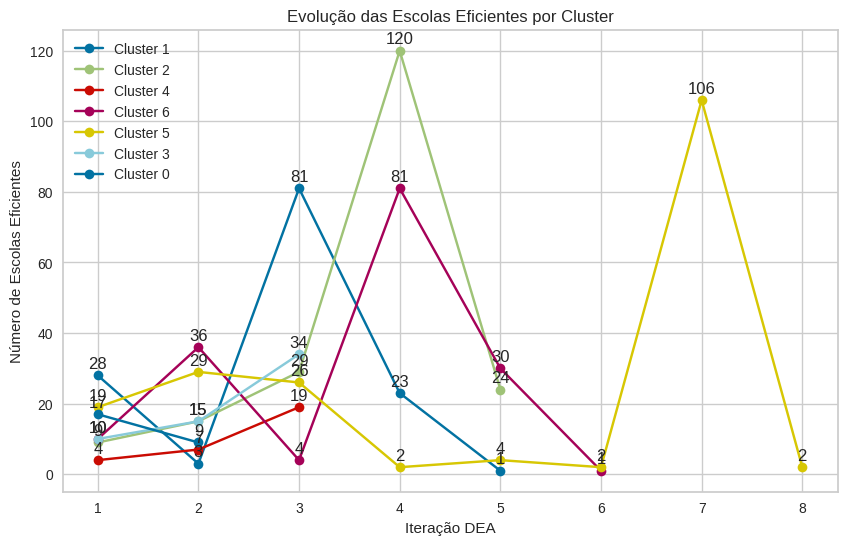


========== RESULTADO FINAL ==========
           ID_MUNICIPIO  ID_AREA  TX_RESP_Q005  TX_RESP_Q006  TX_RESP_Q008_A  \
ID_ESCOLA                                                                      
61324087      6317556.0      0.0         9.125      0.500000        0.500000   
61324089      6317598.0      0.0        20.500      4.000000        1.000000   
61324092      6317530.0      0.0        22.000      4.166667        0.666667   
61324099      6317623.0      0.0        14.250     11.125000        0.250000   
61324100      6317633.0      0.0        19.000      4.750000        0.500000   

           TX_RESP_Q008_B  TX_RESP_Q008_C  TX_RESP_Q008_D  TX_RESP_Q012  \
ID_ESCOLA                                                                 
61324087             0.50        0.000000             0.0      6.600000   
61324089             0.00        0.000000             0.0      8.300000   
61324092             0.00        0.333333             0.0      7.733333   
61324099             0.75

In [ ]:
# ===================================================
# 8️⃣ GERAR GRÁFICO DE DISTRIBUIÇÃO DE EFICIÊNCIA
# ===================================================
plt.figure(figsize=(10, 6))

for cluster_id, hist in eficiencia_hist_total.items():
    iteracoes = list(hist.keys())
    eficiencia = list(hist.values())

    plt.plot(iteracoes, eficiencia, marker='o', linestyle='-', label=f'Cluster {cluster_id}')

    # Adicionando rótulos nos pontos do gráfico
    for i, txt in enumerate(eficiencia):
        plt.annotate(txt, (iteracoes[i], eficiencia[i]), textcoords="offset points", xytext=(0,8), ha='center')

plt.xlabel("Iteração DEA")
plt.ylabel("Número de Escolas Eficientes")
plt.title("Evolução das Escolas Eficientes por Cluster")
plt.legend()
plt.grid(True)
plt.show()

df_escala = pd.DataFrame({"Escala_Eficiencia": pd.Series(resultados)})
df_resultado = df_merged.join(df_escala, how="left")

print("\n========== RESULTADO FINAL ==========")
print(df_resultado.head())

-----------------------------------

# Fim do trabalho